<h1> Origins of Fractality in Complex Networks

*Author: Katherine Hamilton*

*Updated: 28.08.24*

This notebook contains the functions used to generate figures and results in my MSc thesis [1]. The notebook is structured according to the structure of the thesis for ease of use, although not all sections use Python code.

**Module Imports**

In [2]:
import fractalnetworks as fn

# Network analysis modules
import networkx as nx
from igraph import Graph
import igraph

# Mathematics modules
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
import random

# Utility modules
import itertools
import os
import pandas as pd

<h1> Preliminaries

<h2> Graph Theory


<h2> Network Science

<h2> Classic Fractals

<h1> Chapter 1 <br> Fractality and Self-Similarity in Complex Networks

<h2>1.1 Fractal Dimensions of Networks

<h2>1.2 Importance of Fractal Networks

<h3> 1.2.1 Robustness

<h3> 1.2.2 Accelerated Diffusion

<h3> 1.2.3 High Modularity

<h2> 1.3 Self-Similar Networks

<h1> Chapter 2 <br> Origins of Fractality

<h2>2.1  Hub-Hub Repulsion

<h2>2.2  Fractal Skeletons

<h2>2.3  Properties of Fractal Networks

<h3> 2.3.1 Betweenness Centrality and Degree Correlation

Figure 2.3 supports the analytical arguments that show that there is less correlation between the betweenness centrality and degree of nodes in fractal networks than in non-fractal networks. 

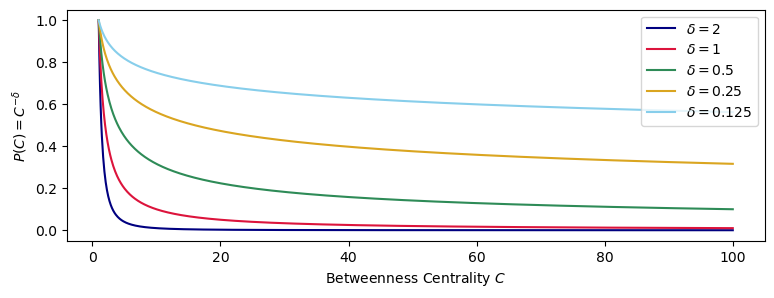

In [9]:
# Plots the proposed betweenness centrality distribution of fractal networks with different fractal dimensions 
plt.figure(figsize=(9,3))
x = np.linspace(1,100,1001)
y2 = [xi ** (-2) for xi in x]
plt.plot(x, y2, color = "navy", label = "$\delta = 2$")
y1 = [xi ** (-1) for xi in x]
plt.plot(x, y1, color = "crimson", label = "$\delta = 1$")
y05 = [xi ** (-0.5) for xi in x]
plt.plot(x, y05, color = "seagreen", label = "$\delta = 0.5$")
y025 = [xi ** (-0.25) for xi in x]
plt.plot(x, y025, color = "goldenrod", label = "$\delta = 0.25$")
y0125 = [xi ** (-0.125) for xi in x]
plt.plot(x, y0125, color = "skyblue", label = "$\delta = 0.125$")
plt.legend()
plt.ylabel("$P(C) = C^{-\delta}$")
plt.xlabel("Betweenness Centrality $C$")
plt.show()

<h3> 2.3.2 Edge Betweenness Centrality

<h3> 2.3.3 Distances

<h1> Chapter 3 <br> Methods

<h2> 3.1 Box-Covering Algorithms

<h3> 3.1.1 Maximum Excluded Mass Burning (MEMB) Algorithm

The traditional MEMB algorithm [2] is implemented in the function `fn.MEMB`.

<h3> 3.1.2 Runtime Improvements to the Maximum Excluded Mass Burning (MEMB) Algorithm

The accelerated version of MEMB [1] is implemented in the function `fn.accelerated_MEMB`.

In this section we also briefly discuss two other versions of MEMB which (a) store a list of local nodes for each node and update the excluded mass accordingly, or (b) store a matrix of distances and calculate MEMB accordingly. These are implemented in `fn.time_improved_MEMB` and `fn.distance_based_MEMB`, respectively. 

<h3> 3.1.3 Greedy Colouring Algorithm

The Greedy Colouring box-covering algorithm [2] is implemented in the function `fn.greedy_colouring`. To use the Smallest-Last node ordering method it must be passed the function `fn.smallest_last` as a parameter. 

<h2> 3.2 Determining Fractality

The $\ell_B$-$N_B$ distribution of a given network can be found using `fn.calculate_lB_NB_dist`. To check if the distribution is fractal use `fn.is_fractal`.

<h3> 3.2.1 Calculating the Fractal Dimension $d_B$

The function `fn.is_fractal` automatically calculates the fractal dimension $d_B$. However, you can also use `fn.find_fractal_dimension` independently to find $d_B$.

<h2> 3.3 Fractal Network Models

<h3> 3.3.1 Song-Havlin-Makse (SHM) Model

The following cell generates and displays the first four generations of a SHM network with $p=0$, as seen in Figure 3.5a [1] 

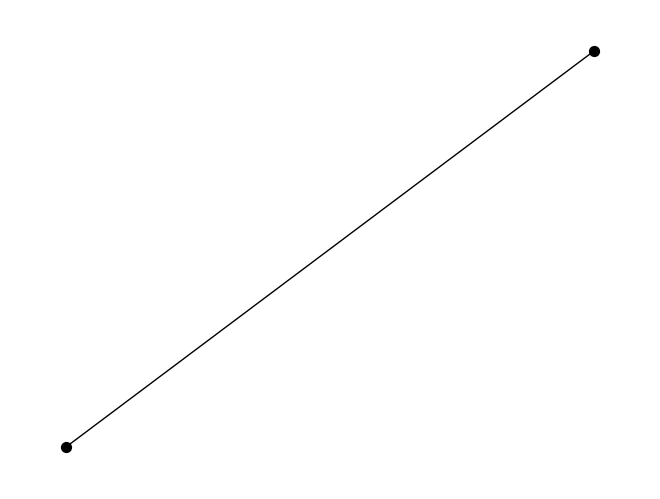

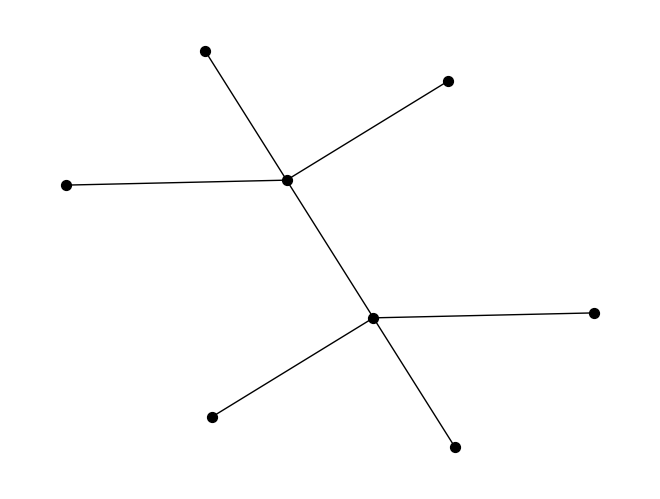

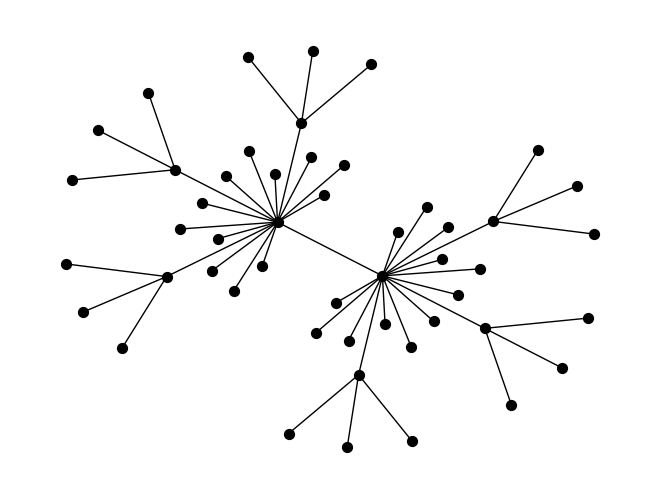

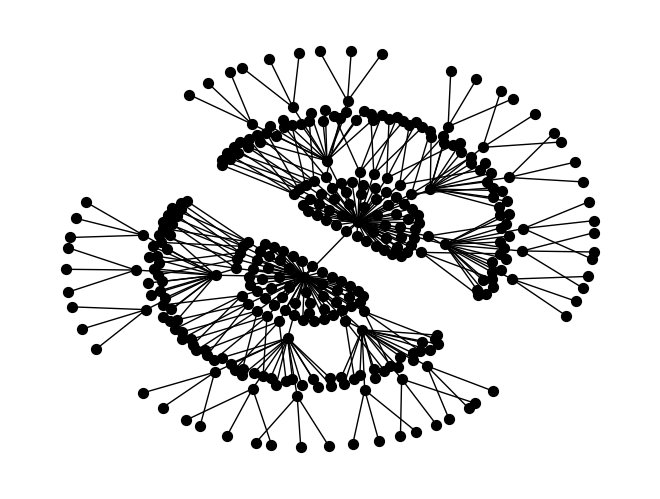

In [5]:
# Initialise parameters
m = 3
p = 0
N = 4

# In the first generation the network is a path of length 2. 
G = nx.path_graph(2)
nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
plt.show()

# Generate the next generation N-1 times. 
for i in range(N-1):
    G = fn.SHM_iteration(G, m, p)
    # Draw the network
    nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
    plt.show()

The following code displays the first four generations of a SHM network with $p=0.5$, as seen in Figure 3.5b [1] 

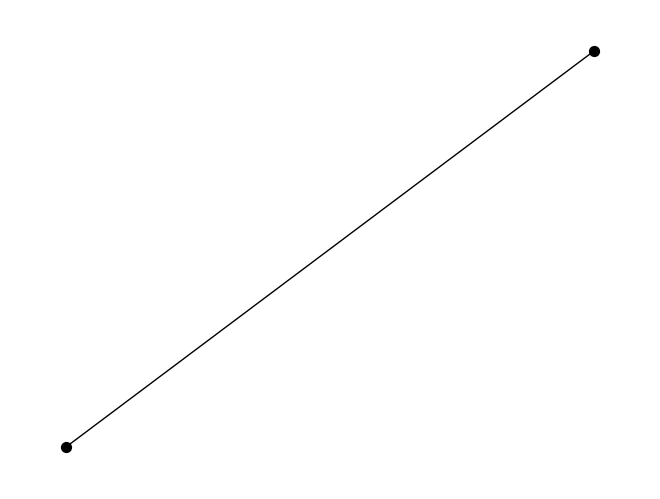

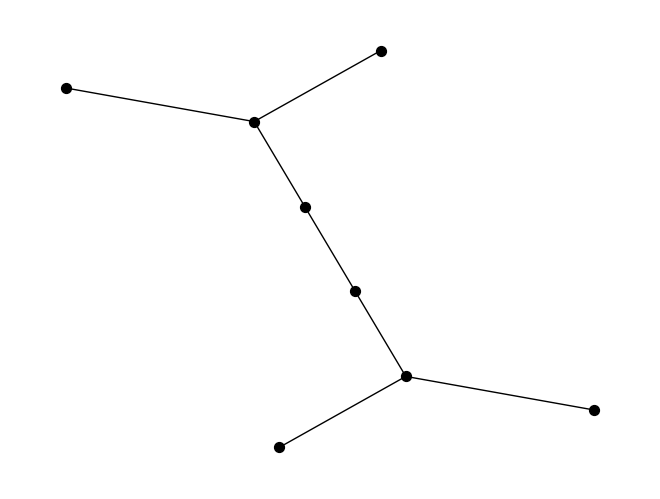

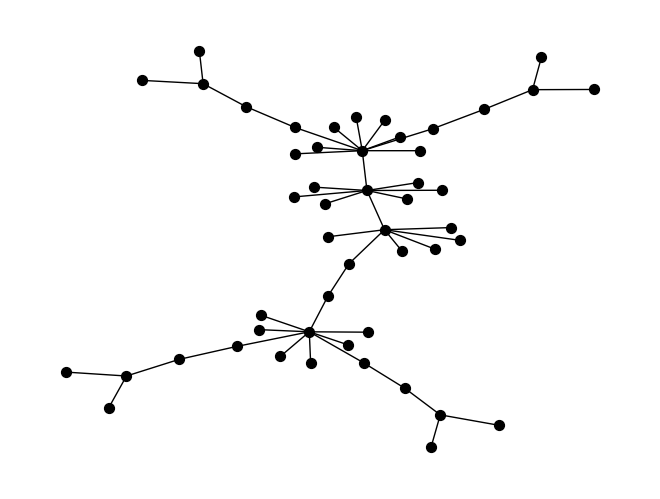

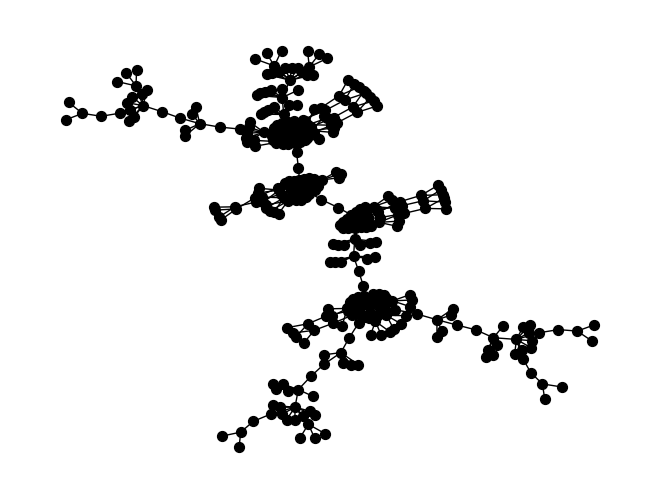

In [7]:
# Initialise parameters
m = 3
p = 0.5
N = 4

# In the first generation the network is a path of length 2. 
G = nx.path_graph(2)
nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
plt.show()

# Generate the next generation N-1 times. 
for i in range(N-1):
    G = fn.SHM_iteration(G, m, p)
    # Draw the network
    nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
    plt.show()

The following code displays the first four generations of a SHM network with $p=1$, as seen in Figure 3.5c [1] 

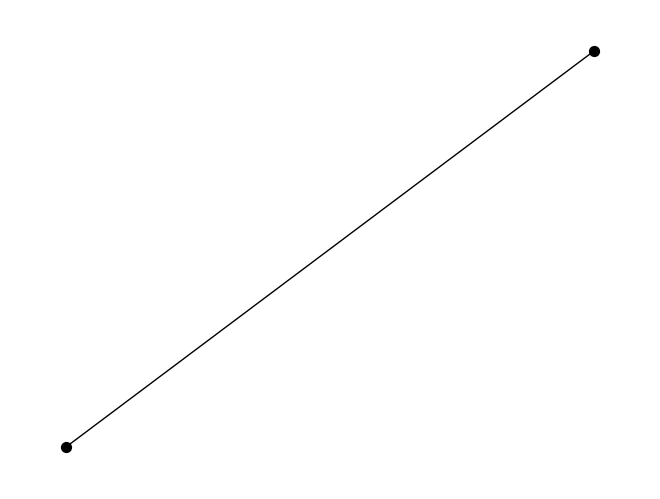

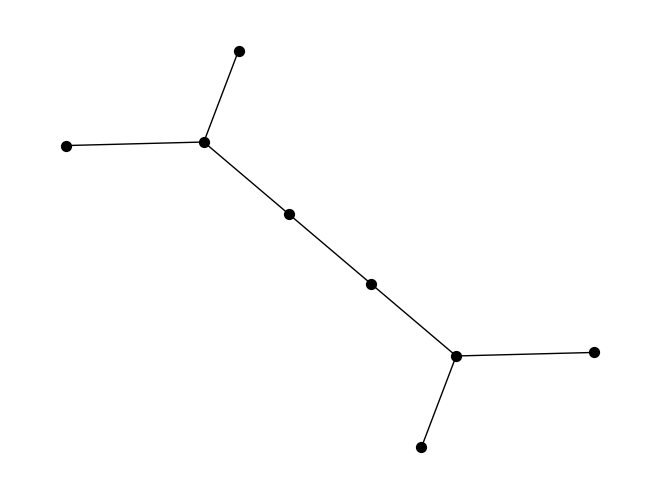

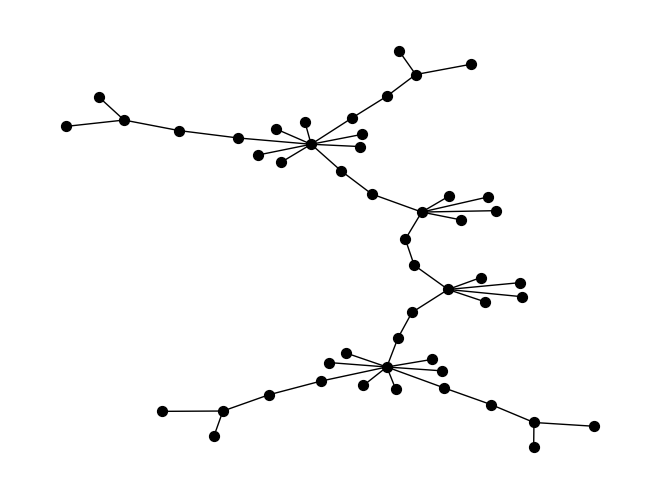

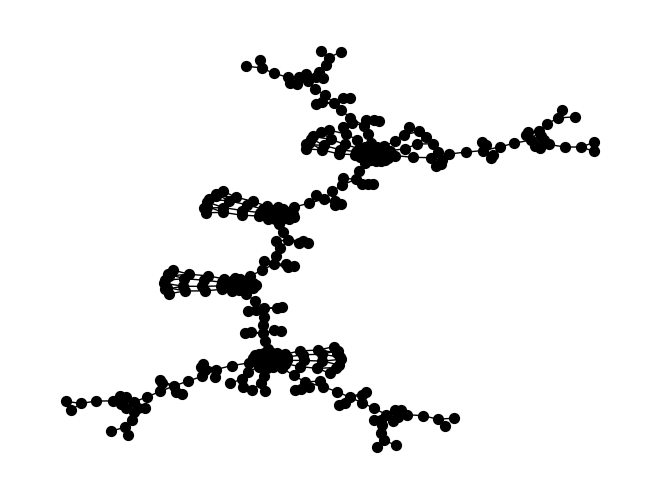

In [9]:
# Initialise parameters
m = 3
p = 1
N = 4

# In the first generation the network is a path of length 2. 
G = nx.path_graph(2)
nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
plt.show()

# Generate the next generation N-1 times. 
for i in range(N-1):
    G = fn.SHM_iteration(G, m, p)
    # Draw the network
    nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
    plt.show()

To show the scale-free property of SHM networks we use `fn.check_SHM_p0_lambda`. This function produces the graph in Figure 3.6 [1].

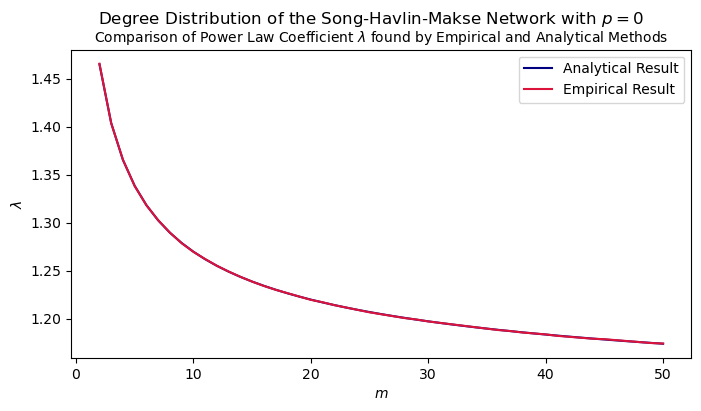

In [11]:
_, _ = fn.check_SHM_p0_lambda(50, 25, plot=True)

Figure 3.7 shows the ancestors of a newly added node in a SHM network with $p=0$.

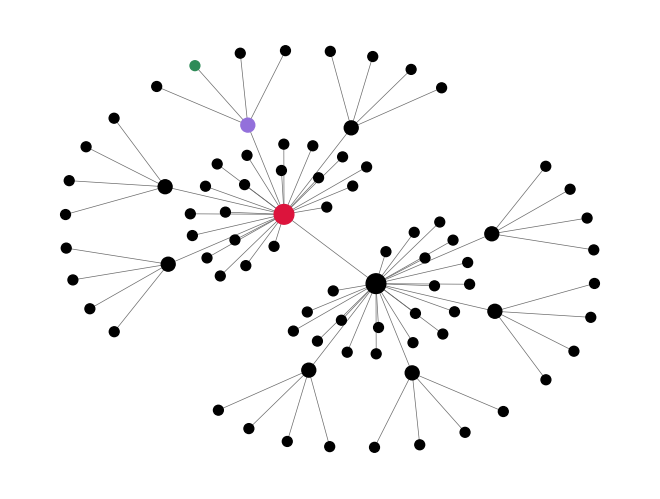

In [168]:
# Initialise parameters
m = 4
p = 0

# In the first generation the network is a path of length 2. 
G = nx.path_graph(2)
gen1_nodes = list(G.nodes())
plt.show()

G = fn.SHM_iteration(G, m, p)
gen2_nodes = list(G.nodes())

G = fn.SHM_iteration(G, m, p)
gen3_nodes = list(G.nodes())

sizes = [0]*len(G)
for node in G:
    if node in gen1_nodes:
        sizes[node] = 200
    elif node in gen2_nodes:
        sizes[node] = 100
    elif node in gen3_nodes:
        sizes[node] = 50
        
colours = ['black']*len(G)
colours[0] = 'crimson'
colours[3] = 'mediumpurple'
colours[32] = 'seagreen'

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, node_size=sizes, node_color=colours, edge_color='dimgray', width=0.5)
plt.savefig('../../Figures/SHM p0 Ancestors')

Figure 3.8 shows the ancestors of a newly added node in a SHM network with $p=1$.

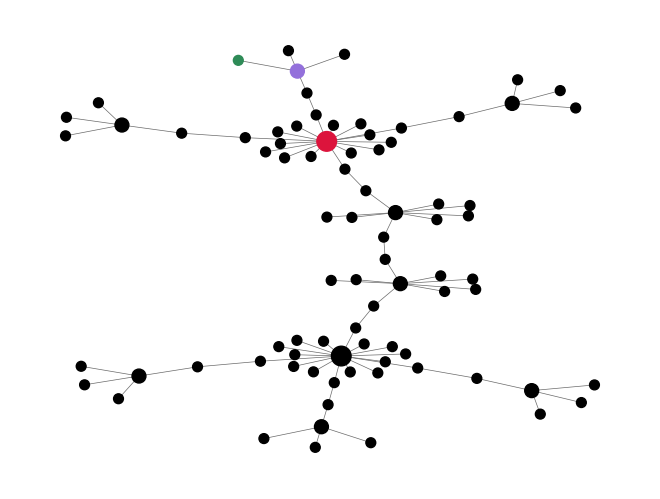

In [202]:
# Initialise parameters
m = 4
p = 1

# In the first generation the network is a path of length 2. 
G = nx.path_graph(2)
gen1_nodes = list(G.nodes())
plt.show()

G = fn.SHM_iteration(G, m, p)
gen2_nodes = list(G.nodes())

G = fn.SHM_iteration(G, m, p)
gen3_nodes = list(G.nodes())

sizes = [0]*len(G)
for node in G:
    if node in gen1_nodes:
        sizes[node] = 200
    elif node in gen2_nodes:
        sizes[node] = 100
    elif node in gen3_nodes:
        sizes[node] = 50
        
colours = ['black']*len(G)
colours[0] = 'crimson'
colours[4] = 'mediumpurple'
colours[32] = 'seagreen'

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, node_size=sizes, node_color=colours, edge_color='dimgray', width=0.5)
plt.savefig('../../Figures/SHM p1 Ancestors')

<h3> 3.3.2 Hub Attraction Dynamical Growth (HADG) Model

The following cell produces examples of HADG networks with nodes coloured and sized according to the generation in which they originated. Figure 3.9 [1] is produced with this code. 

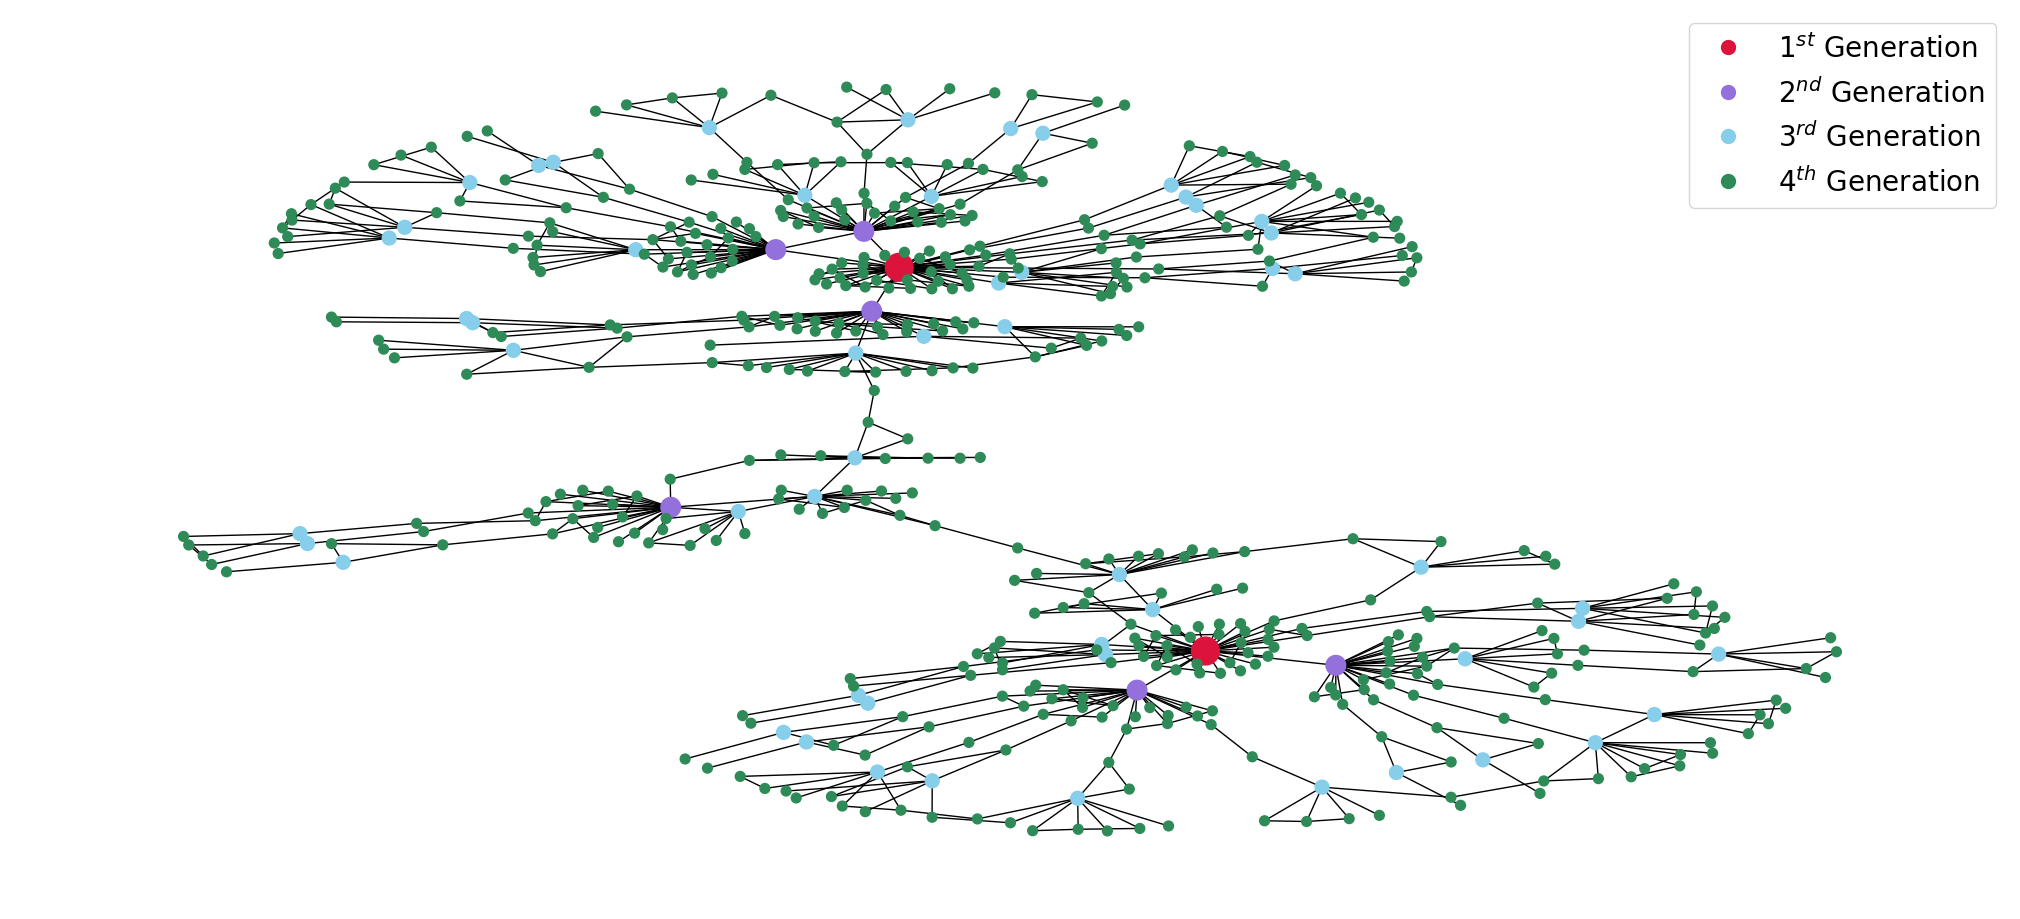

In [14]:
# Initialise parameters
N = 4
m = 3
a = 0.25
b = 0.75
T = 0.5

# Initialise a path network
G = nx.path_graph(2)
gen1_nodes = list(G.nodes()) # At each stage save a list of nodes in the network.
    
# Apply the generative process N times. 
G = fn.HADG_iteration(G, m, a, b, T)
gen2_nodes = list(G.nodes())

G = fn.HADG_iteration(G, m, a, b, T)
gen3_nodes = list(G.nodes())

G = fn.HADG_iteration(G, m, a, b, T)
gen4_nodes = list(G.nodes())

# Initialise empty dictionaries to store the colour and size of nodes. 
colourmap = {}
sizemap = {}

for node in G:
    
    # Nodes from the first generation are large and red.
    if node in gen1_nodes:
        colourmap[node] = "crimson"
        sizemap[node] = 400
    
    # Nodes from the second generation are medium size and purple.
    elif node in gen2_nodes:
        colourmap[node] = "mediumpurple"
        sizemap[node] = 200
        
    # Nodes from the third generation are small and blue.
    elif node in gen3_nodes:
        colourmap[node] = "skyblue"
        sizemap[node] = 100
        
    # Nodes from the fourth generation are tiny and green.
    elif node in gen4_nodes:
        colourmap[node] = "seagreen"
        sizemap[node] = 50
        
# Make lists of sizes and colours for nodes
# This is the format networkx takes these arguments in.
colourlist = [colourmap[i] for i in G.nodes()]
sizelist = [sizemap[i] for i in G.nodes()]

# Calculate the position of ndoes
pos = nx.kamada_kawai_layout(G, scale=100)

# Draw network
plt.figure(figsize=(20,9))
nx.draw(G, pos=pos, node_size=sizelist, node_color=colourlist)

# Add legend
crimson_patch = mlines.Line2D([], [], color='crimson', fillstyle='full', marker='o', linestyle='None',
                          markersize=10, label="$1^{st}$ Generation")
purple_patch = mlines.Line2D([], [], color='mediumpurple', fillstyle='full', marker='o', linestyle='None',
                          markersize=10, label="$2^{nd}$ Generation")
blue_patch = mlines.Line2D([], [], color='skyblue', fillstyle='full', marker='o', linestyle='None',
                          markersize=10, label="$3^{rd}$ Generation")
green_patch = mlines.Line2D([], [], color='seagreen', fillstyle='full', marker='o', linestyle='None',
                          markersize=10, label="$4^{th}$ Generation")
plt.legend(handles=[crimson_patch, purple_patch, blue_patch, green_patch], fontsize=20)

# Show figure
plt.show()

<h3> 3.3.3 $(u,v)$-Flower Model

The following cell draws the first 4 generations of a non-fractal $(1,4)$-flower, as seen in Figure 3.10a [1].

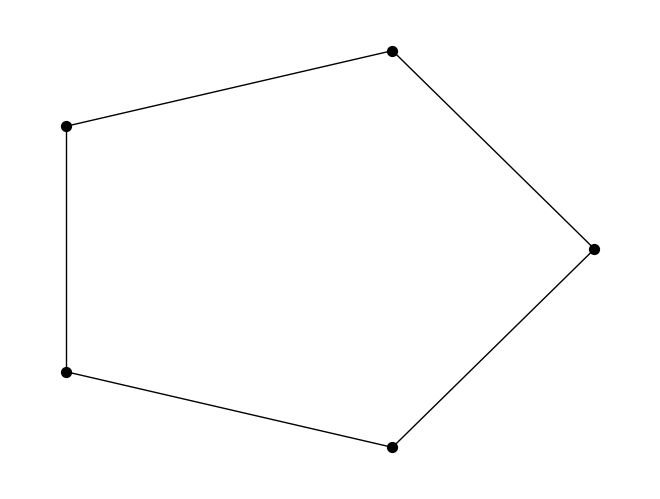

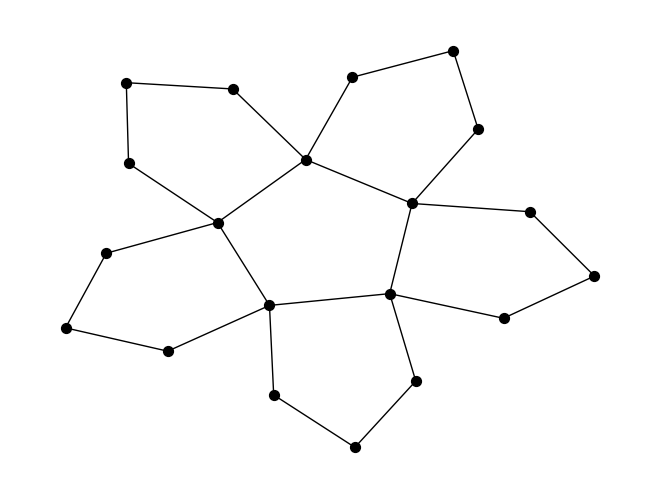

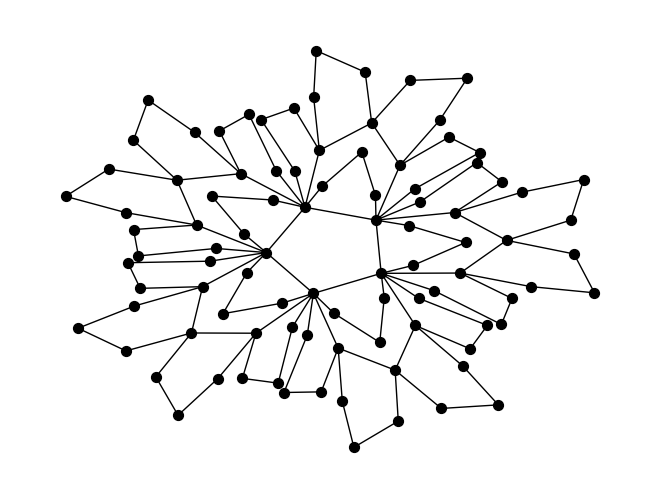

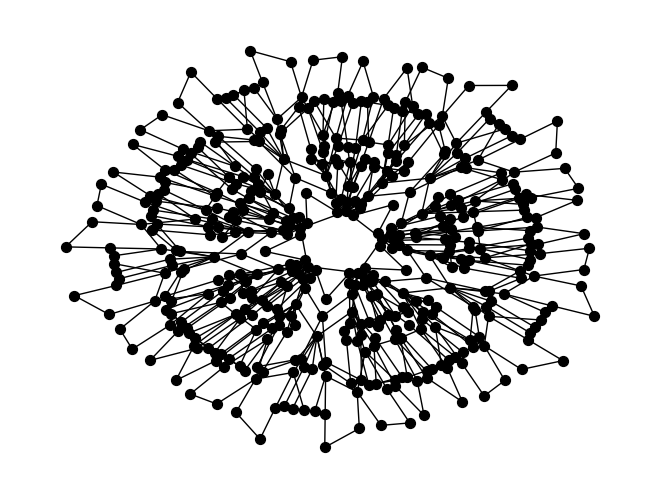

In [17]:
# Initialise parameters
u = 1
v = 4
N = 4

# Generate a (u,v) flower of each generation and display it
for n in range(1, N+1):
    G = fn.generate_uv_flower(u, v, n)
    nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
    plt.show()

The following cell draws the first 4 generations of a fractal $(2,3)$-flower, as seen in Figure 3.10b [1].

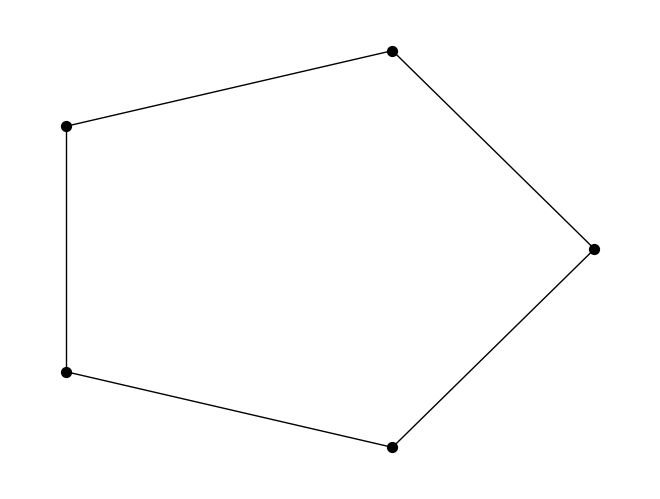

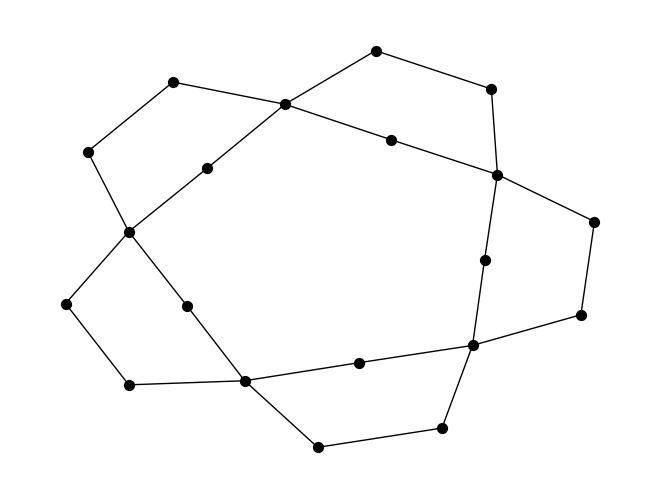

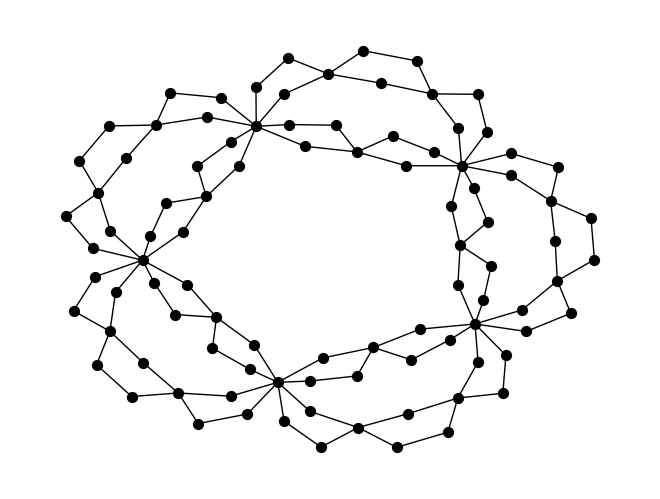

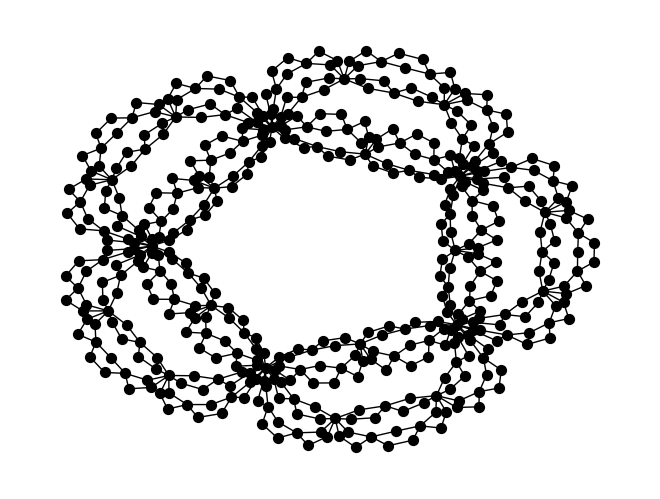

In [19]:
# Initialise parameters
u = 2
v = 3
N = 4

# Generate a (u,v) flower of each generation and display it
for n in range(1, N+1):
    G = fn.generate_uv_flower(u, v, n)
    nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
    plt.show()

<h3> 3.3.4 Nested Barabási-Albert Model

The following cell produces an example of a Nested Barabási-Albert network with $m = 4$, $N=180$ and $k_{\max} = 20 $. Networks are generated until one has 7 Barabási-Albert subnetworks, which are then coloured according to the node they originated from (Figure 3.12).

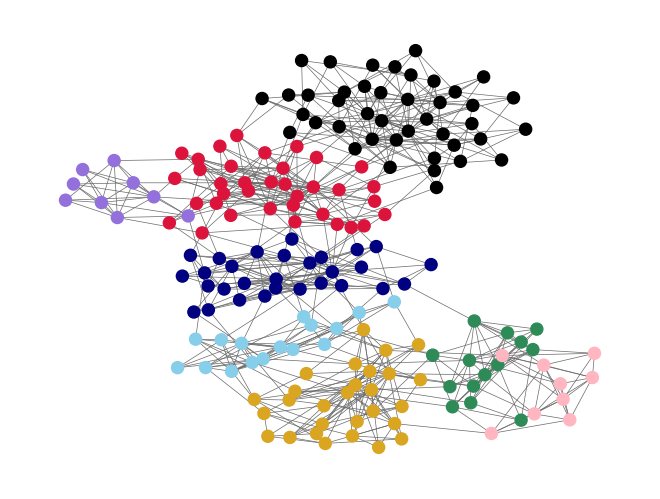

In [22]:
m = 4
N = 180
kmax = 20

num_gens = 100000

while num_gens != 7:
    G = fn.generate_nested_BA_model_subnetwork(m, kmax)

    # Find the degree distribution of the network
    degrees = G.degree()
    # Create a list of nodes in the network where each node is repeated as many times as it has edges.
    # This is used to select a node with probability proportional to its degree.
    repeated_nodes = [v for v, d in G.degree() for _ in range(d)]

    original_nodes = list(G.nodes())
    new_generations = []

    # Continue to generate the network while there are less than N nodes.
    count = 0
    while len(G) < N:
        # Choose a node at random from the list of repeated nodes, with probability proportionate to its degree.
        node = random.choice(repeated_nodes)

        # Generate a BA network with maximum degree k, where k is the degree of the chosen node.
        H = fn.generate_nested_BA_model_subnetwork(m, G.degree(node))

        # Relabel the nodes in the new subnetwork, so that they can be added to the existing graph.
        # Nodes are labeled from 0 to N-1, so the next nodes should be numbered N, N+1, ...
        new_nodes = list(H.nodes())
        H = nx.relabel_nodes(H, dict(zip(new_nodes, [i + len(G)+count for i in new_nodes])))
        new_nodes = list(H.nodes())  # Take a list of the newly added nodes.
        new_generations.append(new_nodes)

        # Each of the edges of the chosen node need to be removed and reattached to new nodes chosen at random.
        to_be_reconnected = [i for i in G.neighbors(node)]  # Store each edges' source node
        G.remove_node(node)  # Remove the chosen node
        G = nx.union(G, H)  # Add the new subnetwork
        # For each source node, chose a random node from the newly added subnetwork and add an edge between them.
        for source in to_be_reconnected:
            target = random.choice(new_nodes)
            G.add_edge(source, target)

        # Update the list of repeated nodes.
        repeated_nodes = [v for v, d in G.degree() for _ in range(d)]
        count += 1
        
    num_gens = len(new_generations)
    
colours = [0]*len(G)
nodes = list(G.nodes())
for i in range(len(G)):
    node = nodes[i]
    if node in original_nodes:
        colours[i] = 'black'
    elif node in new_generations[0]:
        colours[i] = 'crimson'
    elif node in new_generations[1]:
        colours[i] = 'navy'
    elif node in new_generations[2]:
        colours[i] = 'mediumpurple'
    elif node in new_generations[3]:
        colours[i] = 'skyblue'
    elif node in new_generations[4]:
        colours[i] = 'goldenrod'
    elif node in new_generations[5]:
        colours[i] = 'seagreen'
    else:
        colours[i] = 'lightpink'
        
nx.draw_kamada_kawai(G, node_size=75, node_color = colours, edge_color='dimgray', width=0.5)

<h2> 3.4 Python Toolkit

The toolkit is imported using the statement:
`import fractalnetworks as fn`

Figure 3.13a shows an example of the $\ell_B$-$N_B$ distribution of a fractal network.

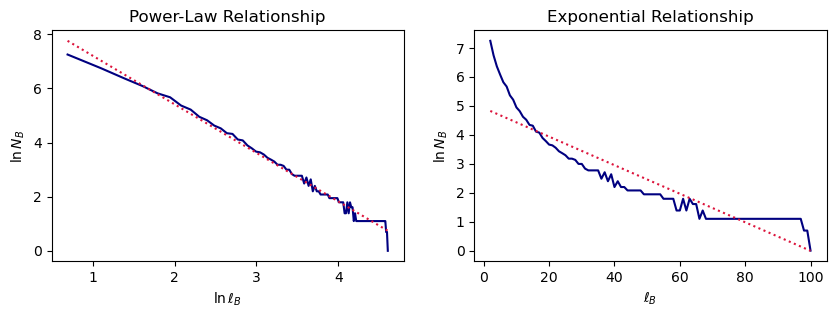

In [251]:
fractality = fn.is_fractal('result-files/real-world/road/road_minnesota_results', plot=True)

Figure 3.13b shows an example of the $\ell_B$-$N_B$ distribution of a non-fractal network.

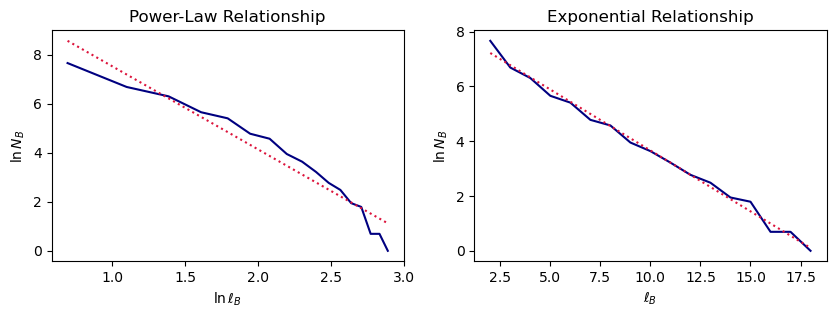

In [249]:
fractality = fn.is_fractal('result-files/real-world/collaboration/ca_GrQc_results', plot=True)

<h1> Chapter 4 <br>
     Empirical Analysis

<h2> 4.1 Data

All networks used in this thesis are available as .gml files on GitHub at <a> https://github.com/katherinehamilton/fractalnetworks/tree/main/network-files </a>.

The $\ell_B$ - $N_B$ distribution of each network, found using the accelerated version of the Maximum Excluded Mass Burning algorithm [1][2] and the Greedy Colouring algorithm [1][2], are stored as .csv files at <a> https://github.com/katherinehamilton/fractalnetworks/tree/main/result-files </a>.

<h3> 4.1.1 Mathematical Models

<h4> Song-Havlin-Makse (SHM) Model

**Network Data**

The following cell reads in all fractal SHM networks. 

In [103]:
# Fractal SHM Networks with parameters m=1, N=8
fractal_SHM_1_8_08_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.8-generation8-example1.gml")
fractal_SHM_1_8_08_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.8-generation8-example2.gml")
fractal_SHM_1_8_08_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.8-generation8-example3.gml")
fractal_SHM_1_8_08_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.8-generation8-example4.gml")
fractal_SHM_1_8_08_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.8-generation8-example5.gml")

fractal_SHM_1_8_09_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.9-generation8-example1.gml")
fractal_SHM_1_8_09_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.9-generation8-example2.gml")
fractal_SHM_1_8_09_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.9-generation8-example3.gml")
fractal_SHM_1_8_09_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.9-generation8-example4.gml")
fractal_SHM_1_8_09_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.9-generation8-example5.gml")

fractal_SHM_1_8_10 = Graph.Load("network-files/models/SHM-model/SHM-model-1-1.0-generation8-example1.gml")


# Fractal SHM Networks with parameters m=2, N=6
fractal_SHM_2_6_08_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.8-generation6-example1.gml")
fractal_SHM_2_6_08_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.8-generation6-example2.gml")
fractal_SHM_2_6_08_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.8-generation6-example3.gml")
fractal_SHM_2_6_08_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.8-generation6-example4.gml")
fractal_SHM_2_6_08_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.8-generation6-example5.gml")

fractal_SHM_2_6_09_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.9-generation6-example1.gml")
fractal_SHM_2_6_09_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.9-generation6-example2.gml")
fractal_SHM_2_6_09_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.9-generation6-example3.gml")
fractal_SHM_2_6_09_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.9-generation6-example4.gml")
fractal_SHM_2_6_09_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.9-generation6-example5.gml")

fractal_SHM_2_6_10 = Graph.Load("network-files/models/SHM-model/SHM-model-2-1.0-generation6-example1.gml")


# Fractal SHM Networks with parameters m=3, N=5
fractal_SHM_3_5_08_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.8-generation5-example1.gml")
fractal_SHM_3_5_08_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.8-generation5-example2.gml")
fractal_SHM_3_5_08_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.8-generation5-example3.gml")
fractal_SHM_3_5_08_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.8-generation5-example4.gml")
fractal_SHM_3_5_08_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.8-generation5-example5.gml")

fractal_SHM_3_5_09_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.9-generation5-example1.gml")
fractal_SHM_3_5_09_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.9-generation5-example2.gml")
fractal_SHM_3_5_09_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.9-generation5-example3.gml")
fractal_SHM_3_5_09_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.9-generation5-example4.gml")
fractal_SHM_3_5_09_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.9-generation5-example5.gml")

fractal_SHM_3_5_10 = Graph.Load("network-files/models/SHM-model/SHM-model-3-1.0-generation5-example1.gml")


# Fractal SHM Networks with parameters m=6, N=4
fractal_SHM_6_4_08_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.8-generation4-example1.gml")
fractal_SHM_6_4_08_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.8-generation4-example2.gml")
fractal_SHM_6_4_08_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.8-generation4-example3.gml")
fractal_SHM_6_4_08_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.8-generation4-example4.gml")
fractal_SHM_6_4_08_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.8-generation4-example5.gml")

fractal_SHM_6_4_09_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.9-generation4-example1.gml")
fractal_SHM_6_4_09_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.9-generation4-example2.gml")
fractal_SHM_6_4_09_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.9-generation4-example3.gml")
fractal_SHM_6_4_09_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.9-generation4-example4.gml")
fractal_SHM_6_4_09_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.9-generation4-example5.gml")

fractal_SHM_6_4_10 = Graph.Load("network-files/models/SHM-model/SHM-model-6-1.0-generation4-example1.gml")


# Fractal SHM Networks with parameters m=7, N=4
fractal_SHM_7_4_08_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.8-generation4-example1.gml")
fractal_SHM_7_4_08_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.8-generation4-example2.gml")
fractal_SHM_7_4_08_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.8-generation4-example3.gml")
fractal_SHM_7_4_08_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.8-generation4-example4.gml")
fractal_SHM_7_4_08_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.8-generation4-example5.gml")

fractal_SHM_7_4_09_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.9-generation4-example1.gml")
fractal_SHM_7_4_09_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.9-generation4-example2.gml")
fractal_SHM_7_4_09_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.9-generation4-example3.gml")
fractal_SHM_7_4_09_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.9-generation4-example4.gml")
fractal_SHM_7_4_09_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.9-generation4-example5.gml")

fractal_SHM_7_4_10 = Graph.Load("network-files/models/SHM-model/SHM-model-7-1.0-generation4-example1.gml")

                                
# All graphs

fractal_SHM_1_8_graphs = [fractal_SHM_1_8_08_ex1, 
                      fractal_SHM_1_8_08_ex2,
                      fractal_SHM_1_8_08_ex3,
                      fractal_SHM_1_8_08_ex4,
                      fractal_SHM_1_8_08_ex5,
                      fractal_SHM_1_8_09_ex1,
                      fractal_SHM_1_8_09_ex2,
                      fractal_SHM_1_8_09_ex3,
                      fractal_SHM_1_8_09_ex4,
                      fractal_SHM_1_8_09_ex5,
                      fractal_SHM_1_8_10]
                                
fractal_SHM_2_6_graphs = [fractal_SHM_2_6_08_ex1, 
                      fractal_SHM_2_6_08_ex2, 
                      fractal_SHM_2_6_08_ex3, 
                      fractal_SHM_2_6_08_ex4,
                      fractal_SHM_2_6_08_ex5,
                      fractal_SHM_2_6_09_ex1,
                      fractal_SHM_2_6_09_ex2,
                      fractal_SHM_2_6_09_ex3,
                      fractal_SHM_2_6_09_ex4,
                      fractal_SHM_2_6_09_ex5,
                      fractal_SHM_2_6_10]


fractal_SHM_3_5_graphs = [fractal_SHM_3_5_08_ex1, 
                      fractal_SHM_3_5_08_ex2, 
                      fractal_SHM_3_5_08_ex3, 
                      fractal_SHM_3_5_08_ex4,
                      fractal_SHM_3_5_08_ex5,
                      fractal_SHM_3_5_09_ex1,
                      fractal_SHM_3_5_09_ex2,
                      fractal_SHM_3_5_09_ex3,
                      fractal_SHM_3_5_09_ex4,
                      fractal_SHM_3_5_09_ex5,
                      fractal_SHM_3_5_10]

fractal_SHM_6_4_graphs = [fractal_SHM_6_4_08_ex1, 
                      fractal_SHM_6_4_08_ex2,
                      fractal_SHM_6_4_08_ex3,
                      fractal_SHM_6_4_08_ex4,
                      fractal_SHM_6_4_08_ex5,
                      fractal_SHM_6_4_09_ex1,
                      fractal_SHM_6_4_09_ex2,
                      fractal_SHM_6_4_09_ex3,
                      fractal_SHM_6_4_09_ex4,
                      fractal_SHM_6_4_09_ex5,
                      fractal_SHM_6_4_10]

fractal_SHM_7_4_graphs = [fractal_SHM_7_4_08_ex1, 
                      fractal_SHM_7_4_08_ex2, 
                      fractal_SHM_7_4_08_ex3, 
                      fractal_SHM_7_4_08_ex4,
                      fractal_SHM_7_4_08_ex5,
                      fractal_SHM_7_4_09_ex1,
                      fractal_SHM_7_4_09_ex2,
                      fractal_SHM_7_4_09_ex3,
                      fractal_SHM_7_4_09_ex4,
                      fractal_SHM_7_4_09_ex5,
                      fractal_SHM_7_4_10]


fractal_SHM_graphs = []
fractal_SHM_graphs.extend(fractal_SHM_1_8_graphs)
fractal_SHM_graphs.extend(fractal_SHM_2_6_graphs)
fractal_SHM_graphs.extend(fractal_SHM_3_5_graphs)
fractal_SHM_graphs.extend(fractal_SHM_6_4_graphs)                                
fractal_SHM_graphs.extend(fractal_SHM_7_4_graphs)

The following cell reads in all non-fractal SHM networks. 

In [105]:
# Non-Fractal SHM Networks with parameters m=1, N=8
non_fractal_SHM_1_8_0001_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.001-generation8-example1.gml")
non_fractal_SHM_1_8_0001_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.001-generation8-example2.gml")
non_fractal_SHM_1_8_0001_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.001-generation8-example3.gml")
non_fractal_SHM_1_8_0001_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.001-generation8-example4.gml")
non_fractal_SHM_1_8_0001_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.001-generation8-example5.gml")

non_fractal_SHM_1_8_0002_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.002-generation8-example1.gml")
non_fractal_SHM_1_8_0002_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.002-generation8-example2.gml")
non_fractal_SHM_1_8_0002_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.002-generation8-example3.gml")
non_fractal_SHM_1_8_0002_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.002-generation8-example4.gml")
non_fractal_SHM_1_8_0002_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.002-generation8-example5.gml")

non_fractal_SHM_1_8_00 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.0-generation8-example1.gml")


# Non fractal SHM Networks with parameters m=2, N=6 
non_fractal_SHM_2_6_0002_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.002-generation6-example1.gml")
non_fractal_SHM_2_6_0002_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.002-generation6-example2.gml")
non_fractal_SHM_2_6_0002_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.002-generation6-example3.gml")
non_fractal_SHM_2_6_0002_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.002-generation6-example4.gml")
non_fractal_SHM_2_6_0002_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.002-generation6-example5.gml")

non_fractal_SHM_2_6_0001_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.001-generation6-example1.gml")
non_fractal_SHM_2_6_0001_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.001-generation6-example2.gml")
non_fractal_SHM_2_6_0001_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.001-generation6-example3.gml")
non_fractal_SHM_2_6_0001_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.001-generation6-example4.gml")
non_fractal_SHM_2_6_0001_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.001-generation6-example5.gml")

non_fractal_SHM_2_6_00 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.0-generation6-example1.gml")


# Fractal SHM Networks with parameters m=3, N=5
non_fractal_SHM_3_5_0002_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.002-generation5-example1.gml")
non_fractal_SHM_3_5_0002_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.002-generation5-example2.gml")
non_fractal_SHM_3_5_0002_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.002-generation5-example3.gml")
non_fractal_SHM_3_5_0002_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.002-generation5-example4.gml")
non_fractal_SHM_3_5_0002_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.002-generation5-example5.gml")

non_fractal_SHM_3_5_0001_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.001-generation5-example1.gml")
non_fractal_SHM_3_5_0001_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.001-generation5-example2.gml")
non_fractal_SHM_3_5_0001_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.001-generation5-example3.gml")
non_fractal_SHM_3_5_0001_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.001-generation5-example4.gml")
non_fractal_SHM_3_5_0001_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.001-generation5-example5.gml")

non_fractal_SHM_3_5_00 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.0-generation5-example1.gml")


# Non-Fractal SHM Networks with parameters m=6, N=4 
non_fractal_SHM_6_4_0001_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.001-generation4-example1.gml")
non_fractal_SHM_6_4_0001_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.001-generation4-example2.gml")
non_fractal_SHM_6_4_0001_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.001-generation4-example3.gml")
non_fractal_SHM_6_4_0001_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.001-generation4-example4.gml")
non_fractal_SHM_6_4_0001_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.001-generation4-example5.gml")

non_fractal_SHM_6_4_0002_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.002-generation4-example1.gml")
non_fractal_SHM_6_4_0002_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.002-generation4-example2.gml")
non_fractal_SHM_6_4_0002_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.002-generation4-example3.gml")
non_fractal_SHM_6_4_0002_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.002-generation4-example4.gml")
non_fractal_SHM_6_4_0002_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.002-generation4-example5.gml")

non_fractal_SHM_6_4_00 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.0-generation4-example1.gml")


# Fractal SHM Networks with parameters m=7, N=4
non_fractal_SHM_7_4_0001_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.001-generation4-example1.gml")
non_fractal_SHM_7_4_0001_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.001-generation4-example2.gml")
non_fractal_SHM_7_4_0001_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.001-generation4-example3.gml")
non_fractal_SHM_7_4_0001_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.001-generation4-example4.gml")
non_fractal_SHM_7_4_0001_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.001-generation4-example5.gml")

non_fractal_SHM_7_4_0002_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.002-generation4-example1.gml")
non_fractal_SHM_7_4_0002_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.002-generation4-example2.gml")
non_fractal_SHM_7_4_0002_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.002-generation4-example3.gml")
non_fractal_SHM_7_4_0002_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.002-generation4-example4.gml")
non_fractal_SHM_7_4_0002_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.002-generation4-example5.gml")

non_fractal_SHM_7_4_00 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.0-generation4-example1.gml")


# All graphs

non_fractal_SHM_1_8_graphs = [non_fractal_SHM_1_8_0002_ex1, 
                      non_fractal_SHM_1_8_0002_ex2,
                      non_fractal_SHM_1_8_0002_ex3,
                      non_fractal_SHM_1_8_0002_ex4,
                      non_fractal_SHM_1_8_0002_ex5,
                      non_fractal_SHM_1_8_0001_ex1,
                      non_fractal_SHM_1_8_0001_ex2,
                      non_fractal_SHM_1_8_0001_ex3,
                      non_fractal_SHM_1_8_0001_ex4,
                      non_fractal_SHM_1_8_0001_ex5,
                      non_fractal_SHM_1_8_00]

non_fractal_SHM_2_6_graphs = [non_fractal_SHM_2_6_0002_ex1, 
                      non_fractal_SHM_2_6_0002_ex2, 
                      non_fractal_SHM_2_6_0002_ex3, 
                      non_fractal_SHM_2_6_0002_ex4,
                      non_fractal_SHM_2_6_0002_ex5,
                      non_fractal_SHM_2_6_0001_ex1,
                      non_fractal_SHM_2_6_0001_ex2,
                      non_fractal_SHM_2_6_0001_ex3,
                      non_fractal_SHM_2_6_0001_ex4,
                      non_fractal_SHM_2_6_0001_ex5,
                      non_fractal_SHM_2_6_00]

non_fractal_SHM_3_5_graphs = [non_fractal_SHM_3_5_0002_ex1, 
                      non_fractal_SHM_3_5_0002_ex2, 
                      non_fractal_SHM_3_5_0002_ex3, 
                      non_fractal_SHM_3_5_0002_ex4,
                      non_fractal_SHM_3_5_0002_ex5,
                      non_fractal_SHM_3_5_0001_ex1,
                      non_fractal_SHM_3_5_0001_ex2,
                      non_fractal_SHM_3_5_0001_ex3,
                      non_fractal_SHM_3_5_0001_ex4,
                      non_fractal_SHM_3_5_0001_ex5,
                      non_fractal_SHM_3_5_00]

non_fractal_SHM_6_4_graphs = [non_fractal_SHM_6_4_0002_ex1, 
                      non_fractal_SHM_6_4_0002_ex2,
                      non_fractal_SHM_6_4_0002_ex3,
                      non_fractal_SHM_6_4_0002_ex4,
                      non_fractal_SHM_6_4_0002_ex5,
                      non_fractal_SHM_6_4_0001_ex1,
                      non_fractal_SHM_6_4_0001_ex2,
                      non_fractal_SHM_6_4_0001_ex3,
                      non_fractal_SHM_6_4_0001_ex4,
                      non_fractal_SHM_6_4_0001_ex5,
                      non_fractal_SHM_6_4_00]

non_fractal_SHM_7_4_graphs = [non_fractal_SHM_7_4_0002_ex1, 
                      non_fractal_SHM_7_4_0002_ex2, 
                      non_fractal_SHM_7_4_0002_ex3, 
                      non_fractal_SHM_7_4_0002_ex4,
                      non_fractal_SHM_7_4_0002_ex5,
                      non_fractal_SHM_7_4_0001_ex1,
                      non_fractal_SHM_7_4_0001_ex2,
                      non_fractal_SHM_7_4_0001_ex3,
                      non_fractal_SHM_7_4_0001_ex4,
                      non_fractal_SHM_7_4_0001_ex5,
                      non_fractal_SHM_7_4_00]

non_fractal_SHM_graphs = []
non_fractal_SHM_graphs.extend(non_fractal_SHM_1_8_graphs)
non_fractal_SHM_graphs.extend(non_fractal_SHM_2_6_graphs)
non_fractal_SHM_graphs.extend(non_fractal_SHM_3_5_graphs)
non_fractal_SHM_graphs.extend(non_fractal_SHM_6_4_graphs)
non_fractal_SHM_graphs.extend(non_fractal_SHM_7_4_graphs)

**Checking the Fractality of SHM Networks**

Each of the result .csv files are read and the fractality of each network is determined. For fractal networks the fractal dimension $d_B$ is also calculated.

In [11]:
folder = 'result-files/models/SHM-model/'
for file in os.listdir(folder):
    if file != 'skeletons':
        print("\n" + file)
        fn.is_fractal(folder+file, verbose=True, p_list=[0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


fractal_SHM_1_8_08_ex1_results
This network is fractal with box dimension 1.0396.
Power law score: 0.9476.
Exponential score: 0.5975.

fractal_SHM_1_8_08_ex2_results
This network is fractal with box dimension 1.1426.
Power law score: 0.9395.
Exponential score: 0.5814.

fractal_SHM_1_8_08_ex3_results
This network is fractal with box dimension 1.1025.
Power law score: 0.9503.
Exponential score: 0.6086.

fractal_SHM_1_8_08_ex4_results
This network is fractal with box dimension 1.1104.
Power law score: 0.9756.
Exponential score: 0.6899.

fractal_SHM_1_8_08_ex5_results
This network is fractal with box dimension 1.0091.
Power law score: 0.9544.
Exponential score: 0.6299.

fractal_SHM_1_8_09_ex1_results
This network is fractal with box dimension 1.0366.
Power law score: 0.9599.
Exponential score: 0.6253.

fractal_SHM_1_8_09_ex2_results
This network is fractal with box dimension 1.0952.
Power law score: 0.9448.
Exponential score: 0.5951.

fractal_SHM_1_8_09_ex3_results
This network is fractal

<h4> Hub Attraction Dynamical Growth (HADG) Model

**Network Data**

The following cell reads in all HADG networks with $m=1$, $n=7$.

In [3]:
# Non-fractal
non_fractal_HADG_1_7_00_0001_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.001-0.5-generation7-example1.gml")
non_fractal_HADG_1_7_00_0001_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.001-0.5-generation7-example2.gml")
non_fractal_HADG_1_7_00_0001_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.001-0.5-generation7-example3.gml")
non_fractal_HADG_1_7_00_0001_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.001-0.5-generation7-example4.gml")
non_fractal_HADG_1_7_00_0001_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.001-0.5-generation7-example5.gml")

non_fractal_HADG_1_7_00_0002_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.002-0.5-generation7-example1.gml")
non_fractal_HADG_1_7_00_0002_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.002-0.5-generation7-example2.gml")
non_fractal_HADG_1_7_00_0002_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.002-0.5-generation7-example3.gml")
non_fractal_HADG_1_7_00_0002_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.002-0.5-generation7-example4.gml")
non_fractal_HADG_1_7_00_0002_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.002-0.5-generation7-example5.gml")

non_fractal_HADG_1_7_0001_0002_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.001-0.002-0.5-generation7-example1.gml")
non_fractal_HADG_1_7_0001_0002_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.001-0.002-0.5-generation7-example2.gml")
non_fractal_HADG_1_7_0001_0002_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.001-0.002-0.5-generation7-example3.gml")
non_fractal_HADG_1_7_0001_0002_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.001-0.002-0.5-generation7-example4.gml")
non_fractal_HADG_1_7_0001_0002_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.001-0.002-0.5-generation7-example5.gml")

non_fractal_HADG_1_7_graphs = [non_fractal_HADG_1_7_00_0001_ex1,
                               non_fractal_HADG_1_7_00_0001_ex2,
                               non_fractal_HADG_1_7_00_0001_ex3,
                               non_fractal_HADG_1_7_00_0001_ex4,
                               non_fractal_HADG_1_7_00_0001_ex5,
                               non_fractal_HADG_1_7_00_0002_ex1,
                               non_fractal_HADG_1_7_00_0002_ex2,
                               non_fractal_HADG_1_7_00_0002_ex3,
                               non_fractal_HADG_1_7_00_0002_ex4,
                               non_fractal_HADG_1_7_00_0002_ex5,
                               non_fractal_HADG_1_7_0001_0002_ex1,
                               non_fractal_HADG_1_7_0001_0002_ex2,
                               non_fractal_HADG_1_7_0001_0002_ex3,
                               non_fractal_HADG_1_7_0001_0002_ex4,
                               non_fractal_HADG_1_7_0001_0002_ex5]

# Fractal
fractal_HADG_1_7_09_10_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.9-1.0-0.5-generation7-example1.gml")
fractal_HADG_1_7_09_10_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.9-1.0-0.5-generation7-example2.gml")
fractal_HADG_1_7_09_10_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.9-1.0-0.5-generation7-example3.gml")
fractal_HADG_1_7_09_10_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.9-1.0-0.5-generation7-example4.gml")
fractal_HADG_1_7_09_10_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.9-1.0-0.5-generation7-example5.gml")

fractal_HADG_1_7_08_10_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-1.0-0.5-generation7-example1.gml")
fractal_HADG_1_7_08_10_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-1.0-0.5-generation7-example2.gml")
fractal_HADG_1_7_08_10_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-1.0-0.5-generation7-example3.gml")
fractal_HADG_1_7_08_10_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-1.0-0.5-generation7-example4.gml")
fractal_HADG_1_7_08_10_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-1.0-0.5-generation7-example5.gml")

fractal_HADG_1_7_08_09_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-0.9-0.5-generation7-example1.gml")
fractal_HADG_1_7_08_09_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-0.9-0.5-generation7-example2.gml")
fractal_HADG_1_7_08_09_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-0.9-0.5-generation7-example3.gml")
fractal_HADG_1_7_08_09_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-0.9-0.5-generation7-example4.gml")
fractal_HADG_1_7_08_09_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-0.9-0.5-generation7-example5.gml")

fractal_HADG_1_7_graphs = [fractal_HADG_1_7_09_10_ex1,
                           fractal_HADG_1_7_09_10_ex2,
                           fractal_HADG_1_7_09_10_ex3,
                           fractal_HADG_1_7_09_10_ex4,
                           fractal_HADG_1_7_09_10_ex5,
                           fractal_HADG_1_7_08_10_ex1,
                           fractal_HADG_1_7_08_10_ex2,
                           fractal_HADG_1_7_08_10_ex3,
                           fractal_HADG_1_7_08_10_ex4,
                           fractal_HADG_1_7_08_10_ex5,
                           fractal_HADG_1_7_08_09_ex1,
                           fractal_HADG_1_7_08_09_ex2,
                           fractal_HADG_1_7_08_09_ex3,
                           fractal_HADG_1_7_08_09_ex4,
                           fractal_HADG_1_7_08_09_ex5]


The following cell reads in all networks with $m=6, n=4$.

In [5]:
# Fractal
fractal_HADG_6_4_09_10_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.9-1.0-0.5-generation4-example1.gml")
fractal_HADG_6_4_09_10_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.9-1.0-0.5-generation4-example2.gml")
fractal_HADG_6_4_09_10_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.9-1.0-0.5-generation4-example3.gml")
fractal_HADG_6_4_09_10_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.9-1.0-0.5-generation4-example4.gml")
fractal_HADG_6_4_09_10_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.9-1.0-0.5-generation4-example5.gml")

fractal_HADG_6_4_08_10_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-1.0-0.5-generation4-example1.gml")
fractal_HADG_6_4_08_10_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-1.0-0.5-generation4-example2.gml")
fractal_HADG_6_4_08_10_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-1.0-0.5-generation4-example3.gml")
fractal_HADG_6_4_08_10_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-1.0-0.5-generation4-example4.gml")
fractal_HADG_6_4_08_10_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-1.0-0.5-generation4-example5.gml")

fractal_HADG_6_4_08_09_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-0.9-0.5-generation4-example1.gml")
fractal_HADG_6_4_08_09_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-0.9-0.5-generation4-example2.gml")
fractal_HADG_6_4_08_09_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-0.9-0.5-generation4-example3.gml")
fractal_HADG_6_4_08_09_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-0.9-0.5-generation4-example4.gml")
fractal_HADG_6_4_08_09_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-0.9-0.5-generation4-example5.gml")

fractal_HADG_6_4_graphs = [fractal_HADG_6_4_09_10_ex1,
                           fractal_HADG_6_4_09_10_ex2,
                           fractal_HADG_6_4_09_10_ex3,
                           fractal_HADG_6_4_09_10_ex4,
                           fractal_HADG_6_4_09_10_ex5,
                           fractal_HADG_6_4_08_10_ex1,
                           fractal_HADG_6_4_08_10_ex2,
                           fractal_HADG_6_4_08_10_ex3,
                           fractal_HADG_6_4_08_10_ex4,
                           fractal_HADG_6_4_08_10_ex5,
                           fractal_HADG_6_4_08_09_ex1,
                           fractal_HADG_6_4_08_09_ex2,
                           fractal_HADG_6_4_08_09_ex3,
                           fractal_HADG_6_4_08_09_ex4,
                           fractal_HADG_6_4_08_09_ex5]


The networks are assigned to lists of fractal and non-fractal graphs. 

In [7]:
fractal_HADG_graphs = []
fractal_HADG_graphs.extend(fractal_HADG_6_4_graphs)
fractal_HADG_graphs.extend(fractal_HADG_1_7_graphs)

In [8]:
non_fractal_HADG_graphs = []
non_fractal_HADG_graphs.extend(non_fractal_HADG_1_7_graphs)

**Checking Fractality and Network Properties**

For each network we are interested in the number of nodes and edges it has. 

In [55]:
folder = 'network-files/models/HADG-model/'
for file in os.listdir(folder):
    if file.endswith('.gml'):
        graph = Graph.Load(folder + file)
        m = file.split('-')[2]
        a = file.split('-')[3]
        b = file.split('-')[4]
        T = file.split('-')[5]
        n = file.split('-')[6].replace('generation', '')
        ex = file.split('-')[7].replace('example', '').replace('.gml', '')
        print("The {}-th generation example {} HADG network with m={}, a={}, b={}, T={} has {} nodes and {} edges".format(n, 
                                                                                                                          ex, 
                                                                                                                          m, 
                                                                                                                          a,
                                                                                                                          b, 
                                                                                                                          T, 
                                                                                                                          graph.vcount(), 
                                                                                                                          graph.ecount()))

The 7-th generation example 1 HADG network with m=1, a=0.0, b=0.001, T=0.5 has 2648 nodes and 5051 edges
The 7-th generation example 2 HADG network with m=1, a=0.0, b=0.001, T=0.5 has 2636 nodes and 5031 edges
The 7-th generation example 3 HADG network with m=1, a=0.0, b=0.001, T=0.5 has 2638 nodes and 5038 edges
The 7-th generation example 4 HADG network with m=1, a=0.0, b=0.001, T=0.5 has 2650 nodes and 5063 edges
The 7-th generation example 5 HADG network with m=1, a=0.0, b=0.001, T=0.5 has 2640 nodes and 5055 edges
The 7-th generation example 1 HADG network with m=1, a=0.0, b=0.002, T=0.5 has 2638 nodes and 5044 edges
The 7-th generation example 2 HADG network with m=1, a=0.0, b=0.002, T=0.5 has 2638 nodes and 5038 edges
The 7-th generation example 3 HADG network with m=1, a=0.0, b=0.002, T=0.5 has 2634 nodes and 5034 edges
The 7-th generation example 4 HADG network with m=1, a=0.0, b=0.002, T=0.5 has 2656 nodes and 5091 edges
The 7-th generation example 5 HADG network with m=1, a=

Each of the result .csv files are read and the fractality of each network is determined. For fractal networks the fractal dimension $d_B$ is also calculated.

In [37]:
folder = 'result-files/models/HADG-model/'
for file in os.listdir(folder):
    if file != 'skeletons':
        print("\n" + file)
        fn.is_fractal(folder+file, verbose=True, p_list=[0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


fractal_HADG_1_7_08_09_ex1_results
This network is fractal with box dimension 1.5860.
Power law score: 0.9549.
Exponential score: 0.6661.

fractal_HADG_1_7_08_09_ex2_results
This network is fractal with box dimension 1.5541.
Power law score: 0.9660.
Exponential score: 0.6898.

fractal_HADG_1_7_08_09_ex3_results
This network is fractal with box dimension 1.6051.
Power law score: 0.9492.
Exponential score: 0.6444.

fractal_HADG_1_7_08_09_ex4_results
This network is fractal with box dimension 1.5984.
Power law score: 0.9583.
Exponential score: 0.6758.

fractal_HADG_1_7_08_09_ex5_results
This network is fractal with box dimension 1.5418.
Power law score: 0.9687.
Exponential score: 0.7096.

fractal_HADG_1_7_08_10_ex1_results
This network is fractal with box dimension 1.6393.
Power law score: 0.9480.
Exponential score: 0.6444.

fractal_HADG_1_7_08_10_ex2_results
This network is fractal with box dimension 1.5849.
Power law score: 0.9704.
Exponential score: 0.7049.

fractal_HADG_1_7_08_10_ex3

<h4> $(u,v)$-Flowers

The following cell loads each of the fractal $(u, v)$-flower files. 

In [3]:
# Fractal (u, v) flowers
fractal_7_8_flower = Graph.Load("network-files/models/uv-flowers/7_8_flower-generation3.gml")
fractal_3_5_flower = Graph.Load("network-files/models/uv-flowers/3_5_flower-generation4.gml")
fractal_4_10_flower = Graph.Load("network-files/models/uv-flowers/4_10_flower-generation3.gml")
fractal_6_9_flower = Graph.Load("network-files/models/uv-flowers/6_9_flower-generation3.gml")
fractal_5_9_flower = Graph.Load("network-files/models/uv-flowers/5_9_flower-generation3.gml")

fractal_flowers = [fractal_7_8_flower, fractal_5_9_flower, fractal_3_5_flower, fractal_4_10_flower, fractal_6_9_flower]

The following cell loads each of the non-fractal $(u,v)$-flower files. 

In [6]:
# Non-Fractal (u, v) flowers
non_fractal_1_2_flower = Graph.Load("network-files/models/uv-flowers/1_2_flower-generation8.gml")
non_fractal_1_3_flower = Graph.Load("network-files/models/uv-flowers/1_3_flower-generation6.gml")
non_fractal_1_13_flower = Graph.Load("network-files/models/uv-flowers/1_13_flower-generation3.gml")
non_fractal_1_7_flower = Graph.Load("network-files/models/uv-flowers/1_7_flower-generation4.gml")
non_fractal_1_14_flower = Graph.Load("network-files/models/uv-flowers/1_14_flower-generation3.gml")

non_fractal_flowers = [non_fractal_1_2_flower, non_fractal_1_3_flower, non_fractal_1_13_flower, non_fractal_1_7_flower, non_fractal_1_14_flower]

**Checking Fractality**

Each of the result .csv files are read and the fractality of each network is determined. For fractal networks the fractal dimension $d_B$ is also calculated.

In [46]:
folder = 'result-files/models/uv-flowers/'
for file in os.listdir(folder):
    if file != 'skeletons':
        print("\n" + file)
        fn.is_fractal(folder+file, verbose=True, p_list=[0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


fractal_3_5_flower_results
This network is fractal with box dimension 1.6792.
Power law score: 0.9773.
Exponential score: 0.7807.

fractal_4_10_flower_results
This network is fractal with box dimension 1.5974.
Power law score: 0.9761.
Exponential score: 0.7957.

fractal_5_9_flower_results
This network is fractal with box dimension 1.4322.
Power law score: 0.9702.
Exponential score: 0.7497.

fractal_6_9_flower_results
This network is fractal with box dimension 1.3343.
Power law score: 0.9683.
Exponential score: 0.7180.

fractal_7_8_flower_results
This network is fractal with box dimension 1.2238.
Power law score: 0.9543.
Exponential score: 0.6815.

non_fractal_1_13_flower_results
This network is non-fractal.
Power law score: 0.8556.
Exponential score: 0.9757.

non_fractal_1_14_flower_results
This network is non-fractal.
Power law score: 0.8496.
Exponential score: 0.9719.

non_fractal_1_2_flower_results
This network is non-fractal.
Power law score: 0.9729.
Exponential score: 0.9751.

no

<h4>Nested Barabási-Albert Model

The following cell loads all the Nested Barabási-Albert networks

In [20]:
# Fractal networks with m = 1
fractal_nested_BA_1_2500_10 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2500-10-example1.gml")
fractal_nested_BA_1_2500_25 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2500-25-example1.gml")
fractal_nested_BA_1_2500_50 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2500-50-example1.gml")
fractal_nested_BA_1_2500_5 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2500-5-example1.gml")
fractal_nested_BA_1_2500_75 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2500-75-example1.gml")
fractal_nested_BA_1_2750_10 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2750-10-example1.gml")
fractal_nested_BA_1_2750_125 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2750-125-example1.gml")
fractal_nested_BA_1_2750_25 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2750-25-example1.gml")
fractal_nested_BA_1_2750_50 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2750-50-example1.gml")
fractal_nested_BA_1_2750_5 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2750-5-example1.gml")
fractal_nested_BA_1_2750_75 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2750-75-example1.gml")
fractal_nested_BA_1_3000_10 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3000-10-example1.gml")
fractal_nested_BA_1_3000_125 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3000-125-example1.gml")
fractal_nested_BA_1_3000_25 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3000-25-example1.gml")
fractal_nested_BA_1_3000_50 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3000-50-example1.gml")
fractal_nested_BA_1_3000_5 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3000-5-example1.gml")
fractal_nested_BA_1_3000_75 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3000-75-example1.gml")
fractal_nested_BA_1_3250_100 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3250-100-example1.gml")
fractal_nested_BA_1_3250_10 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3250-10-example1.gml")
fractal_nested_BA_1_3250_25 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3250-25-example1.gml")
fractal_nested_BA_1_3250_50 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3250-50-example1.gml")
fractal_nested_BA_1_3250_5 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3250-5-example1.gml")
fractal_nested_BA_1_3250_75 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3250-75-example1.gml")

# Fractal networks with m = 2
fractal_nested_BA_2_2500_100 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2500-100-example1.gml")
fractal_nested_BA_2_2500_10 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2500-10-example1.gml")
fractal_nested_BA_2_2500_25 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2500-25-example1.gml")
fractal_nested_BA_2_2500_50 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2500-50-example1.gml")
fractal_nested_BA_2_2500_5 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2500-5-example1.gml")
fractal_nested_BA_2_2500_75 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2500-75-example1.gml")
fractal_nested_BA_2_2750_10 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2750-10-example1.gml")
fractal_nested_BA_2_2750_25 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2750-25-example1.gml")
fractal_nested_BA_2_2750_50 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2750-50-example1.gml")
fractal_nested_BA_2_2750_5 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2750-5-example1.gml")
fractal_nested_BA_2_2750_75 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2750-75-example1.gml")
fractal_nested_BA_2_3000_10 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3000-10-example1.gml")
fractal_nested_BA_2_3000_50 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3000-50-example1.gml")
fractal_nested_BA_2_3000_5 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3000-5-example1.gml")
fractal_nested_BA_2_3000_75 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3000-75-example1.gml")
fractal_nested_BA_2_3250_100 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3250-100-example1.gml")
fractal_nested_BA_2_3250_10 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3250-10-example1.gml")
fractal_nested_BA_2_3250_25 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3250-25-example1.gml")
fractal_nested_BA_2_3250_50 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3250-50-example1.gml")
fractal_nested_BA_2_3250_5 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3250-5-example1.gml")
fractal_nested_BA_2_3250_75 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3250-75-example1.gml")

fractal_nested_BA_graphs = [fractal_nested_BA_1_2500_10, fractal_nested_BA_1_2500_25, fractal_nested_BA_1_2500_50, 
fractal_nested_BA_1_2500_5, fractal_nested_BA_1_2500_75, fractal_nested_BA_1_2750_10, 
fractal_nested_BA_1_2750_125, fractal_nested_BA_1_2750_25, fractal_nested_BA_1_2750_50, 
fractal_nested_BA_1_2750_5, fractal_nested_BA_1_2750_75, fractal_nested_BA_1_3000_10, 
fractal_nested_BA_1_3000_125, fractal_nested_BA_1_3000_25, fractal_nested_BA_1_3000_50, 
fractal_nested_BA_1_3000_5, fractal_nested_BA_1_3000_75, fractal_nested_BA_1_3250_100, 
fractal_nested_BA_1_3250_10, fractal_nested_BA_1_3250_25, fractal_nested_BA_1_3250_50, 
fractal_nested_BA_1_3250_5, fractal_nested_BA_1_3250_75, fractal_nested_BA_2_2500_100, 
fractal_nested_BA_2_2500_10, fractal_nested_BA_2_2500_25, fractal_nested_BA_2_2500_50, 
fractal_nested_BA_2_2500_5, fractal_nested_BA_2_2500_75, fractal_nested_BA_2_2750_10, 
fractal_nested_BA_2_2750_25, fractal_nested_BA_2_2750_50, fractal_nested_BA_2_2750_5, 
fractal_nested_BA_2_2750_75, fractal_nested_BA_2_3000_10, fractal_nested_BA_2_3000_50, 
fractal_nested_BA_2_3000_5, fractal_nested_BA_2_3000_75, fractal_nested_BA_2_3250_100, 
fractal_nested_BA_2_3250_10, fractal_nested_BA_2_3250_25, fractal_nested_BA_2_3250_50, 
fractal_nested_BA_2_3250_5, fractal_nested_BA_2_3250_75]

non_fractal_nested_BA_1_2500_100 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2500-100-example1.gml")
non_fractal_nested_BA_1_2500_125 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2500-125-example1.gml")
non_fractal_nested_BA_1_2500_150 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2500-150-example1.gml")
non_fractal_nested_BA_1_2750_100 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2750-100-example1.gml")
non_fractal_nested_BA_1_2750_150 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-2750-150-example1.gml")
non_fractal_nested_BA_1_3000_100 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3000-100-example1.gml")
non_fractal_nested_BA_1_3000_150 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3000-150-example1.gml")
non_fractal_nested_BA_1_3250_125 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3250-125-example1.gml")
non_fractal_nested_BA_1_3250_150 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-1-3250-150-example1.gml")
non_fractal_nested_BA_2_2500_125 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2500-125-example1.gml")
non_fractal_nested_BA_2_2500_150 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2500-150-example1.gml")
non_fractal_nested_BA_2_2750_100 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2750-100-example1.gml")
non_fractal_nested_BA_2_2750_125 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2750-125-example1.gml")
non_fractal_nested_BA_2_2750_150 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-2750-150-example1.gml")
non_fractal_nested_BA_2_3000_100 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3000-100-example1.gml")
non_fractal_nested_BA_2_3000_125 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3000-125-example1.gml")
non_fractal_nested_BA_2_3000_150 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3000-150-example1.gml")
non_fractal_nested_BA_2_3000_25 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3000-25-example1.gml")
non_fractal_nested_BA_2_3250_125 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3250-125-example1.gml")
non_fractal_nested_BA_2_3250_150 = Graph.Load("network-files/models/nested-BA-model/nested-BA-model-2-3250-150-example1.gml")

non_fractal_nested_BA_graphs = [non_fractal_nested_BA_1_2500_100, non_fractal_nested_BA_1_2500_125, non_fractal_nested_BA_1_2500_150, 
non_fractal_nested_BA_1_2750_100, non_fractal_nested_BA_1_2750_150, non_fractal_nested_BA_1_3000_100, 
non_fractal_nested_BA_1_3000_150, non_fractal_nested_BA_1_3250_125, non_fractal_nested_BA_1_3250_150, 
non_fractal_nested_BA_2_2500_125, non_fractal_nested_BA_2_2500_150, non_fractal_nested_BA_2_2750_100, 
non_fractal_nested_BA_2_2750_125, non_fractal_nested_BA_2_2750_150, non_fractal_nested_BA_2_3000_100, 
non_fractal_nested_BA_2_3000_125, non_fractal_nested_BA_2_3000_150, non_fractal_nested_BA_2_3000_25, 
non_fractal_nested_BA_2_3250_125, non_fractal_nested_BA_2_3250_150]

**Checking Fractality and Network Properties**

The following cell finds the number of nodes and edges in each network. 

In [57]:
folder = 'network-files/models/nested-BA-model/'
for file in os.listdir(folder):
    if file.endswith('.gml'):
        graph = Graph.Load(folder + file)
        m = file.split('-')[3]
        N = file.split('-')[4]
        kmax = file.split('-')[5]
        print("The Nested Barabási-Albert network with m={}, N={}, kmax={} has {} nodes and {} edges".format(m,
                                                                                                             N,
                                                                                                             kmax,
                                                                                                             graph.vcount(), 
                                                                                                             graph.ecount()))

The Nested Barabási-Albert network with m=1, N=2500, kmax=10 has 2513 nodes and 2512 edges
The Nested Barabási-Albert network with m=1, N=2500, kmax=100 has 2869 nodes and 2868 edges
The Nested Barabási-Albert network with m=1, N=2500, kmax=125 has 2673 nodes and 2672 edges
The Nested Barabási-Albert network with m=1, N=2500, kmax=150 has 3127 nodes and 3126 edges
The Nested Barabási-Albert network with m=1, N=2500, kmax=25 has 2500 nodes and 2499 edges
The Nested Barabási-Albert network with m=1, N=2500, kmax=5 has 2500 nodes and 2499 edges
The Nested Barabási-Albert network with m=1, N=2500, kmax=50 has 2616 nodes and 2615 edges
The Nested Barabási-Albert network with m=1, N=2500, kmax=75 has 2831 nodes and 2830 edges
The Nested Barabási-Albert network with m=1, N=2750, kmax=10 has 2757 nodes and 2756 edges
The Nested Barabási-Albert network with m=1, N=2750, kmax=100 has 3799 nodes and 3798 edges
The Nested Barabási-Albert network with m=1, N=2750, kmax=125 has 3339 nodes and 3338 e

Each of the result .csv files are read and the fractality of each network is determined. For fractal networks the fractal dimension $d_B$ is also calculated.

In [61]:
folder = 'result-files/models/nested-BA-model/'
for file in os.listdir(folder):
    if file != 'skeletons':
        print("\n" + file)
        fn.is_fractal(folder+file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


nested_BA_1_2500_100_results
This network is non-fractal.
Power law score: 0.9349.
Exponential score: 0.9934.

nested_BA_1_2500_10_results
This network is fractal with box dimension 1.6152.
Power law score: 0.9839.
Exponential score: 0.8114.

nested_BA_1_2500_125_results
This network is non-fractal.
Power law score: 0.9508.
Exponential score: 0.9870.

nested_BA_1_2500_150_results
This network is non-fractal.
Power law score: 0.9517.
Exponential score: 0.9873.

nested_BA_1_2500_25_results
This network is fractal with box dimension 1.7563.
Power law score: 0.9853.
Exponential score: 0.8822.

nested_BA_1_2500_50_results
This network is fractal with box dimension 2.1375.
Power law score: 0.9877.
Exponential score: 0.8173.

nested_BA_1_2500_5_results
This network is fractal with box dimension 1.4173.
Power law score: 0.9874.
Exponential score: 0.8160.

nested_BA_1_2500_75_results
This network is fractal with box dimension 2.6524.
Power law score: 0.9834.
Exponential score: 0.9128.

nested_

<h4> Barabási-Albert Model

The following cell reads in all Barabási-Albert networks. 

In [88]:
BA_2564_1 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-1-2564-example1.gml")
BA_2594_1 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-1-2594-example1.gml")
BA_3130_1 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-1-3130-example1.gml")
BA_3162_1 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-1-3162-example1.gml")
BA_3284_1 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-1-3284-example1.gml")
BA_3465_1 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-1-3465-example1.gml")
BA_3473_1 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-1-3473-example1.gml")
BA_2552_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-2552-example1.gml")
BA_2817_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-2817-example1.gml")
BA_2841_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-2841-example1.gml")
BA_3002_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-3002-example1.gml")
BA_3024_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-3024-example1.gml")
BA_3067_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-3067-example1.gml")
BA_3142_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-3142-example1.gml")
BA_3203_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-3203-example1.gml")
BA_3271_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-3271-example1.gml")
BA_3292_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-3292-example1.gml")
BA_3385_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-3385-example1.gml")
BA_3417_2 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-2-3417-example1.gml")
BA_2638_3 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-3-2638-example1.gml")
BA_2750_3 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-3-2750-example1.gml")
BA_2881_3 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-3-2881-example1.gml")
BA_3053_3 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-3-3053-example1.gml")
BA_3402_3 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-3-3402-example1.gml")
BA_2541_4 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-4-2541-example1.gml")
BA_2644_4 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-4-2644-example1.gml")
BA_2734_4 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-4-2734-example1.gml")
BA_2777_4 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-4-2777-example1.gml")
BA_2862_4 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-4-2862-example1.gml")
BA_3063_4 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-4-3063-example1.gml")
BA_3301_4 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-4-3301-example1.gml")
BA_2505_5 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-5-2505-example1.gml")
BA_2549_5 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-5-2549-example1.gml")
BA_2612_5 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-5-2612-example1.gml")
BA_2873_5 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-5-2873-example1.gml")
BA_3186_5 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-5-3186-example1.gml")
BA_3237_5 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-5-3237-example1.gml")
BA_3271_5 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-5-3271-example1.gml")
BA_3309_5 = Graph.Load("network-files/models/barabasi-albert-model/BA-model-5-3309-example1.gml")
BA_graphs = [BA_2564_1, BA_2594_1, BA_3130_1, BA_3162_1, BA_3284_1, BA_3465_1, BA_3473_1, BA_2552_2, BA_2817_2,
             BA_2841_2, BA_3002_2, BA_3024_2, BA_3067_2, BA_3142_2, BA_3203_2, BA_3271_2, BA_3292_2, BA_3385_2, 
             BA_3417_2, BA_2638_3, BA_2750_3, BA_2881_3, BA_3053_3, BA_3402_3, BA_2541_4, BA_2644_4, BA_2734_4,
             BA_2777_4, BA_2862_4, BA_3063_4, BA_3301_4, BA_2505_5, BA_2549_5, BA_2612_5, BA_2873_5, BA_3186_5, 
             BA_3237_5, BA_3271_5, BA_3309_5]

**Checking Fractality and Network Properties**

The following cell finds the number of nodes and edges in each network. 

In [3]:
folder = 'network-files/models/barabasi-albert-model/'
for file in os.listdir(folder):
    if file.endswith('.gml'):
        graph = Graph.Load(folder + file)
        m = file.split('-')[2]
        N = file.split('-')[3]
        print("The Barabási-Albert network with m={}, N={} has {} nodes and {} edges".format(m,
                                                                                             N,
                                                                                             graph.vcount(), 
                                                                                             graph.ecount()))

The Barabási-Albert network with m=1, N=2564 has 2564 nodes and 2563 edges
The Barabási-Albert network with m=1, N=2594 has 2594 nodes and 2593 edges
The Barabási-Albert network with m=1, N=3130 has 3130 nodes and 3129 edges
The Barabási-Albert network with m=1, N=3162 has 3162 nodes and 3161 edges
The Barabási-Albert network with m=1, N=3284 has 3284 nodes and 3283 edges
The Barabási-Albert network with m=1, N=3465 has 3465 nodes and 3464 edges
The Barabási-Albert network with m=1, N=3473 has 3473 nodes and 3472 edges
The Barabási-Albert network with m=2, N=2552 has 2552 nodes and 5100 edges
The Barabási-Albert network with m=2, N=2817 has 2817 nodes and 5630 edges
The Barabási-Albert network with m=2, N=2841 has 2841 nodes and 5678 edges
The Barabási-Albert network with m=2, N=3002 has 3002 nodes and 6000 edges
The Barabási-Albert network with m=2, N=3024 has 3024 nodes and 6044 edges
The Barabási-Albert network with m=2, N=3067 has 3067 nodes and 6130 edges
The Barabási-Albert netwo

Each of the result .csv files are read and the fractality of each network is determined. For fractal networks the fractal dimension $d_B$ is also calculated.

In [5]:
folder = 'result-files/models/barabasi-albert-model/'
for file in os.listdir(folder):
    if file != 'skeletons':
        print("\n" + file)
        fn.is_fractal(folder+file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


BA_model_1_2564_results
This network is non-fractal.
Power law score: 0.9428.
Exponential score: 0.9886.

BA_model_1_2594_results
This network is non-fractal.
Power law score: 0.9455.
Exponential score: 0.9913.

BA_model_1_3130_results
This network is non-fractal.
Power law score: 0.9418.
Exponential score: 0.9920.

BA_model_1_3162_results
This network is non-fractal.
Power law score: 0.9478.
Exponential score: 0.9857.

BA_model_1_3284_results
This network is non-fractal.
Power law score: 0.9596.
Exponential score: 0.9826.

BA_model_1_3465_results
This network is non-fractal.
Power law score: 0.9538.
Exponential score: 0.9858.

BA_model_1_3473_results
This network is non-fractal.
Power law score: 0.9635.
Exponential score: 0.9792.

BA_model_2_2552_results
This network is non-fractal.
Power law score: 0.9081.
Exponential score: 0.9723.

BA_model_2_2817_results
This network is non-fractal.
Power law score: 0.9077.
Exponential score: 0.9709.

BA_model_2_2841_results
This network is non-f

<h3> 4.1.2 Real Networks

**Preprocessing Networks**

Many of the real-world networks are not simple, i.e. they contain self-loops or multiedges, are not connected or are weighted. To allow for fair comparision between model and real-world networks, we remove any self-loops, replace multiple edges with single edges and normalise all edge weights to 1. If the network is not connected, then we only consider the giant component of the network. 

The following cell identifies networks which are not simple, and shows that each of these networks contains self-loops but not multiedges. 

In [8]:
# Search through all the real-world networks 
directory = 'network-files/real-world/'
for folder in os.listdir(directory):
    if not folder.startswith('.') and folder != 'skeletons':
        for file in os.listdir(directory + folder):
            
            # We only want to consider .gml files which are yet to be processed. 
            if file.endswith('.gml') and 'processed' not in file:
                graph = Graph.Load(directory + folder + '/' + file)
                
                # If the graph isn't simple, then check if it contains multiedges or self-loops.
                if not graph.is_simple():
                    loops = False
                    multiedges = False
                    for edge in graph.es():
                        if edge.is_loop():
                            loops = True
                        if edge.is_multiple():
                            multiedges = True
                            
                    # Highlight the reason that the network isn't simple.
                    if loops:
                        if multiedges:
                            reason = ' both loops and multiedges.'
                        else:
                            reason = ' self-loops.'
                    else:
                        reason = ' multiedges.'
                    
                    print("The network at {} is not simple because it contains{}".format(file, reason))
        

The network at rt_alwefaq.gml is not simple because it contains self-loops.
The network at rt_lebanon.gml is not simple because it contains self-loops.
The network at rt_occupy.gml is not simple because it contains self-loops.
The network at rt_tlot.gml is not simple because it contains self-loops.
The network at fb-pages-tvshow.gml is not simple because it contains self-loops.


The following cell identifies networks which are not connected. 

In [11]:
# Search through all the real-world networks 
directory = 'network-files/real-world/'
for folder in os.listdir(directory):
    if not folder.startswith('.') and folder != 'skeletons':
        for file in os.listdir(directory + folder):
            
            # We only want to consider .gml files which are yet to be processed. 
            if file.endswith('.gml') and 'processed' not in file:
                graph = Graph.Load(directory + folder + '/' + file)
                
                # Identify networks which are not connected. 
                if not graph.is_connected():
                    print("The network at {} is not connected.".format(file))

The network at bio-CE-GN.gml is not connected.
The network at bio-DM-HT.gml is not connected.
The network at bio-DR-CX.gml is not connected.
The network at bio-HS-CX.gml is not connected.
The network at bio-HS-HT.gml is not connected.
The network at bio-HS-LC.gml is not connected.
The network at bio-SC-LC.gml is not connected.
The network at road-minnesota.gml is not connected.
The network at socfb-Bowdoin47.gml is not connected.
The network at socfb-Bucknell39.gml is not connected.
The network at socfb-Mich67.gml is not connected.
The network at socfb-Middlebury45.gml is not connected.
The network at socfb-Pepperdine86.gml is not connected.
The network at socfb-Williams40.gml is not connected.
The network at web-EPA.gml is not connected.


The following cell identifies networks which are weighted. 

In [14]:
# Search through all the real-world networks 
directory = 'network-files/real-world/'
for folder in os.listdir(directory):
    if not folder.startswith('.') and folder != 'skeletons':
        for file in os.listdir(directory + folder):
            
            # We only want to consider .gml files which are yet to be processed. 
            if file.endswith('.gml') and 'processed' not in file:
                graph = Graph.Load(directory + folder + '/' + file)
                
                # Identify networks which are not connected. 
                if graph.is_weighted():
                    print("The network at {} is weighted.".format(file))

The network at bio-CE-GN.gml is weighted.
The network at bio-DM-HT.gml is weighted.
The network at bio-DR-CX.gml is weighted.
The network at bio-HS-CX.gml is weighted.
The network at bio-HS-HT.gml is weighted.
The network at bio-HS-LC.gml is weighted.
The network at bio-SC-LC.gml is weighted.
The network at ca-GrQc.gml is weighted.
The network at rt_alwefaq.gml is weighted.
The network at rt_islam.gml is weighted.
The network at rt_lebanon.gml is weighted.
The network at rt_occupy.gml is weighted.
The network at rt_tlot.gml is weighted.
The network at road-minnesota.gml is weighted.
The network at socfb-Bowdoin47.gml is weighted.
The network at socfb-Bucknell39.gml is weighted.
The network at socfb-Colgate88.gml is weighted.
The network at socfb-Howard90.gml is weighted.
The network at socfb-Mich67.gml is weighted.
The network at socfb-Middlebury45.gml is weighted.
The network at socfb-Pepperdine86.gml is weighted.
The network at socfb-Santa74.gml is weighted.
The network at socfb-Trin

None of the networks are directed. 

In [10]:
# Search through all the real-world networks 
directory = 'network-files/real-world/'
for folder in os.listdir(directory):
    if not folder.startswith('.') and folder != 'skeletons':
        for file in os.listdir(directory + folder):
            
            # We only want to consider .gml files which are yet to be processed. 
            if file.endswith('.gml') and 'processed' not in file:
                graph = Graph.Load(directory + folder + '/' + file)
                
                # Identify networks which are not connected. 
                if graph.is_directed():
                    print("The network at {} is directed.".format(file))

The networks are processed to remove self loops, edge weights and small disconnected components using `fn.preprocess_network`.

**Network Data**

The following cells read in the processed real-world network files. 

In [43]:
# Biological Networks 

bio_CE_GN = Graph.Load('network-files/real-world/biological/bio-CE-GN_processed.gml')
bio_HS_LC = Graph.Load("network-files/real-world/biological/bio-HS-LC_processed.gml")
bio_DM_HT = Graph.Load('network-files/real-world/biological/bio-DM-HT_processed.gml')
bio_DR_CX = Graph.Load('network-files/real-world/biological/bio-DR-CX_processed.gml')
bio_HS_CX = Graph.Load('network-files/real-world/biological/bio-HS-CX_processed.gml')
bio_HS_HT = Graph.Load('network-files/real-world/biological/bio-HS-HT_processed.gml')
bio_SC_LC = Graph.Load('network-files/real-world/biological/bio-SC-LC_processed.gml')

bio_graphs = [bio_CE_GN,
              bio_HS_LC,
              bio_DM_HT,
              bio_DR_CX,
              bio_HS_CX,
              bio_HS_HT,
              bio_SC_LC]

In [44]:
# Retweet Networks

rt_alwefaq = Graph.Load('network-files/real-world/retweet/rt_alwefaq_processed.gml')
rt_islam = Graph.Load('network-files/real-world/retweet/rt_islam_processed.gml')
rt_lebanon = Graph.Load('network-files/real-world/retweet/rt_lebanon_processed.gml')
rt_occupy = Graph.Load('network-files/real-world/retweet/rt_occupy_processed.gml')
rt_tlot = Graph.Load('network-files/real-world/retweet/rt_tlot_processed.gml')

retweet_graphs = [rt_alwefaq,
                  rt_islam,
                  rt_lebanon,
                  rt_occupy,
                  rt_tlot]

In [45]:
# Social Networks

tv_show = Graph.Load('network-files/real-world/social/fb-pages-tvshow_processed.gml')
bowdoin = Graph.Load('network-files/real-world/social/socfb-Bowdoin47_processed.gml')
bucknell = Graph.Load('network-files/real-world/social/socfb-Bucknell39_processed.gml')
colgate = Graph.Load('network-files/real-world/social/socfb-Colgate88_processed.gml')
howard = Graph.Load('network-files/real-world/social/socfb-Howard90_processed.gml')
mich = Graph.Load('network-files/real-world/social/socfb-Mich67_processed.gml')
middlebury = Graph.Load('network-files/real-world/social/socfb-Middlebury45_processed.gml')
pepperdine = Graph.Load('network-files/real-world/social/socfb-Pepperdine86_processed.gml')
santa = Graph.Load('network-files/real-world/social/socfb-Santa74_processed.gml')
trinity = Graph.Load('network-files/real-world/social/socfb-Trinity100_processed.gml')
vassar = Graph.Load('network-files/real-world/social/socfb-Vassar85_processed.gml')
wellesley = Graph.Load('network-files/real-world/social/socfb-Wellesley22_processed.gml')
williams = Graph.Load('network-files/real-world/social/socfb-Williams40_processed.gml')

social_graphs = [tv_show,
                 bowdoin,
                 bucknell,
                 colgate,
                 howard,
                 mich,
                 middlebury,
                 pepperdine,
                 santa,
                 trinity,
                 vassar,
                 wellesley,
                 williams]

fractal_social_graphs = [bowdoin,
                 bucknell,
                 pepperdine,
                 santa,
                 trinity,
                 vassar,
                 williams]

non_fractal_social_graphs = [tv_show,
                 colgate,
                 howard,
                 mich,
                 middlebury,
                 wellesley]

In [46]:
ca_GrQc = Graph.Load("network-files/real-world/collaboration/ca-GrQc_processed.gml")
road_minnesota = Graph.Load('network-files/real-world/road/road-minnesota_processed.gml')
routers = Graph.Load('network-files/real-world/technological/tech-routers-rf_processed.gml')
web_edu = Graph.Load('network-files/real-world/web/web-edu_processed.gml')
web_EPA = Graph.Load('network-files/real-world/web/web-EPA_processed.gml')

**Checking Fractality and Network Properties**

We are interested in the number of nodes and the number of edges each network has. 

In [27]:
folder = 'network-files/real-world/biological/'
for file in os.listdir(folder):
    if file.endswith('_processed.gml'):
        graph = Graph.Load(folder + file)
        print('The network at {} has {} nodes and {} edges'.format(file, graph.vcount(), graph.ecount()))

The network at bio-CE-GN_processed.gml has 2215 nodes and 53680 edges
The network at bio-DM-HT_processed.gml has 2831 nodes and 4562 edges
The network at bio-DR-CX_processed.gml has 3287 nodes and 84939 edges
The network at bio-HS-CX_processed.gml has 4409 nodes and 108816 edges
The network at bio-HS-HT_processed.gml has 2499 nodes and 13650 edges
The network at bio-HS-LC_processed.gml has 4215 nodes and 39477 edges
The network at bio-SC-LC_processed.gml has 1999 nodes and 20448 edges


In [29]:
folder = 'network-files/real-world/collaboration/'
for file in os.listdir(folder):
    if file.endswith('_processed.gml'):
        graph = Graph.Load(folder + file)
        print('The network at {} has {} nodes and {} edges'.format(file, graph.vcount(), graph.ecount()))

The network at ca-GrQc_processed.gml has 4158 nodes and 13422 edges


In [31]:
folder = 'network-files/real-world/retweet/'
for file in os.listdir(folder):
    if file.endswith('_processed.gml'):
        graph = Graph.Load(folder + file)
        print('The network at {} has {} nodes and {} edges'.format(file, graph.vcount(), graph.ecount()))

The network at rt_alwefaq_processed.gml has 4171 nodes and 7059 edges
The network at rt_islam_processed.gml has 4497 nodes and 4616 edges
The network at rt_lebanon_processed.gml has 3961 nodes and 4435 edges
The network at rt_occupy_processed.gml has 3225 nodes and 3939 edges
The network at rt_tlot_processed.gml has 3665 nodes and 4474 edges


In [33]:
folder = 'network-files/real-world/road/'
for file in os.listdir(folder):
    if file.endswith('_processed.gml'):
        graph = Graph.Load(folder + file)
        print('The network at {} has {} nodes and {} edges'.format(file, graph.vcount(), graph.ecount()))

The network at road-minnesota_processed.gml has 2640 nodes and 3302 edges


In [35]:
folder = 'network-files/real-world/social/'
for file in os.listdir(folder):
    if file.endswith('_processed.gml'):
        graph = Graph.Load(folder + file)
        print('The network at {} has {} nodes and {} edges'.format(file, graph.vcount(), graph.ecount()))

The network at fb-pages-tvshow_processed.gml has 3892 nodes and 17239 edges
The network at socfb-Bowdoin47_processed.gml has 2250 nodes and 84386 edges
The network at socfb-Bucknell39_processed.gml has 3824 nodes and 158863 edges
The network at socfb-Colgate88_processed.gml has 3482 nodes and 155043 edges
The network at socfb-Howard90_processed.gml has 4047 nodes and 204850 edges
The network at socfb-Mich67_processed.gml has 3745 nodes and 81901 edges
The network at socfb-Middlebury45_processed.gml has 3069 nodes and 124607 edges
The network at socfb-Pepperdine86_processed.gml has 3440 nodes and 152003 edges
The network at socfb-Santa74_processed.gml has 3578 nodes and 151747 edges
The network at socfb-Trinity100_processed.gml has 2613 nodes and 111996 edges
The network at socfb-Vassar85_processed.gml has 3068 nodes and 119161 edges
The network at socfb-Wellesley22_processed.gml has 2970 nodes and 94899 edges
The network at socfb-Williams40_processed.gml has 2788 nodes and 112985 edges

In [36]:
folder = 'network-files/real-world/technological/'
for file in os.listdir(folder):
    if file.endswith('_processed.gml'):
        graph = Graph.Load(folder + file)
        print('The network at {} has {} nodes and {} edges'.format(file, graph.vcount(), graph.ecount()))

The network at tech-routers-rf_processed.gml has 2113 nodes and 6632 edges


In [39]:
folder = 'network-files/real-world/web/'
for file in os.listdir(folder):
    if file.endswith('_processed.gml'):
        graph = Graph.Load(folder + file)
        print('The network at {} has {} nodes and {} edges'.format(file, graph.vcount(), graph.ecount()))

The network at web-edu_processed.gml has 3031 nodes and 6474 edges
The network at web-EPA_processed.gml has 4253 nodes and 8897 edges


Each of the result .csv files are read and the fractality of each network is determined. For fractal networks the fractal dimension $d_B$ is also calculated.

In [11]:
folder = 'result-files/real-world/biological/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder+file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


bio_CE_GN_results
This network is non-fractal.
Power law score: 0.9726.
Exponential score: 0.9866.

bio_DM_HT_results
This network is non-fractal.
Power law score: 0.9019.
Exponential score: 0.9814.

bio_DR_CX_results
This network is non-fractal.
Power law score: 0.9481.
Exponential score: 0.9899.

bio_HS_CX_results
This network is non-fractal.
Power law score: 0.9594.
Exponential score: 0.9839.

bio_HS_HT_results
This network is non-fractal.
Power law score: 0.9541.
Exponential score: 0.9930.

bio_HS_LC_results
This network is non-fractal.
Power law score: 0.9699.
Exponential score: 0.9851.

bio_SC_LC_results
This network is non-fractal.
Power law score: 0.9163.
Exponential score: 0.9713.


In [15]:
folder = 'result-files/real-world/collaboration/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder+file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


ca_GrQc_results
This network is non-fractal.
Power law score: 0.9346.
Exponential score: 0.9925.


In [19]:
folder = 'result-files/real-world/retweet/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder+file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


rt_alwefaq_results
This network is fractal with box dimension 4.2706.
Power law score: 0.9827.
Exponential score: 0.9576.

rt_islam_results
This network is fractal with box dimension 2.4225.
Power law score: 0.9614.
Exponential score: 0.8304.

rt_lebanon_results
This network is fractal with box dimension 2.9508.
Power law score: 0.9853.
Exponential score: 0.8962.

rt_occupy_results
This network is fractal with box dimension 3.3203.
Power law score: 0.9858.
Exponential score: 0.9422.

rt_tlot_results
This network is fractal with box dimension 3.5424.
Power law score: 0.9861.
Exponential score: 0.9162.


In [23]:
folder = 'result-files/real-world/road/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder+file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


road_minnesota_results
This network is fractal with box dimension 1.8463.
Power law score: 0.9875.
Exponential score: 0.8398.


In [27]:
folder = 'result-files/real-world/social/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder+file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


bowdoin_results
This network is fractal with box dimension 4.7906.
Power law score: 0.9939.
Exponential score: 0.9779.

bucknell_results
This network is fractal with box dimension 6.2349.
Power law score: 0.9932.
Exponential score: 0.9775.

colgate_results
This network is non-fractal.
Power law score: 0.9801.
Exponential score: 0.9946.

howard_results
This network is non-fractal.
Power law score: 0.9757.
Exponential score: 0.9906.

mich_results
This network is non-fractal.
Power law score: 0.9384.
Exponential score: 0.9899.

middlebury_results
This network is non-fractal.
Power law score: 0.9833.
Exponential score: 0.9863.

pepperdine_results
This network is fractal with box dimension 5.8191.
Power law score: 0.9926.
Exponential score: 0.9689.

santa_results
This network is fractal with box dimension 5.8999.
Power law score: 0.9937.
Exponential score: 0.9607.

trinity_results
This network is fractal with box dimension 4.6148.
Power law score: 0.9920.
Exponential score: 0.9703.

tv_sho

In [29]:
folder = 'result-files/real-world/technological/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder+file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


routers_results
This network is non-fractal.
Power law score: 0.9563.
Exponential score: 0.9921.


In [35]:
folder = 'result-files/real-world/web/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder+file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


web_edu_results
This network is fractal with box dimension 2.2092.
Power law score: 0.9521.
Exponential score: 0.8494.

web_EPA_results
This network is fractal with box dimension 6.6307.
Power law score: 0.9603.
Exponential score: 0.9427.


<h3> 4.1.3 Overview

The following cell sorts the model networks into lists of fractal and non-fractal networks. 

In [30]:
non_fractal_model_graphs = []
non_fractal_model_graphs.extend(non_fractal_SHM_graphs)
non_fractal_model_graphs.extend(non_fractal_HADG_graphs)
non_fractal_model_graphs.extend(non_fractal_flowers)
non_fractal_model_graphs.extend(non_fractal_nested_BA_graphs)
non_fractal_model_graphs.extend(BA_graphs)

fractal_model_graphs = []
fractal_model_graphs.extend(fractal_SHM_graphs)
fractal_model_graphs.extend(fractal_HADG_graphs)
fractal_model_graphs.extend(fractal_flowers)
fractal_model_graphs.extend(fractal_nested_BA_graphs)

The following cell sorts the real networks into lists of fractal and non-fractal networks. 

In [48]:
fractal_real_graphs = []
fractal_real_graphs.extend(retweet_graphs)
fractal_real_graphs.extend(fractal_social_graphs)
fractal_real_graphs.append(road_minnesota)
fractal_real_graphs.append(web_edu)
fractal_real_graphs.append(web_EPA)

non_fractal_real_graphs = []
non_fractal_real_graphs.extend(bio_graphs)
non_fractal_real_graphs.extend(non_fractal_social_graphs)
non_fractal_real_graphs.append(ca_GrQc)
non_fractal_real_graphs.append(routers)

The following cell collates all the fractal networks, both mathematical models and real. 

In [34]:
fractal_graphs = []
fractal_graphs.extend(fractal_model_graphs)
fractal_graphs.extend(fractal_real_graphs)

The following cell does the same for the non-fractal networks.

In [37]:
non_fractal_graphs = []
non_fractal_graphs.extend(non_fractal_model_graphs)
non_fractal_graphs.extend(non_fractal_real_graphs)

The following cell creates a list of all the fractal and non-fractal networks. 

In [39]:
graphs = []
graphs.extend(fractal_graphs)
graphs.extend(non_fractal_graphs)

In total, we analyse 298 networks; exactly half of which are fractal and half of which are non-fractal. 

In [39]:
print("There are {} networks in total.".format(len(graphs)))
print("{} of these are fractal, and {} of these are non-fractal.".format(len(fractal_graphs), len(non_fractal_graphs)))

There are 298 networks in total.
149 of these are fractal, and 149 of these are non-fractal.


There are 268 model networks: 134 fractal ones and 134 non-fractal ones.

In [41]:
model_graphs = []
model_graphs.extend(fractal_model_graphs)
model_graphs.extend(non_fractal_model_graphs)

print("There are {} model networks in total.".format(len(model_graphs)))
print("{} of these are fractal, and {} of these are non-fractal.".format(len(fractal_model_graphs), len(non_fractal_model_graphs)))

There are 268 model networks in total.
134 of these are fractal, and 134 of these are non-fractal.


There are 30 real networks: 15 fractal ones and 15 non-fractal ones.

In [43]:
real_graphs = []
real_graphs.extend(fractal_real_graphs)
real_graphs.extend(non_fractal_real_graphs)

print("There are {} real networks in total.".format(len(real_graphs)))
print("{} of these are fractal, and {} of these are non-fractal.".format(len(fractal_real_graphs), len(non_fractal_real_graphs)))

There are 30 real networks in total.
15 of these are fractal, and 15 of these are non-fractal.


<h2> 4.2 Hub-Hub Repulsion

Many of the results in this section and the subsequent sections are plotted against the order of the network. The following cell finds the value of $|G|=N$ for each network and stores it in a list.

In [40]:
# Initialise empty lists for the order of the networks
fractal_Ns = []
non_fractal_Ns = []

# Find the order of each fractal network
for graph in fractal_graphs:
    fractal_Ns.append(graph.vcount())
    
# Find the order of each non-fractal network
for graph in non_fractal_graphs:
    non_fractal_Ns.append(graph.vcount())

This calculation can be slow, so you can also run the following cells to obtain the precalculated values. 

In [4]:
fractal_Ns = [2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2950, 2952, 2950, 2954, 2954, 2940, 2952, 2932, 2938, 2950, 2950, 2950, 2948, 2954, 2952, 3135, 2534, 3512, 2534, 3135, 2513, 2500, 2616, 2500, 2831, 2757, 3339, 2759, 3029, 2751, 3113, 3001, 3069, 3007, 3656, 3003, 3253, 3507, 3251, 3253, 3361, 3253, 3291, 3130, 2502, 2502, 2802, 2500, 2583, 2753, 2767, 2854, 2754, 2760, 3003, 3149, 3017, 3016, 3804, 3254, 3253, 3385, 3252, 3530, 4171, 4497, 3961, 3225, 3665, 2250, 3824, 3440, 3578, 2613, 3068, 2788, 2640, 3031, 4253]

In [5]:
non_fractal_Ns = [2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 2648, 2636, 2638, 2650, 2640, 2638, 2638, 2634, 2656, 2642, 2670, 2652, 2632, 2658, 2634, 3282, 2732, 2534, 3512, 3135, 2869, 2673, 3127, 3799, 3305, 3382, 3215, 3336, 3818, 2701, 2550, 2983, 2942, 2824, 3324, 3149, 3828, 3000, 3284, 3340, 2564, 2594, 3130, 3162, 3284, 3465, 3473, 2552, 2817, 2841, 3002, 3024, 3067, 3142, 3203, 3271, 3292, 3385, 3417, 2638, 2750, 2881, 3053, 3402, 2541, 2644, 2734, 2777, 2862, 3063, 3301, 2505, 2549, 2612, 2873, 3186, 3237, 3271, 3309, 2215, 4215, 2831, 3287, 4409, 2499, 1999, 3892, 3482, 4047, 3745, 3069, 2970, 4158, 2113]

We also find the orders for the model and real networks independently.

In [42]:
# Initialise empty lists for the order of the networks
fractal_real_Ns = []
non_fractal_real_Ns = []

real_Ns = []

# Find the order of each fractal network
for graph in fractal_real_graphs:
    fractal_real_Ns.append(graph.vcount())
    real_Ns.append(graph.vcount())
    
# Find the order of each non-fractal network
for graph in non_fractal_real_graphs:
    non_fractal_real_Ns.append(graph.vcount())
    real_Ns.append(graph.vcount())

In [43]:
# Initialise empty lists for the order of the networks
fractal_model_Ns = []
non_fractal_model_Ns = []

model_Ns = []

# Find the order of each fractal network
for graph in fractal_model_graphs:
    fractal_model_Ns.append(graph.vcount())
    model_Ns.append(graph.vcount())
    
# Find the order of each non-fractal network
for graph in non_fractal_model_graphs:
    non_fractal_model_Ns.append(graph.vcount())
    model_Ns.append(graph.vcount())

This calculation can be slow, so you can also run the following cells to obtain the precalculated values. 

In [8]:
non_fractal_model_Ns = [2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 2648, 2636, 2638, 2650, 2640, 2638, 2638, 2634, 2656, 2642, 2670, 2652, 2632, 2658, 2634, 3282, 2732, 2534, 3512, 3135, 2869, 2673, 3127, 3799, 3305, 3382, 3215, 3336, 3818, 2701, 2550, 2983, 2942, 2824, 3324, 3149, 3828, 3000, 3284, 3340, 2564, 2594, 3130, 3162, 3284, 3465, 3473, 2552, 2817, 2841, 3002, 3024, 3067, 3142, 3203, 3271, 3292, 3385, 3417, 2638, 2750, 2881, 3053, 3402, 2541, 2644, 2734, 2777, 2862, 3063, 3301, 2505, 2549, 2612, 2873, 3186, 3237, 3271, 3309]
non_fractal_real_Ns = [2215, 4215, 2831, 3287, 4409, 2499, 1999, 3892, 3482, 4047, 3745, 3069, 2970, 4158, 2113]

In [10]:
fractal_model_Ns = [2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 2188, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2402, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 2198, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 3376, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2950, 2952, 2950, 2954, 2954, 2940, 2952, 2932, 2938, 2950, 2950, 2950, 2948, 2954, 2952, 3135, 2534, 3512, 2534, 3135, 2513, 2500, 2616, 2500, 2831, 2757, 3339, 2759, 3029, 2751, 3113, 3001, 3069, 3007, 3656, 3003, 3253, 3507, 3251, 3253, 3361, 3253, 3291, 3130, 2502, 2502, 2802, 2500, 2583, 2753, 2767, 2854, 2754, 2760, 3003, 3149, 3017, 3016, 3804, 3254, 3253, 3385, 3252, 3530]
fractal_real_Ns = [4171, 4497, 3961, 3225, 3665, 2250, 3824, 3440, 3578, 2613, 3068, 2788, 2640, 3031, 4253]

**Hub Connectivity Score (HCS)**

The following code computes and plots the Hub Connectivity Score (HCS) of each fractal and non-fractal network, defined as:
\begin{equation}
\text{HCS} := 2 \frac{E_{\text{hub}}}{N_\text{hub}}
\end{equation}

Networks with no hubs are not plotted.

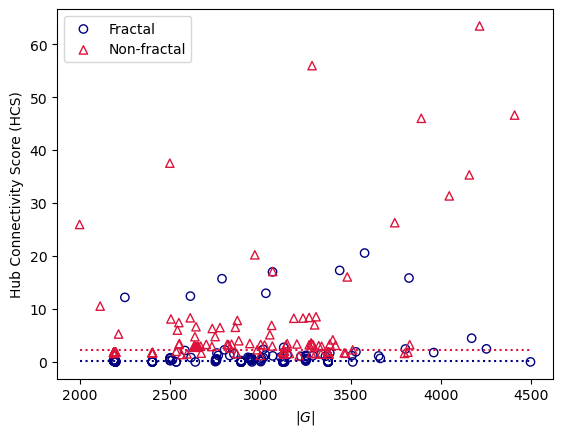

In [56]:
# Initialise an empty list for the fractal networks
fractal_HCSs = []
fractal_real_HCSs = []
fractal_model_HCSs = []

# Initialise an empty list for the non-fractal networks
non_fractal_HCSs = []
non_fractal_real_HCSs = []
non_fractal_model_HCSs = []

# Find the HCS of each model fractal network
for graph in fractal_model_graphs:
    HCS = fn.calculate_HCS(graph)
    fractal_HCSs.append(HCS)
    fractal_model_HCSs.append(HCS)

# Find the HCS of each real fractal network
for graph in fractal_real_graphs:
    HCS = fn.calculate_HCS(graph)
    fractal_HCSs.append(HCS)
    fractal_real_HCSs.append(HCS)
    
# Find the HCS of each model non-fractal network
for graph in non_fractal_model_graphs:
    HCS = fn.calculate_HCS(graph)
    non_fractal_HCSs.append(HCS)
    non_fractal_model_HCSs.append(HCS)

# Find the HCS of each real non-fractal network
for graph in non_fractal_real_graphs:
    HCS = fn.calculate_HCS(graph)
    non_fractal_HCSs.append(HCS)
    non_fractal_real_HCSs.append(HCS)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_HCSs = fn.clean_lists_of_NaNs(fractal_Ns, fractal_HCSs)
clean_non_fractal_Ns, non_fractal_HCSs = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_HCSs)

clean_fractal_real_Ns, fractal_real_HCSs = fn.clean_lists_of_NaNs(fractal_real_Ns, fractal_real_HCSs)
clean_non_fractal_real_Ns, non_fractal_real_HCSs = fn.clean_lists_of_NaNs(non_fractal_real_Ns, non_fractal_real_HCSs)

clean_fractal_model_Ns, fractal_model_HCSs = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_HCSs)
clean_non_fractal_model_Ns, non_fractal_model_HCSs = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_HCSs)
        
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_HCSs, non_fractal_HCSs, clean_fractal_Ns, clean_non_fractal_Ns, "Hub Connectivity Score (HCS)")

In the thesis [1] we plot the HCS for the real and model networks separately.

The following cells plot the HCS for the model networks (Figure 4.1a) and calculate some key attributes of the distribution.

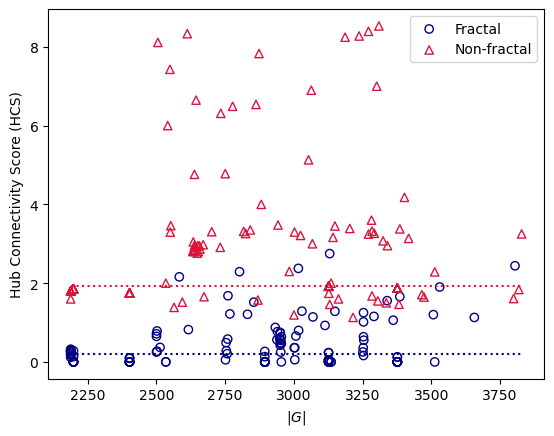

In [59]:
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_model_HCSs, non_fractal_model_HCSs, clean_fractal_model_Ns, clean_non_fractal_model_Ns, "Hub Connectivity Score (HCS)", save_path="../../Figures/Model Hub Connectivity Score")

In [60]:
print("Fractal median HCS: {0}".format(np.median(fractal_model_HCSs)))
print("Fractal max HCS: {0}".format(max(fractal_model_HCSs)))
print("Fractal min HCS: {0}".format(min(fractal_model_HCSs)))
print("Fractal mean HCS: {0}".format(np.mean(fractal_model_HCSs)))

Fractal median HCS: 0.2
Fractal max HCS: 2.75
Fractal min HCS: 0.0
Fractal mean HCS: 0.4262606695566336


In [61]:
print("Non-fractal median HCS: {0}".format(np.median(non_fractal_model_HCSs)))
print("Non-fractal max HCS: {0}".format(max(non_fractal_model_HCSs)))
print("Non-fractal min HCS: {0}".format(min(non_fractal_model_HCSs)))
print("Non-fractal mean HCS: {0}".format(np.mean(non_fractal_model_HCSs)))

Non-fractal median HCS: 1.9230769230769231
Non-fractal max HCS: 8.53061224489796
Non-fractal min HCS: 1.1304347826086956
Non-fractal mean HCS: 2.896346715665986


In [62]:
all_model_HCSs = fractal_model_HCSs + non_fractal_model_HCSs
print("Median HCS: {0}".format(np.median(all_model_HCSs)))
print("Max HCS: {0}".format(max(all_model_HCSs)))
print("Min HCS: {0}".format(min(all_model_HCSs)))
print("Mean HCS: {0}".format(np.mean(all_model_HCSs)))

Median HCS: 1.5714285714285714
Max HCS: 8.53061224489796
Min HCS: 0.0
Mean HCS: 1.6659293219111402


The following cell does the same for the real-world networks (Figure 4.1b).

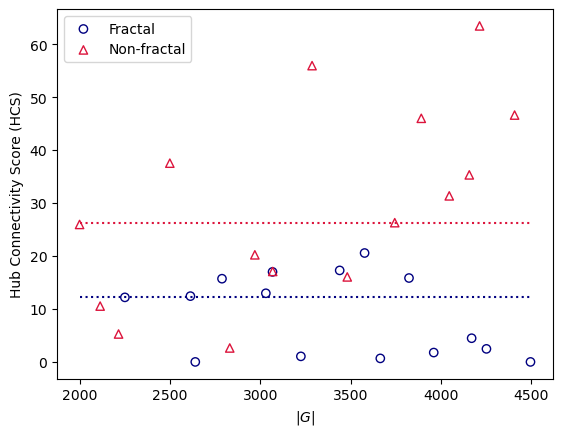

In [64]:
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_real_HCSs, non_fractal_real_HCSs, clean_fractal_real_Ns, clean_non_fractal_real_Ns, "Hub Connectivity Score (HCS)", save_path="../../Figures/Real Hub Connectivity Score")

In [65]:
print("Fractal median HCS: {0}".format(np.median(fractal_real_HCSs)))
print("Fractal max HCS: {0}".format(max(fractal_real_HCSs)))
print("Fractal min HCS: {0}".format(min(fractal_real_HCSs)))
print("Fractal mean HCS: {0}".format(np.mean(fractal_real_HCSs)))

Fractal median HCS: 12.19047619047619
Fractal max HCS: 20.565217391304348
Fractal min HCS: 0.0
Fractal mean HCS: 8.960818058951311


In [66]:
print("Non-fractal median HCS: {0}".format(np.median(non_fractal_real_HCSs)))
print("Non-fractal max HCS: {0}".format(max(non_fractal_real_HCSs)))
print("Non-fractal min HCS: {0}".format(min(non_fractal_real_HCSs)))
print("Non-fractal mean HCS: {0}".format(np.mean(non_fractal_real_HCSs)))

Non-fractal median HCS: 26.294117647058822
Non-fractal max HCS: 63.445378151260506
Non-fractal min HCS: 2.6315789473684212
Non-fractal mean HCS: 29.35045921963873


In [67]:
all_real_HCSs = fractal_real_HCSs + non_fractal_real_HCSs
print("Median HCS: {0}".format(np.median(all_real_HCSs)))
print("Max HCS: {0}".format(max(all_real_HCSs)))
print("Min HCS: {0}".format(min(all_real_HCSs)))
print("Mean HCS: {0}".format(np.mean(all_real_HCSs)))

Median HCS: 15.946568627450981
Max HCS: 63.445378151260506
Min HCS: 0.0
Mean HCS: 19.15563863929502


**Normalised HCS by Number of Hubs**

We define $\text{HCS}_{N_{\text{hub}}}$ to be the Hub Connectivity Score (HCS) normalised by the number of hubs, defined as, 
\begin{equation}
\text{HCS} := 2 \frac{E_{\text{hub}}}{{N_\text{hub}}^2}
\end{equation}

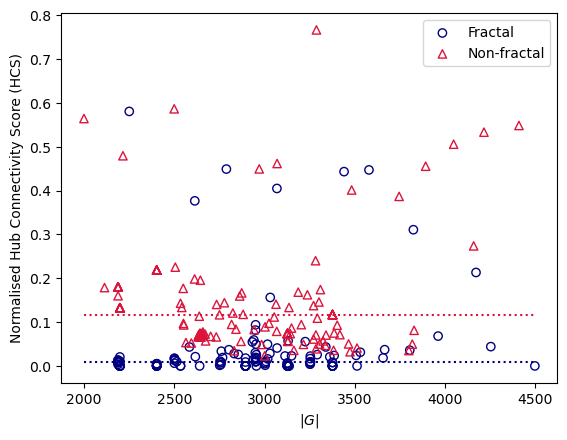

In [76]:
# Initialise an empty list for the fractal networks
fractal_HCSs = []
fractal_real_HCSs = []
fractal_model_HCSs = []

# Initialise an empty list for the non-fractal networks
non_fractal_HCSs = []
non_fractal_real_HCSs = []
non_fractal_model_HCSs = []

# Find the HCS of each model fractal network
for graph in fractal_model_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_number_of_hubs=True)
    fractal_HCSs.append(HCS)
    fractal_model_HCSs.append(HCS)

# Find the HCS of each real fractal network
for graph in fractal_real_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_number_of_hubs=True)
    fractal_HCSs.append(HCS)
    fractal_real_HCSs.append(HCS)
    
# Find the HCS of each model non-fractal network
for graph in non_fractal_model_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_number_of_hubs=True)
    non_fractal_HCSs.append(HCS)
    non_fractal_model_HCSs.append(HCS)

# Find the HCS of each real non-fractal network
for graph in non_fractal_real_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_number_of_hubs=True)
    non_fractal_HCSs.append(HCS)
    non_fractal_real_HCSs.append(HCS)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_HCSs = fn.clean_lists_of_NaNs(fractal_Ns, fractal_HCSs)
clean_non_fractal_Ns, non_fractal_HCSs = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_HCSs)

clean_fractal_real_Ns, fractal_real_HCSs = fn.clean_lists_of_NaNs(fractal_real_Ns, fractal_real_HCSs)
clean_non_fractal_real_Ns, non_fractal_real_HCSs = fn.clean_lists_of_NaNs(non_fractal_real_Ns, non_fractal_real_HCSs)

clean_fractal_model_Ns, fractal_model_HCSs = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_HCSs)
clean_non_fractal_model_Ns, non_fractal_model_HCSs = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_HCSs)
        
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_HCSs, non_fractal_HCSs, clean_fractal_Ns, clean_non_fractal_Ns, "Normalised Hub Connectivity Score (HCS)")

Figure 4.2a shows the results for the model networks.

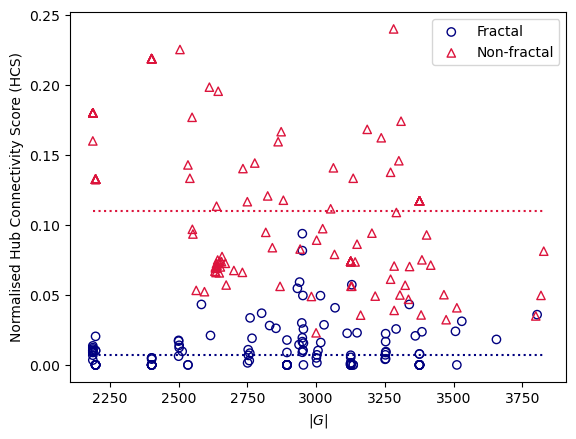

In [77]:
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_model_HCSs, non_fractal_model_HCSs, clean_fractal_model_Ns, clean_non_fractal_model_Ns, "Normalised Hub Connectivity Score (HCS)", save_path="../../Figures/Model Hub Connectivity Score Normalised by Number of Hubs")

Figure 4.2b shows the results for the real-world networks.

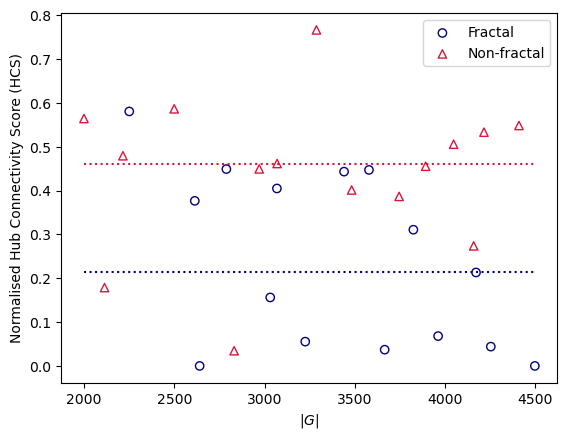

In [78]:
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_real_HCSs, non_fractal_real_HCSs, clean_fractal_real_Ns, clean_non_fractal_real_Ns, "Normalised Hub Connectivity Score (HCS)", save_path="../../Figures/Real Hub Connectivity Score Normalised by Number of Hubs")

**Normalised HCS by Number of Edges**

The following cell plots the HCS of each network normalised by the number of edges, as seen in Figure 4.3a. 

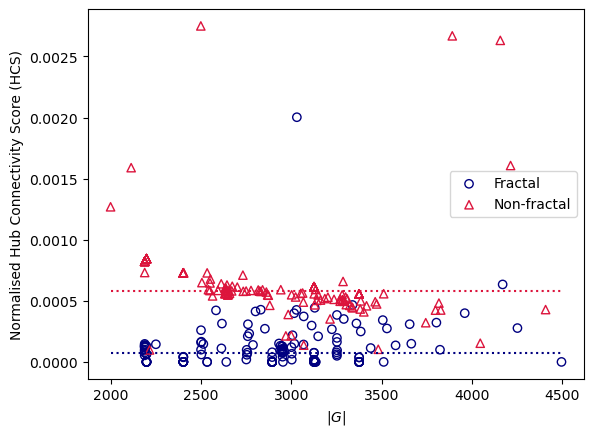

In [95]:
# Initialise an empty list for the fractal networks
fractal_HCSs = []
fractal_real_HCSs = []
fractal_model_HCSs = []

# Initialise an empty list for the non-fractal networks
non_fractal_HCSs = []
non_fractal_real_HCSs = []
non_fractal_model_HCSs = []

# Find the HCS of each model fractal network
for graph in fractal_model_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_number_of_edges=True)
    fractal_HCSs.append(HCS)
    fractal_model_HCSs.append(HCS)

# Find the HCS of each real fractal network
for graph in fractal_real_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_number_of_edges=True)
    fractal_HCSs.append(HCS)
    fractal_real_HCSs.append(HCS)
    
# Find the HCS of each model non-fractal network
for graph in non_fractal_model_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_number_of_edges=True)
    non_fractal_HCSs.append(HCS)
    non_fractal_model_HCSs.append(HCS)

# Find the HCS of each real non-fractal network
for graph in non_fractal_real_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_number_of_edges=True)
    non_fractal_HCSs.append(HCS)
    non_fractal_real_HCSs.append(HCS)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_HCSs = fn.clean_lists_of_NaNs(fractal_Ns, fractal_HCSs)
clean_non_fractal_Ns, non_fractal_HCSs = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_HCSs)

clean_fractal_real_Ns, fractal_real_HCSs = fn.clean_lists_of_NaNs(fractal_real_Ns, fractal_real_HCSs)
clean_non_fractal_real_Ns, non_fractal_real_HCSs = fn.clean_lists_of_NaNs(non_fractal_real_Ns, non_fractal_real_HCSs)

clean_fractal_model_Ns, fractal_model_HCSs = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_HCSs)
clean_non_fractal_model_Ns, non_fractal_model_HCSs = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_HCSs)
        
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_HCSs, non_fractal_HCSs, clean_fractal_Ns, clean_non_fractal_Ns, "Normalised Hub Connectivity Score (HCS)", save_path="../../Figures/Hub Connectivity Score Normalised by Number of Edges")

**Normalised HCS by Mean Node Degree**

The following cell plots the HCS of each network normalised by the mean hub degree, as seen in Figure 4.3b. 

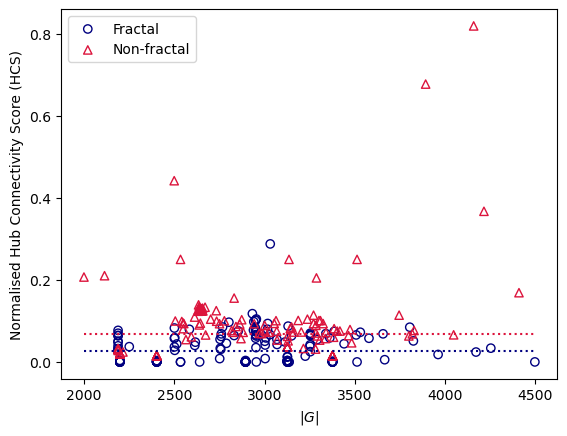

In [97]:
# Initialise an empty list for the fractal networks
fractal_HCSs = []
fractal_real_HCSs = []
fractal_model_HCSs = []

# Initialise an empty list for the non-fractal networks
non_fractal_HCSs = []
non_fractal_real_HCSs = []
non_fractal_model_HCSs = []

# Find the HCS of each model fractal network
for graph in fractal_model_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_mean_hub_degree=True)
    fractal_HCSs.append(HCS)
    fractal_model_HCSs.append(HCS)

# Find the HCS of each real fractal network
for graph in fractal_real_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_mean_hub_degree=True)
    fractal_HCSs.append(HCS)
    fractal_real_HCSs.append(HCS)
    
# Find the HCS of each model non-fractal network
for graph in non_fractal_model_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_mean_hub_degree=True)
    non_fractal_HCSs.append(HCS)
    non_fractal_model_HCSs.append(HCS)

# Find the HCS of each real non-fractal network
for graph in non_fractal_real_graphs:
    HCS = fn.calculate_HCS(graph, normalise_by_mean_hub_degree=True)
    non_fractal_HCSs.append(HCS)
    non_fractal_real_HCSs.append(HCS)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_HCSs = fn.clean_lists_of_NaNs(fractal_Ns, fractal_HCSs)
clean_non_fractal_Ns, non_fractal_HCSs = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_HCSs)

clean_fractal_real_Ns, fractal_real_HCSs = fn.clean_lists_of_NaNs(fractal_real_Ns, fractal_real_HCSs)
clean_non_fractal_real_Ns, non_fractal_real_HCSs = fn.clean_lists_of_NaNs(non_fractal_real_Ns, non_fractal_real_HCSs)

clean_fractal_model_Ns, fractal_model_HCSs = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_HCSs)
clean_non_fractal_model_Ns, non_fractal_model_HCSs = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_HCSs)
        
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_HCSs, non_fractal_HCSs, clean_fractal_Ns, clean_non_fractal_Ns, "Normalised Hub Connectivity Score (HCS)", save_path="../../Figures/Hub Connectivity Score Normalised by Mean Hub Degree")

**Mean Hub Distances**

The following code generates a figure showing the mean hub distances in fractal and non-fractal networks (Figure 4.4). 

C:\Users\hamil\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hamil\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


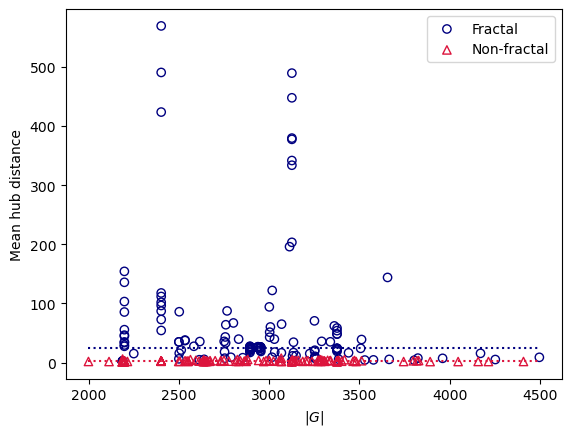

In [101]:
# Initialise an empty list for the fractal networks
fractal_mean_hub_distances = []

# Initialise an empty list for the non-fractal networks
non_fractal_mean_hub_distances = []

# Initialise empty lists for the real networks 
fractal_real_mean_hub_distances = []
non_fractal_real_mean_hub_distances = []

# Initialise empty lists for the real networks 
fractal_model_mean_hub_distances = []
non_fractal_model_mean_hub_distances = []

# Find the mean hub distance of each fractal network
for graph in fractal_real_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph)
    fractal_mean_hub_distances.append(mean_distance)
    fractal_real_mean_hub_distances.append(mean_distance)
    
for graph in fractal_model_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph)
    fractal_mean_hub_distances.append(mean_distance)
    fractal_model_mean_hub_distances.append(mean_distance)
    
# Find the mean hub distance of each non-fractal network
for graph in non_fractal_real_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph)
    non_fractal_mean_hub_distances.append(mean_distance)
    non_fractal_real_mean_hub_distances.append(mean_distance)
    
for graph in non_fractal_model_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph)
    non_fractal_mean_hub_distances.append(mean_distance)
    non_fractal_model_mean_hub_distances.append(mean_distance)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_Ns, fractal_mean_hub_distances)
clean_non_fractal_Ns, non_fractal_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_mean_hub_distances)
 
clean_fractal_real_Ns, fractal_real_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_real_Ns, fractal_real_mean_hub_distances)
clean_non_fractal_real_Ns, non_fractal_real_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_real_Ns, non_fractal_real_mean_hub_distances)
   
clean_fractal_model_Ns, fractal_model_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_mean_hub_distances)
clean_non_fractal_model_Ns, non_fractal_model_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_mean_hub_distances)
       
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_mean_hub_distances, non_fractal_mean_hub_distances, clean_fractal_Ns, clean_non_fractal_Ns, "Mean hub distance", )

Figure 4.4a shows the result for just the model networks. 

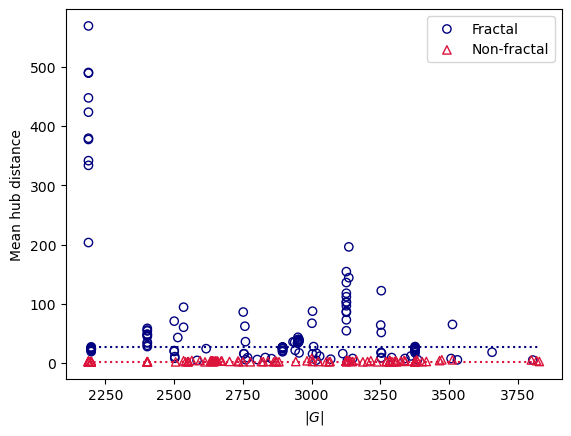

In [103]:
# Model networks
fn.plot_scatter_graph(fractal_model_mean_hub_distances, non_fractal_model_mean_hub_distances, clean_fractal_model_Ns, clean_non_fractal_model_Ns, "Mean hub distance", save_path='../../Figures/Model Mean Hub Distance')

Figure 4.4b shows the result for just the real-world networks. 

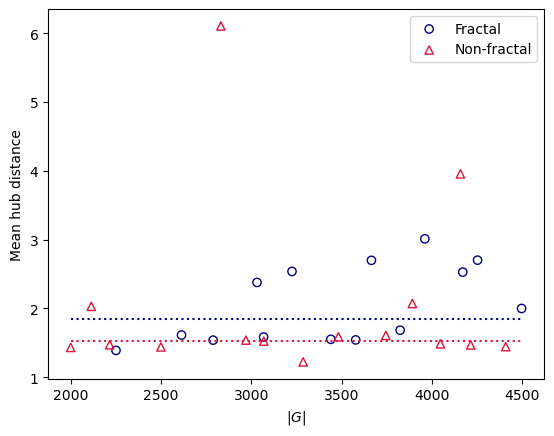

In [105]:
# Real networks
fn.plot_scatter_graph(fractal_real_mean_hub_distances, non_fractal_real_mean_hub_distances, clean_fractal_real_Ns, clean_non_fractal_real_Ns, "Mean hub distance", save_path='../../Figures/Real Mean Hub Distance')

**Normalised Mean Hub Distance**

The following code generates a figure showing the normalised mean hub distances in fractal and non-fractal networks (Figure 4.5). 

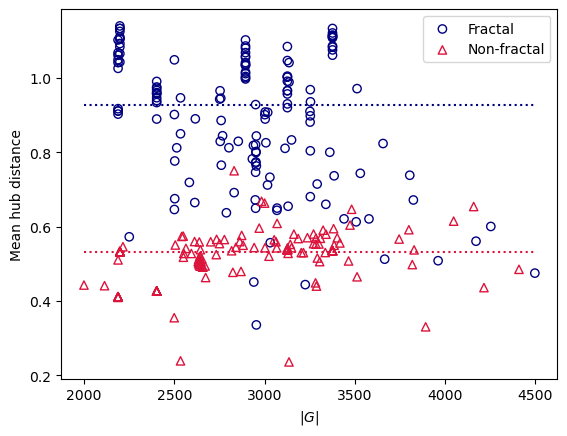

In [108]:
# Initialise an empty list for the fractal networks
fractal_mean_hub_distances = []

# Initialise an empty list for the non-fractal networks
non_fractal_mean_hub_distances = []

# Initialise empty lists for the real networks 
fractal_real_mean_hub_distances = []
non_fractal_real_mean_hub_distances = []

# Initialise empty lists for the real networks 
fractal_model_mean_hub_distances = []
non_fractal_model_mean_hub_distances = []

for graph in fractal_model_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph, normalised=True)
    fractal_mean_hub_distances.append(mean_distance)
    fractal_model_mean_hub_distances.append(mean_distance)
    
# Find the mean hub distance of each fractal network
for graph in fractal_real_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph, normalised=True)
    fractal_mean_hub_distances.append(mean_distance)
    fractal_real_mean_hub_distances.append(mean_distance)
    
for graph in non_fractal_model_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph, normalised=True)
    non_fractal_mean_hub_distances.append(mean_distance)
    non_fractal_model_mean_hub_distances.append(mean_distance)
    
# Find the mean hub distance of each non-fractal network
for graph in non_fractal_real_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph, normalised=True)
    non_fractal_mean_hub_distances.append(mean_distance)
    non_fractal_real_mean_hub_distances.append(mean_distance)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_Ns, fractal_mean_hub_distances)
clean_non_fractal_Ns, non_fractal_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_mean_hub_distances)
 
clean_fractal_real_Ns, fractal_real_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_real_Ns, fractal_real_mean_hub_distances)
clean_non_fractal_real_Ns, non_fractal_real_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_real_Ns, non_fractal_real_mean_hub_distances)
   
clean_fractal_model_Ns, fractal_model_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_mean_hub_distances)
clean_non_fractal_model_Ns, non_fractal_model_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_mean_hub_distances)
       
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_mean_hub_distances, non_fractal_mean_hub_distances, clean_fractal_Ns, clean_non_fractal_Ns, "Mean hub distance", save_path='../../Figures/Normalised Mean Hub Distance')

Figure 4.5a shows the results for model networks.

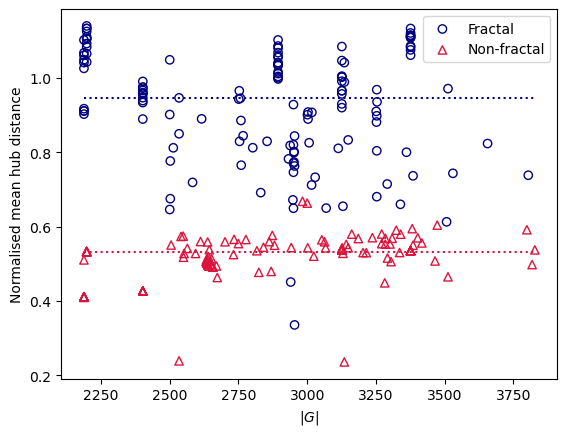

In [109]:
# Model networks
fn.plot_scatter_graph(fractal_model_mean_hub_distances, non_fractal_model_mean_hub_distances, clean_fractal_model_Ns, clean_non_fractal_model_Ns, "Normalised mean hub distance", save_path='../../Figures/Model Normalised Mean Hub Distance')

Figure 4.5b shows the results for real-world networks.

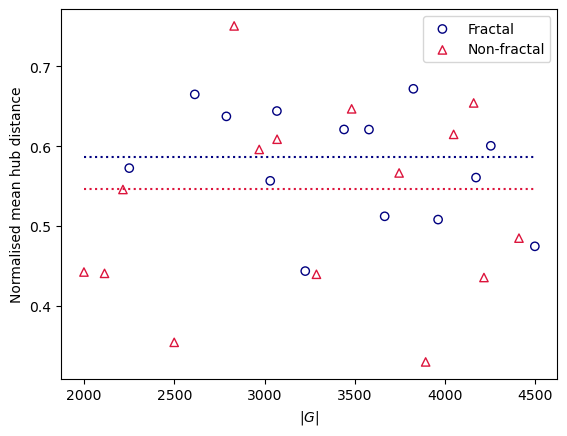

In [110]:
# Real networks
fn.plot_scatter_graph(fractal_real_mean_hub_distances, non_fractal_real_mean_hub_distances, clean_fractal_real_Ns, clean_non_fractal_real_Ns, "Normalised mean hub distance", save_path='../../Figures/Real Normalised Mean Hub Distance')

<h2>4.3 Fractality of Skeletons

Some of the networks we use are trees, in which case the skeleton is exactly the original network. Therefore, we do not consider these in our analysis of the network skeletons. The following cells identify which networks are trees. 

In [4]:
directory = 'network-files/models/'

for folder in os.listdir(directory):
    if not folder.startswith('.'):
        network_type = folder.split('/')[0].replace('-', ' ')

        non_trees = False
        for file in os.listdir(directory+folder):
            if file.endswith('.gml'):
                graph = Graph.Load(directory+folder+'/'+file)
                if not graph.is_tree():
                    non_trees = True
        if non_trees:
            print("There exist {} networks which are not trees.".format(network_type))
        else:
            print("All {} networks are trees.".format(network_type))

There exist barabasi albert model networks which are not trees.
There exist HADG model networks which are not trees.
There exist nested BA model networks which are not trees.
All SHM model networks are trees.
There exist uv flowers networks which are not trees.


In [11]:
directory = 'network-files/real-world/'

for folder in os.listdir(directory):
    if not folder.startswith('.') and folder != 'skeletons':
        network_type = folder.split('/')[0].replace('-', ' ')

        non_trees = False
        for file in os.listdir(directory+folder):
            if file.endswith('.gml'):
                graph = Graph.Load(directory+folder+'/'+file)
                if not graph.is_tree():
                    non_trees = True
        if non_trees:
            print("There exist {} networks which are not trees.".format(network_type))
        else:
            print("All {} networks are trees.".format(network_type))

There exist biological networks which are not trees.
There exist collaboration networks which are not trees.
There exist retweet networks which are not trees.
There exist road networks which are not trees.
There exist social networks which are not trees.
There exist technological networks which are not trees.
There exist web networks which are not trees.


**Finding the Skeletons of Networks**

Each of the network skeletons are found using the function `fn.find_skel` and saved to the respective folders in <a> https://github.com/katherinehamilton/fractalnetworks/tree/main/network-files </a>.

**Checking the Fractality of Skeletons**

The following cell checks the fractality of HADG network skeletons. 

In [3]:
folder = 'result-files/models/HADG-model/skeletons/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder + file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


fractal_HADG_1_7_08_09_ex1_results
This network is fractal with box dimension 1.7119.
Power law score: 0.9886.
Exponential score: 0.8085.

fractal_HADG_1_7_08_09_ex2_results
This network is fractal with box dimension 1.7287.
Power law score: 0.9895.
Exponential score: 0.8263.

fractal_HADG_1_7_08_09_ex3_results
This network is fractal with box dimension 1.7718.
Power law score: 0.9822.
Exponential score: 0.7940.

fractal_HADG_1_7_08_09_ex4_results
This network is fractal with box dimension 1.7874.
Power law score: 0.9878.
Exponential score: 0.8028.

fractal_HADG_1_7_08_09_ex5_results
This network is fractal with box dimension 1.7454.
Power law score: 0.9879.
Exponential score: 0.8298.

fractal_HADG_1_7_08_10_ex1_results
This network is fractal with box dimension 1.9192.
Power law score: 0.9736.
Exponential score: 0.7723.

fractal_HADG_1_7_08_10_ex2_results
This network is fractal with box dimension 1.7287.
Power law score: 0.9876.
Exponential score: 0.8327.

fractal_HADG_1_7_08_10_ex3

The following cell checks the fractality of $(u,v)$-flower network skeletons. 

In [7]:
folder = 'result-files/models/uv-flowers/skeletons/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder + file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


fractal_3_5_flower_skeleton_results
This network is fractal with box dimension 1.7513.
Power law score: 0.9624.
Exponential score: 0.6940.

fractal_4_10_flower_skeleton_results
This network is fractal with box dimension 1.6150.
Power law score: 0.9603.
Exponential score: 0.6833.

fractal_5_9_flower_skeleton_results
This network is fractal with box dimension 1.5360.
Power law score: 0.9453.
Exponential score: 0.6452.

fractal_6_9_flower_skeleton_results
This network is fractal with box dimension 1.3573.
Power law score: 0.9501.
Exponential score: 0.6433.

fractal_7_8_flower_skeleton_results
This network is fractal with box dimension 1.2739.
Power law score: 0.9407.
Exponential score: 0.6179.

non_fractal_1_13_flower_skeleton_results
This network is non-fractal.
Power law score: 0.8449.
Exponential score: 0.9651.

non_fractal_1_14_flower_skeleton_results
This network is non-fractal.
Power law score: 0.8425.
Exponential score: 0.9694.

non_fractal_1_2_flower_skeleton_results
This network

The following cell checks the fractality of Nested Barabási-Albert network skeletons. 

In [10]:
folder = 'result-files/models/nested-BA-model/skeletons/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder + file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


nested_BA_1_2500_100_skeleton_results
This network is non-fractal.
Power law score: 0.9349.
Exponential score: 0.9934.

nested_BA_1_2500_10_skeleton_results
This network is fractal with box dimension 1.6152.
Power law score: 0.9839.
Exponential score: 0.8114.

nested_BA_1_2500_125_skeleton_results
This network is non-fractal.
Power law score: 0.9508.
Exponential score: 0.9870.

nested_BA_1_2500_150_skeleton_results
This network is non-fractal.
Power law score: 0.9517.
Exponential score: 0.9873.

nested_BA_1_2500_25_skeleton_results
This network is fractal with box dimension 1.7563.
Power law score: 0.9853.
Exponential score: 0.8822.

nested_BA_1_2500_50_skeleton_results
This network is fractal with box dimension 2.1375.
Power law score: 0.9877.
Exponential score: 0.8173.

nested_BA_1_2500_5_skeleton_results
This network is fractal with box dimension 1.4173.
Power law score: 0.9874.
Exponential score: 0.8160.

nested_BA_1_2500_75_skeleton_results
This network is fractal with box dimens

The following cell checks the fractality of Barabási-Albert network skeletons. 

In [13]:
folder = 'result-files/models/barabasi-albert-model/skeletons/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder + file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


BA_model_1_2564_skeleton_results
This network is non-fractal.
Power law score: 0.9428.
Exponential score: 0.9886.

BA_model_1_2594_skeleton_results
This network is non-fractal.
Power law score: 0.9455.
Exponential score: 0.9913.

BA_model_1_3130_skeleton_results
This network is non-fractal.
Power law score: 0.9418.
Exponential score: 0.9920.

BA_model_1_3162_skeleton_results
This network is non-fractal.
Power law score: 0.9478.
Exponential score: 0.9857.

BA_model_1_3284_skeleton_results
This network is non-fractal.
Power law score: 0.9596.
Exponential score: 0.9826.

BA_model_1_3465_skeleton_results
This network is non-fractal.
Power law score: 0.9538.
Exponential score: 0.9858.

BA_model_1_3473_skeleton_results
This network is non-fractal.
Power law score: 0.9635.
Exponential score: 0.9792.

BA_model_2_2552_skeleton_results
This network is fractal with box dimension 4.4993.
Power law score: 0.9755.
Exponential score: 0.9279.

BA_model_2_2817_skeleton_results
This network is non-frac

The following cell checks the fractality of real-world network skeletons. 

In [16]:
folder = 'result-files/real-world/skeletons/'
for file in os.listdir(folder):
    print("\n" + file)
    fn.is_fractal(folder + file, verbose=True, p_list = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])


bio-CE-GN_processed-skeleton_results
This network is fractal with box dimension 1.9477.
Power law score: 0.9783.
Exponential score: 0.9279.

bio-DM-HT_processed-skeleton_results
This network is fractal with box dimension 2.7596.
Power law score: 0.9757.
Exponential score: 0.9409.

bio-DR-CX_processed-skeleton_results
This network is fractal with box dimension 1.9006.
Power law score: 0.9865.
Exponential score: 0.8933.

bio-HS-CX_processed-skeleton_results
This network is fractal with box dimension 2.9038.
Power law score: 0.9793.
Exponential score: 0.9378.

bio-HS-HT_processed-skeleton_results
This network is fractal with box dimension 3.5515.
Power law score: 0.9855.
Exponential score: 0.9444.

bio-HS-LC_processed-skeleton_results
This network is fractal with box dimension 2.8772.
Power law score: 0.9719.
Exponential score: 0.9584.

bio-SC-LC_processed-skeleton_results
This network is fractal with box dimension 2.7304.
Power law score: 0.9739.
Exponential score: 0.9637.

ca-GrQc_proc

<h2>4.4 Properties of Fractal Networks

<h3> 4.4.1 Betweenness Centrality and Degree Correlation

The code in this section plots a scatter graph of the correlation between the degree of nodes and their betweenness centrality (Figure 4.6). 

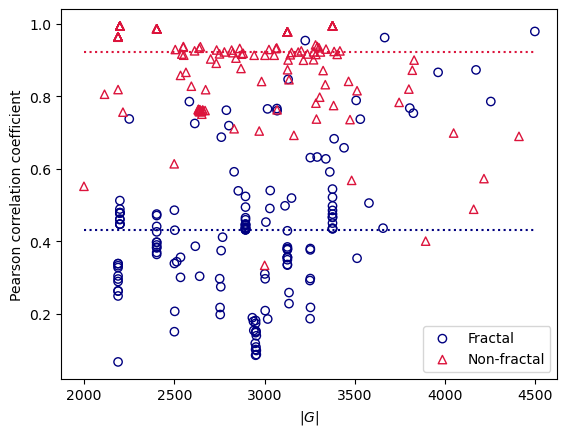

In [62]:
# Initialise an empty list for the fractal networks
fractal_correlation = []

# Initialise an empty list for the non-fractal networks 
non_fractal_correlation = []

# Initialise empty lists for real and model networks
fractal_real_correlation = []
fractal_model_correlation = []
non_fractal_real_correlation = []
non_fractal_model_correlation = []
    
# Find the correlation coefficient for each fractal network
for graph in fractal_model_graphs:
    r = fn.calc_betweenness_degree_correlation(graph)
    fractal_correlation.append(r)
    fractal_model_correlation.append(r)
    
# Find the correlation coefficient for each non-fractal network
for graph in non_fractal_model_graphs:
    r = fn.calc_betweenness_degree_correlation(graph)
    non_fractal_correlation.append(r)
    non_fractal_model_correlation.append(r)
    
# Find the correlation coefficient for each fractal network
for graph in fractal_real_graphs:
    r = fn.calc_betweenness_degree_correlation(graph)
    fractal_correlation.append(r)
    fractal_real_correlation.append(r)
    
# Find the correlation coefficient for each non-fractal network
for graph in non_fractal_real_graphs:
    r = fn.calc_betweenness_degree_correlation(graph)
    non_fractal_correlation.append(r)
    non_fractal_real_correlation.append(r)

fn.plot_scatter_graph(fractal_correlation, non_fractal_correlation, fractal_Ns, non_fractal_Ns, "Pearson correlation coefficient", save_path='../../Figures/Degree Betweenness Correlation.')

We also plot the correlation coefficients for just the model networks (Figure 4.6a)...

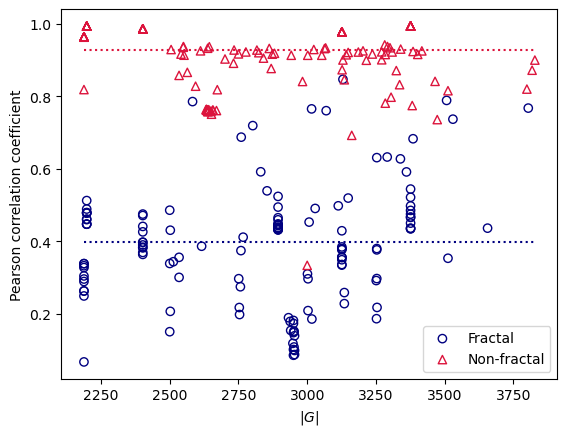

In [64]:
# Model Networks
fn.plot_scatter_graph(fractal_model_correlation, non_fractal_model_correlation, fractal_model_Ns, non_fractal_model_Ns, "Pearson correlation coefficient", save_path='../../Figures/Model Degree Betweenness Correlation.')

... and just the real-world networks (Figure 4.6b).

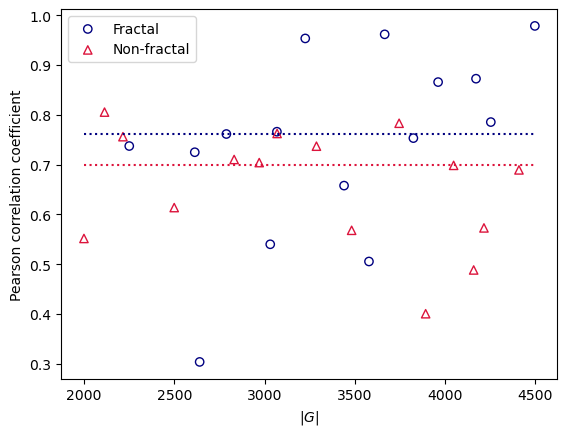

In [63]:
# Real Networks
fn.plot_scatter_graph(fractal_real_correlation, non_fractal_real_correlation, fractal_real_Ns, non_fractal_real_Ns, "Pearson correlation coefficient", save_path='../../Figures/Real Degree Betweenness Correlation.')

<h3> 4.4.2 Edge Betweenness Centrality

The following cell analyses the edge betweenness centrality distribution of fractal and non-fractal graphs.

In [81]:
# Initialise lists for the fractal hub properties
fractal_max_ebc = []
fractal_min_ebc = []
fractal_mean_ebc = []
fractal_stdv_ebc = []
fractal_no_of_high_ebc_nodes = []
fractal_mean_max_ebc = []

# Initialise lists for the non-fractal hub properties
non_fractal_max_ebc = []
non_fractal_min_ebc = []
non_fractal_mean_ebc = []
non_fractal_stdv_ebc = []
non_fractal_no_of_high_ebc_nodes = []
non_fractal_mean_max_ebc = []

# Initialise lists for model networks
fractal_model_max_ebc = []
fractal_model_min_ebc = []
fractal_model_mean_ebc = []
fractal_model_stdv_ebc = []
fractal_model_no_of_high_ebc_nodes = []
fractal_model_mean_max_ebc = []

non_fractal_model_max_ebc = []
non_fractal_model_min_ebc = []
non_fractal_model_mean_ebc = []
non_fractal_model_stdv_ebc = []
non_fractal_model_no_of_high_ebc_nodes = []
non_fractal_model_mean_max_ebc = []

# Initialise lists for real networks
fractal_real_max_ebc = []
fractal_real_min_ebc = []
fractal_real_mean_ebc = []
fractal_real_stdv_ebc = []
fractal_real_no_of_high_ebc_nodes = []
fractal_real_mean_max_ebc = []

non_fractal_real_max_ebc = []
non_fractal_real_min_ebc = []
non_fractal_real_mean_ebc = []
non_fractal_real_stdv_ebc = []
non_fractal_real_no_of_high_ebc_nodes = []
non_fractal_real_mean_max_ebc = []


# Iterate through each of the fractal graphs
for graph in fractal_model_graphs:
    # Find the edge betweenness centralities
    ebcs = fn.find_edge_betweenness_centralities(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_bc, min_bc, mean_bc, stdv_bc, no_of_high_bc_nodes, mean_max_bc = fn.analyse_betweenness_centrality(graph, bcs=ebcs)
    
    # Add the hub properties to their respective lists
    fractal_max_ebc.append(max_bc)
    fractal_min_ebc.append(min_bc)
    fractal_mean_ebc.append(mean_bc)
    fractal_stdv_ebc.append(stdv_bc)
    fractal_no_of_high_ebc_nodes.append(no_of_high_bc_nodes)
    fractal_mean_max_ebc.append(mean_max_bc)
    
    # Add the hub properties to their respective lists
    fractal_model_max_ebc.append(max_bc)
    fractal_model_min_ebc.append(min_bc)
    fractal_model_mean_ebc.append(mean_bc)
    fractal_model_stdv_ebc.append(stdv_bc)
    fractal_model_no_of_high_ebc_nodes.append(no_of_high_bc_nodes)
    fractal_model_mean_max_ebc.append(mean_max_bc)
    
for graph in fractal_real_graphs:
    # Find the edge betweenness centralities
    ebcs = fn.find_edge_betweenness_centralities(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_bc, min_bc, mean_bc, stdv_bc, no_of_high_bc_nodes, mean_max_bc = fn.analyse_betweenness_centrality(graph, bcs=ebcs)
    
    # Add the hub properties to their respective lists
    fractal_max_ebc.append(max_bc)
    fractal_min_ebc.append(min_bc)
    fractal_mean_ebc.append(mean_bc)
    fractal_stdv_ebc.append(stdv_bc)
    fractal_no_of_high_ebc_nodes.append(no_of_high_bc_nodes)
    fractal_mean_max_ebc.append(mean_max_bc)
    
    # Add the hub properties to their respective lists
    fractal_real_max_ebc.append(max_bc)
    fractal_real_min_ebc.append(min_bc)
    fractal_real_mean_ebc.append(mean_bc)
    fractal_real_stdv_ebc.append(stdv_bc)
    fractal_real_no_of_high_ebc_nodes.append(no_of_high_bc_nodes)
    fractal_real_mean_max_ebc.append(mean_max_bc)
    
# Iterate through each of the non-fractal graphs
for graph in non_fractal_model_graphs:
    # Find the edge betweenness centralities
    ebcs = fn.find_edge_betweenness_centralities(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_bc, min_bc, mean_bc, stdv_bc, no_of_high_bc_nodes, mean_max_bc = fn.analyse_betweenness_centrality(graph, bcs=ebcs)
    
    # Add the hub properties to their respective lists
    non_fractal_max_ebc.append(max_bc)
    non_fractal_min_ebc.append(min_bc)
    non_fractal_mean_ebc.append(mean_bc)
    non_fractal_stdv_ebc.append(stdv_bc)
    non_fractal_no_of_high_ebc_nodes.append(no_of_high_bc_nodes)
    non_fractal_mean_max_ebc.append(mean_max_bc)
    
    # Add the hub properties to their respective lists
    non_fractal_model_max_ebc.append(max_bc)
    non_fractal_model_min_ebc.append(min_bc)
    non_fractal_model_mean_ebc.append(mean_bc)
    non_fractal_model_stdv_ebc.append(stdv_bc)
    non_fractal_model_no_of_high_ebc_nodes.append(no_of_high_bc_nodes)
    non_fractal_model_mean_max_ebc.append(mean_max_bc)
    
for graph in non_fractal_real_graphs:
    # Find the edge betweenness centralities
    ebcs = fn.find_edge_betweenness_centralities(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_bc, min_bc, mean_bc, stdv_bc, no_of_high_bc_nodes, mean_max_bc = fn.analyse_betweenness_centrality(graph, bcs=ebcs)
    
    # Add the hub properties to their respective lists
    non_fractal_max_ebc.append(max_bc)
    non_fractal_min_ebc.append(min_bc)
    non_fractal_mean_ebc.append(mean_bc)
    non_fractal_stdv_ebc.append(stdv_bc)
    non_fractal_no_of_high_ebc_nodes.append(no_of_high_bc_nodes)
    non_fractal_mean_max_ebc.append(mean_max_bc)
    
    # Add the hub properties to their respective lists
    non_fractal_real_max_ebc.append(max_bc)
    non_fractal_real_min_ebc.append(min_bc)
    non_fractal_real_mean_ebc.append(mean_bc)
    non_fractal_real_stdv_ebc.append(stdv_bc)
    non_fractal_real_no_of_high_ebc_nodes.append(no_of_high_bc_nodes)
    non_fractal_real_mean_max_ebc.append(mean_max_bc)

**Maximum Edge Betweenness Centrality**

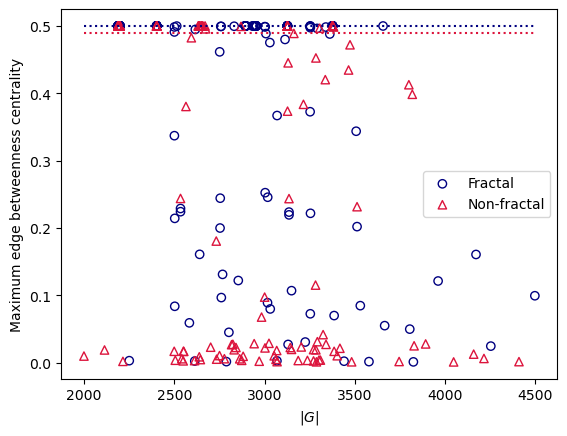

In [83]:
fn.plot_scatter_graph(fractal_max_ebc, non_fractal_max_ebc, fractal_Ns, non_fractal_Ns, "Maximum edge betweenness centrality", save_path='../../Figures/Maximum EBC')

Figure 4.7a shows the maximum edge betweenness centralities in the model networks.

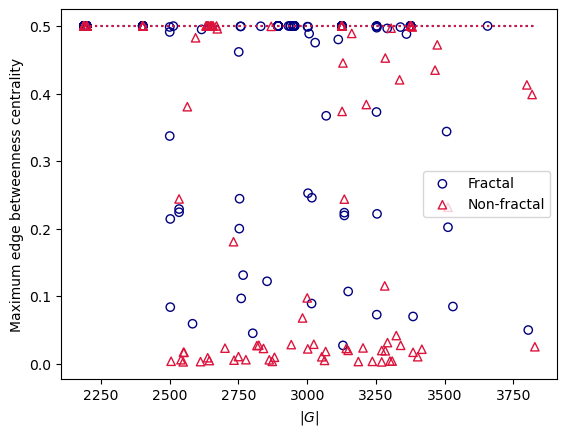

In [84]:
fn.plot_scatter_graph(fractal_model_max_ebc, non_fractal_model_max_ebc, fractal_model_Ns, non_fractal_model_Ns, "Maximum edge betweenness centrality", save_path='../../Figures/Model Maximum EBC')

Figure 4.7b shows the maximum edge betweenness centralities in the real-world networks.

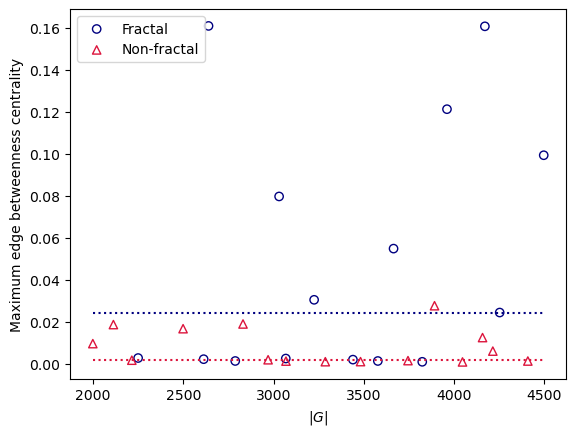

In [85]:
fn.plot_scatter_graph(fractal_real_max_ebc, non_fractal_real_max_ebc, fractal_real_Ns, non_fractal_real_Ns, "Maximum edge betweenness centrality", save_path='../../Figures/Real Maximum EBC')

**Mean Edge Betweenness Centrality**

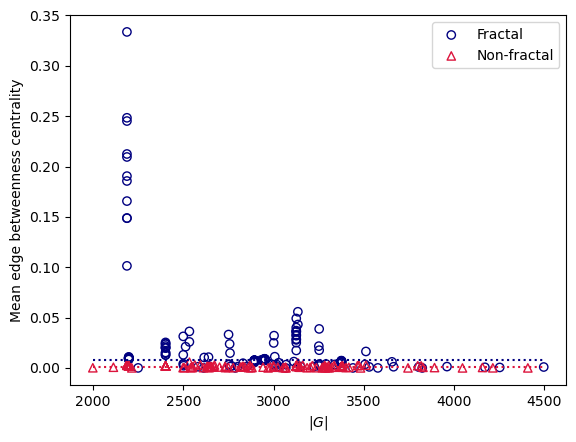

In [87]:
fn.plot_scatter_graph(fractal_mean_ebc, non_fractal_mean_ebc, fractal_Ns, non_fractal_Ns, "Mean edge betweenness centrality", save_path='../../Figures/Mean EBC')

Figure 4.8a shows the mean edge betweenness centralities in the model networks.

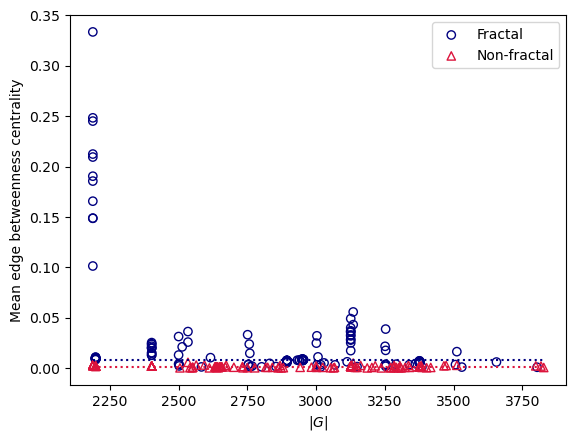

In [88]:
fn.plot_scatter_graph(fractal_model_mean_ebc, non_fractal_model_mean_ebc, fractal_model_Ns, non_fractal_model_Ns, "Mean edge betweenness centrality", save_path= "../../Figures/Model Mean EBC")

Figure 4.8b shows the mean edge betweenness centralities in the real networks.

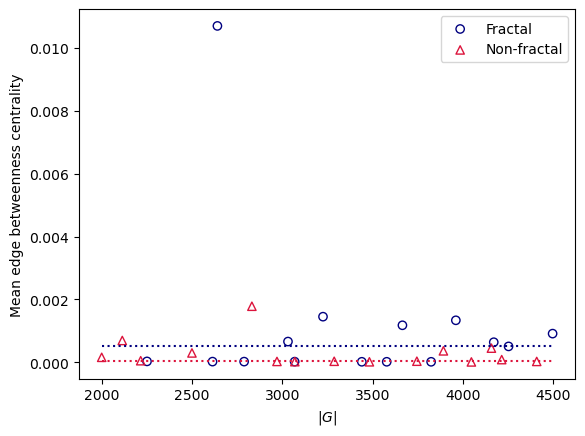

In [89]:
fn.plot_scatter_graph(fractal_real_mean_ebc, non_fractal_real_mean_ebc, fractal_real_Ns, non_fractal_real_Ns, "Mean edge betweenness centrality", save_path='../../Figures/Real Mean EBC')

**Mean Top 10% of Edge Betweenness Centralities**

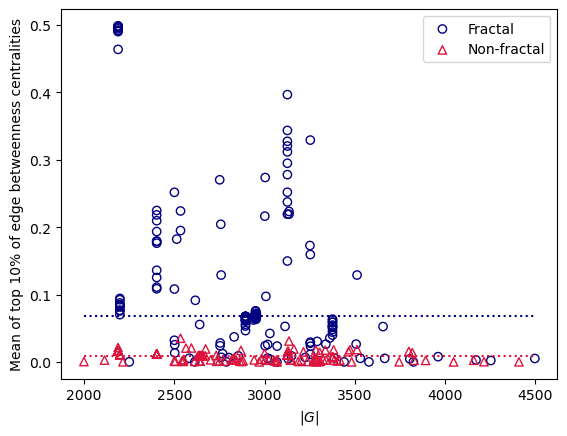

In [95]:
fn.plot_scatter_graph(fractal_mean_max_ebc, non_fractal_mean_max_ebc, fractal_Ns, non_fractal_Ns, "Mean of top 10% of edge betweenness centralities", save_path='../../Figures/Mean Max EBC')

Figure 4.9a shows the mean of the top 10% of edge betweenness centrality values in the model networks.

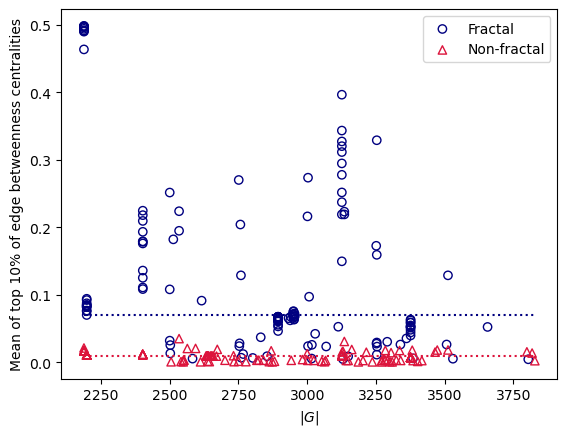

In [96]:
fn.plot_scatter_graph(fractal_model_mean_max_ebc, non_fractal_model_mean_max_ebc, fractal_model_Ns, non_fractal_model_Ns, "Mean of top 10% of edge betweenness centralities", save_path='../../Figures/Model Mean Max EBC')

Figure 4.9b shows the mean of the top 10% of edge betweenness centrality values in the real networks.

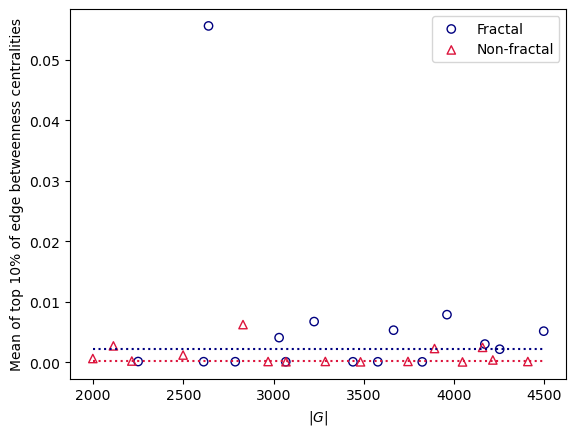

In [97]:
fn.plot_scatter_graph(fractal_real_mean_max_ebc, non_fractal_real_mean_max_ebc, fractal_real_Ns, non_fractal_real_Ns, "Mean of top 10% of edge betweenness centralities", save_path='../../Figures/Real Mean Max EBC')

**Number of High Betweenness Centrality Edges**

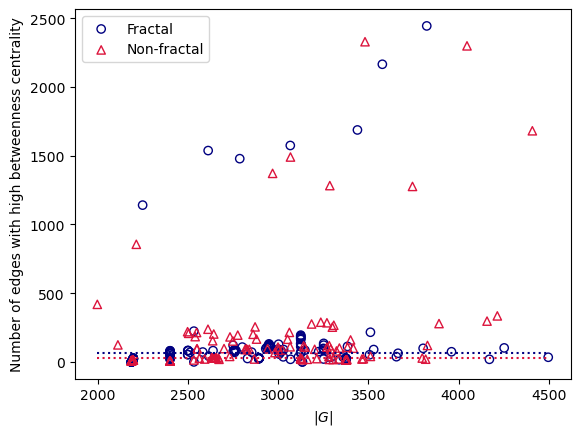

In [91]:
fn.plot_scatter_graph(fractal_no_of_high_ebc_nodes, non_fractal_no_of_high_ebc_nodes, fractal_Ns, non_fractal_Ns, "Number of edges with high betweenness centrality", save_path='../../Figures/Number of High Betweenness Edges')

Figure 4.10a shows the number of edges with high betweenness centrality in the model networks.

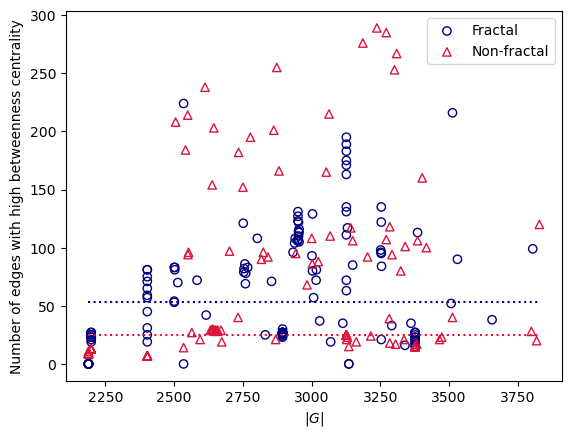

In [92]:
fn.plot_scatter_graph(fractal_model_no_of_high_ebc_nodes, non_fractal_model_no_of_high_ebc_nodes, fractal_model_Ns, non_fractal_model_Ns, "Number of edges with high betweenness centrality", save_path='../../Figures/Model Number of High Betweenness Edges')

Figure 4.10b shows the number of edges with high betweenness centrality in the real-world networks.

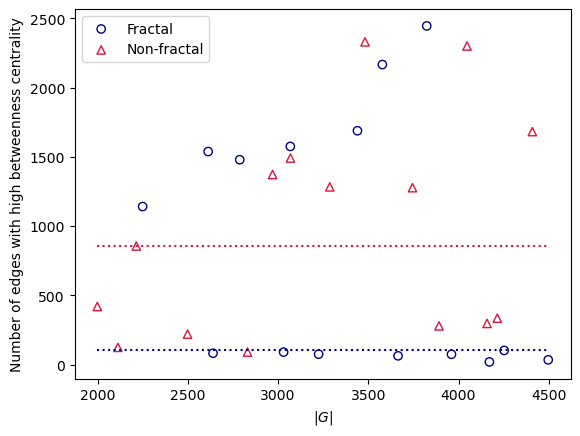

In [93]:
fn.plot_scatter_graph(fractal_real_no_of_high_ebc_nodes, non_fractal_real_no_of_high_ebc_nodes, fractal_real_Ns, non_fractal_real_Ns, "Number of edges with high betweenness centrality", save_path='../../Figures/Real Number of High Betweenness Edges')

<h3> 4.4.3 Network Distances

We analyse the diameters and average shortest path lengths of the fractal and non-fractal networks. 

In [131]:
# Initialise lists for the fractal networks
fractal_diams = []
fractal_real_diams = []
fractal_model_diams = []

fractal_ASPLs = []
fractal_real_ASPLs = []
fractal_model_ASPLs = []

# Initialise lists for the non-fractal networks
non_fractal_diams = []
non_fractal_real_diams = []
non_fractal_model_diams = []

non_fractal_ASPLs = []
non_fractal_real_ASPLs = []
non_fractal_model_ASPLs = []

# Find values for fractal networks
for graph in fractal_model_graphs:
    diam = graph.diameter()
    ASPL = graph.average_path_length()
    
    fractal_diams.append(diam)
    fractal_ASPLs.append(ASPL)
    
    fractal_model_diams.append(diam)
    fractal_model_ASPLs.append(ASPL)

for graph in non_fractal_model_graphs:
    diam = graph.diameter()
    ASPL = graph.average_path_length()
    
    non_fractal_diams.append(diam)
    non_fractal_ASPLs.append(ASPL)
    
    non_fractal_model_diams.append(diam)
    non_fractal_model_ASPLs.append(ASPL)
    
for graph in fractal_real_graphs:
    diam = graph.diameter()
    ASPL = graph.average_path_length()
    
    fractal_diams.append(diam)
    fractal_ASPLs.append(ASPL)
    
    fractal_real_diams.append(diam)
    fractal_real_ASPLs.append(ASPL)

for graph in non_fractal_real_graphs:
    diam = graph.diameter()
    ASPL = graph.average_path_length()
    
    non_fractal_diams.append(diam)
    non_fractal_ASPLs.append(ASPL)
    
    non_fractal_real_diams.append(diam)
    non_fractal_real_ASPLs.append(ASPL)

**Diameter**

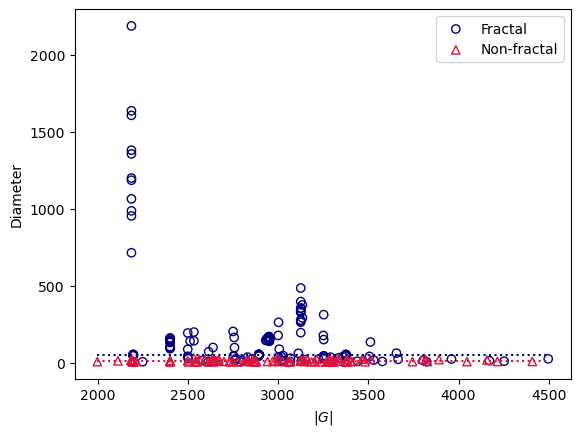

In [132]:
# Plot all
fn.plot_scatter_graph(fractal_diams, non_fractal_diams, fractal_Ns, non_fractal_Ns, "Diameter", save_path='../../Figures/Diameter')

Figure 4.11a shows the diameter of the model networks. 

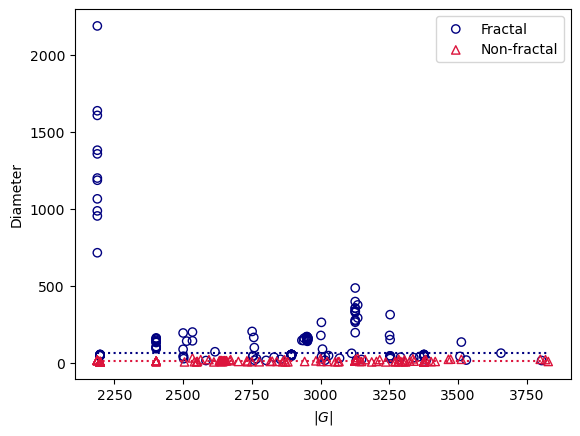

In [133]:
# Plot model networks
fn.plot_scatter_graph(fractal_model_diams, non_fractal_model_diams, fractal_model_Ns, non_fractal_model_Ns, "Diameter", save_path='../../Figures/Model Diameter')

Figure 4.11b shows the diameter of the real-world networks. 

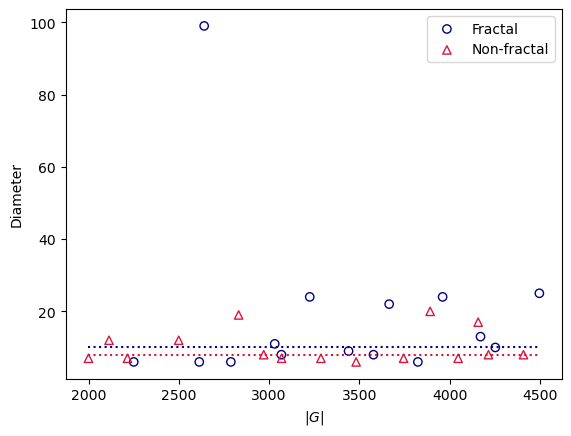

In [134]:
# Plot real networks
fn.plot_scatter_graph(fractal_real_diams, non_fractal_real_diams, fractal_real_Ns, non_fractal_real_Ns, "Diameter", save_path='../../Figures/Real Diameter')

**Average Shortest Path Length**

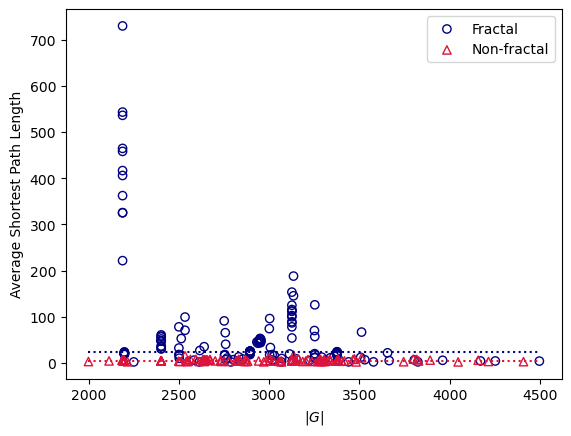

In [135]:
# Plot all
fn.plot_scatter_graph(fractal_ASPLs, non_fractal_ASPLs, fractal_Ns, non_fractal_Ns, "Average Shortest Path Length", save_path='../../Figures/Average Shortest Path Length')

Figure 4.12a shows the average shortest path length of the model networks. 

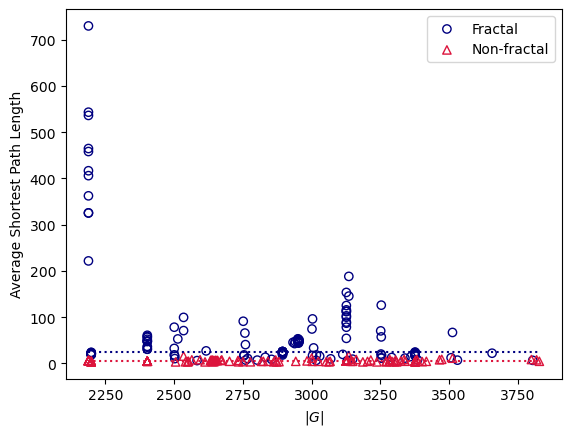

In [136]:
# Plot model networks
fn.plot_scatter_graph(fractal_model_ASPLs, non_fractal_model_ASPLs, fractal_model_Ns, non_fractal_model_Ns, "Average Shortest Path Length", save_path='../../Figures/Model Average Shortest Path Length')

Figure 4.12b shows the diameter of the real-world networks. 

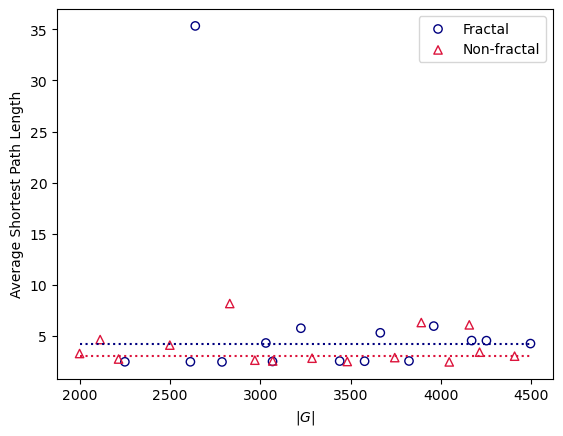

In [137]:
# Plot real networks
fn.plot_scatter_graph(fractal_real_ASPLs, non_fractal_real_ASPLs, fractal_real_Ns, non_fractal_real_Ns, "Average Shortest Path Length", save_path='../../Figures/Real Average Shortest Path Length')

<h2> 4.5 Connecting Theories on the Origins of Fractality

<h3> 4.5.1 Hub Repulsion and Network Distances

In Chapter 4.5.1 we discuss the correlation between the mean hub distance, network diameter and average shortest path length. 

In [59]:
model_fractal_mean_distances = []
real_fractal_mean_distances = []
model_non_fractal_mean_distances = []
real_non_fractal_mean_distances = []

model_fractal_diameters = []
real_fractal_diameters = []
model_non_fractal_diameters = []
real_non_fractal_diameters = []

model_fractal_ASPLs = []
real_fractal_ASPLs = []
model_non_fractal_ASPLs = []
real_non_fractal_ASPLs = []

# Model networks

for graph in fractal_model_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph)
    model_fractal_mean_distances.append(mean_distance)

    diam = graph.diameter()
    ASPL = graph.average_path_length()
    
    model_fractal_diameters.append(diam)
    model_fractal_ASPLs.append(ASPL)
    
for graph in non_fractal_model_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph)
    model_non_fractal_mean_distances.append(mean_distance)
    
    diam = graph.diameter()
    ASPL = graph.average_path_length()
    
    model_non_fractal_diameters.append(diam)
    model_non_fractal_ASPLs.append(ASPL)
    
# Real networks

for graph in fractal_real_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph)
    real_fractal_mean_distances.append(mean_distance)
    
    diam = graph.diameter()
    ASPL = graph.average_path_length()
    
    real_fractal_diameters.append(diam)
    real_fractal_ASPLs.append(ASPL)
    
for graph in non_fractal_real_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph)
    real_non_fractal_mean_distances.append(mean_distance)
    
    diam = graph.diameter()
    ASPL = graph.average_path_length()
    
    real_non_fractal_diameters.append(diam)
    real_non_fractal_ASPLs.append(ASPL)

C:\Users\hamil\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hamil\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


The following cell finds the Pearson correlation coefficients for the fractal model networks.

In [61]:
diam_series = pd.Series(model_fractal_diameters)
ASPL_series = pd.Series(model_fractal_ASPLs)

mean_hub_distance_series = pd.Series(model_fractal_mean_distances)

diam_corr = mean_hub_distance_series.corr(diam_series)
ASPL_corr = mean_hub_distance_series.corr(ASPL_series)

print("Correlation coefficient between mean hub distance and network diameter: {0}".format(diam_corr))
print("Correlation coefficient between mean hub distance and average shortest path length: {0}".format(ASPL_corr))

Correlation coefficient between mean hub distance and network diameter: 0.989977048554333
Correlation coefficient between mean hub distance and average shortest path length: 0.9950722582642978


The following cell finds the Pearson correlation coefficients for the non-fractal model networks.

In [63]:
diam_series = pd.Series(model_non_fractal_diameters)
ASPL_series = pd.Series(model_non_fractal_ASPLs)

mean_hub_distance_series = pd.Series(model_non_fractal_mean_distances)

diam_corr = mean_hub_distance_series.corr(diam_series)
ASPL_corr = mean_hub_distance_series.corr(ASPL_series)

print("Correlation coefficient between mean hub distance and network diameter: {0}".format(diam_corr))
print("Correlation coefficient between mean hub distance and average shortest path length: {0}".format(ASPL_corr))

Correlation coefficient between mean hub distance and network diameter: 0.8421944725138665
Correlation coefficient between mean hub distance and average shortest path length: 0.797963608082282


The following cell finds the Pearson correlation coefficients for the fractal real networks. 

In [64]:
diam_series = pd.Series(real_fractal_diameters)
ASPL_series = pd.Series(real_fractal_ASPLs)

mean_hub_distance_series = pd.Series(real_fractal_mean_distances)

diam_corr = mean_hub_distance_series.corr(diam_series)
ASPL_corr = mean_hub_distance_series.corr(ASPL_series)

print("Correlation coefficient between mean hub distance and network diameter: {0}".format(diam_corr))
print("Correlation coefficient between mean hub distance and average shortest path length: {0}".format(ASPL_corr))

Correlation coefficient between mean hub distance and network diameter: 0.7131563604936797
Correlation coefficient between mean hub distance and average shortest path length: 0.9554308975735849


The following cell finds the Pearson correlation coefficients for the non-fractal real networks. 

In [65]:
diam_series = pd.Series(real_non_fractal_diameters)
ASPL_series = pd.Series(real_non_fractal_ASPLs)

mean_hub_distance_series = pd.Series(real_non_fractal_mean_distances)

diam_corr = mean_hub_distance_series.corr(diam_series)
ASPL_corr = mean_hub_distance_series.corr(ASPL_series)

print("Correlation coefficient between mean hub distance and network diameter: {0}".format(diam_corr))
print("Correlation coefficient between mean hub distance and average shortest path length: {0}".format(ASPL_corr))

Correlation coefficient between mean hub distance and network diameter: 0.7421007712499238
Correlation coefficient between mean hub distance and average shortest path length: 0.868817532686699


The following cell finds the Pearson correlation coefficients for all the fractal networks, as seen in Table 4.10. 

In [66]:
fractal_diameters = []
fractal_diameters.extend(model_fractal_diameters)
fractal_diameters.extend(real_fractal_diameters)

fractal_ASPLs = []
fractal_ASPLs.extend(model_fractal_ASPLs)
fractal_ASPLs.extend(real_fractal_ASPLs)

fractal_mean_distances = []
fractal_mean_distances.extend(model_fractal_mean_distances)
fractal_mean_distances.extend(real_fractal_mean_distances)

diam_series = pd.Series(fractal_diameters)
ASPL_series = pd.Series(fractal_ASPLs)

mean_hub_distance_series = pd.Series(fractal_mean_distances)

diam_corr = mean_hub_distance_series.corr(diam_series)
ASPL_corr = mean_hub_distance_series.corr(ASPL_series)

print("Correlation coefficient between mean hub distance and network diameter: {0}".format(diam_corr))
print("Correlation coefficient between mean hub distance and average shortest path length: {0}".format(ASPL_corr))

Correlation coefficient between mean hub distance and network diameter: 0.9902385825279374
Correlation coefficient between mean hub distance and average shortest path length: 0.9952282341840968


The following cell finds the Pearson correlation coefficients for all the non-fractal networks, as seen in Table 4.10.

In [67]:
non_fractal_diameters = []
non_fractal_diameters.extend(model_non_fractal_diameters)
non_fractal_diameters.extend(real_non_fractal_diameters)

non_fractal_ASPLs = []
non_fractal_ASPLs.extend(model_non_fractal_ASPLs)
non_fractal_ASPLs.extend(real_non_fractal_ASPLs)

non_fractal_mean_distances = []
non_fractal_mean_distances.extend(model_non_fractal_mean_distances)
non_fractal_mean_distances.extend(real_non_fractal_mean_distances)
diam_series = pd.Series(non_fractal_diameters)
ASPL_series = pd.Series(non_fractal_ASPLs)

mean_hub_distance_series = pd.Series(non_fractal_mean_distances)

diam_corr = mean_hub_distance_series.corr(diam_series)
ASPL_corr = mean_hub_distance_series.corr(ASPL_series)

print("Correlation coefficient between mean hub distance and network diameter: {0}".format(diam_corr))
print("Correlation coefficient between mean hub distance and average shortest path length: {0}".format(ASPL_corr))

Correlation coefficient between mean hub distance and network diameter: 0.8086961627287383
Correlation coefficient between mean hub distance and average shortest path length: 0.8056618081931359


The following cell finds the Pearson correlation coefficients for all the model networks, as seen in Table 4.10. 

In [68]:
model_diameters = []
model_diameters.extend(model_fractal_diameters)
model_diameters.extend(model_non_fractal_diameters)

model_ASPLs = []
model_ASPLs.extend(model_fractal_ASPLs)
model_ASPLs.extend(model_non_fractal_ASPLs)

model_mean_distances = []
model_mean_distances.extend(model_fractal_mean_distances)
model_mean_distances.extend(model_non_fractal_mean_distances)

diam_series = pd.Series(model_diameters)
ASPL_series = pd.Series(model_ASPLs)

mean_hub_distance_series = pd.Series(model_mean_distances)

diam_corr = mean_hub_distance_series.corr(diam_series)
ASPL_corr = mean_hub_distance_series.corr(ASPL_series)

print("Correlation coefficient between mean hub distance and network diameter: {0}".format(diam_corr))
print("Correlation coefficient between mean hub distance and average shortest path length: {0}".format(ASPL_corr))

Correlation coefficient between mean hub distance and network diameter: 0.9913342927254103
Correlation coefficient between mean hub distance and average shortest path length: 0.9957300129235943


The following cell finds the Pearson correlation coefficients for all the real-world networks, as seen in Table 4.10. 

In [69]:
real_diameters = []
real_diameters.extend(real_fractal_diameters)
real_diameters.extend(real_non_fractal_diameters)

real_ASPLs = []
real_ASPLs.extend(real_fractal_ASPLs)
real_ASPLs.extend(real_non_fractal_ASPLs)

real_mean_distances = []
real_mean_distances.extend(real_fractal_mean_distances)
real_mean_distances.extend(real_non_fractal_mean_distances)

diam_series = pd.Series(real_diameters)
ASPL_series = pd.Series(real_ASPLs)

mean_hub_distance_series = pd.Series(real_mean_distances)

diam_corr = mean_hub_distance_series.corr(diam_series)
ASPL_corr = mean_hub_distance_series.corr(ASPL_series)

print("Correlation coefficient between mean hub distance and network diameter: {0}".format(diam_corr))
print("Correlation coefficient between mean hub distance and average shortest path length: {0}".format(ASPL_corr))

Correlation coefficient between mean hub distance and network diameter: 0.594244020848981
Correlation coefficient between mean hub distance and average shortest path length: 0.859313017058234


The following cell finds the Pearson correlation coefficients for all networks, as seen in Table 4.10. 

In [70]:
diameters = []
diameters.extend(model_diameters)
diameters.extend(real_diameters)

ASPLs = []
ASPLs.extend(model_ASPLs)
ASPLs.extend(real_ASPLs)

mean_distances = []
mean_distances.extend(model_mean_distances)
mean_distances.extend(real_mean_distances)

diam_series = pd.Series(diameters)
ASPL_series = pd.Series(ASPLs)

mean_hub_distance_series = pd.Series(mean_distances)

diam_corr = mean_hub_distance_series.corr(diam_series)
ASPL_corr = mean_hub_distance_series.corr(ASPL_series)

print("Correlation coefficient between mean hub distance and network diameter: {0}".format(diam_corr))
print("Correlation coefficient between mean hub distance and average shortest path length: {0}".format(ASPL_corr))

Correlation coefficient between mean hub distance and network diameter: 0.9914179939175548
Correlation coefficient between mean hub distance and average shortest path length: 0.9957815987267103


<h3> 4.5.2 Hub Repulsion and Degree-Betweenness Centrality Correlation

**Degree-Betweenness Centrality Correlation**

We consider the correlation between the degree and betweenness centrality of hubs and non-hubs independently.

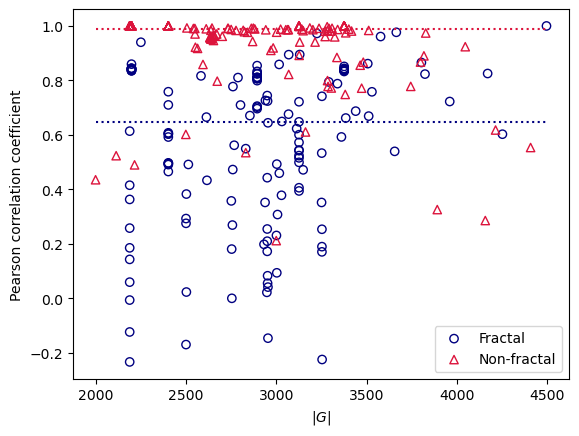

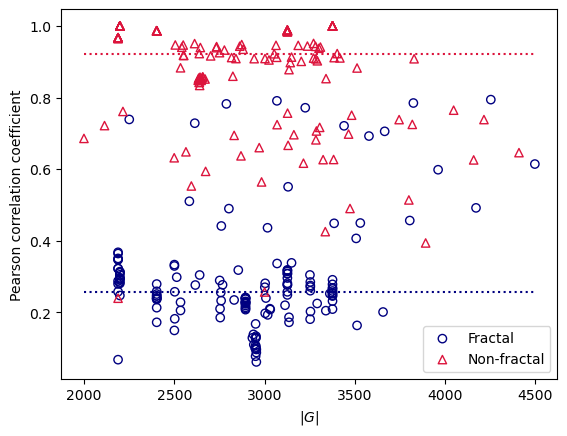

In [196]:
# Initialise lists for the fractal networks. 
fractal_hub_correlation = []
fractal_non_hub_correlation = []

# Initialise lists for the real fractal networks. 
fractal_real_hub_correlation = []
fractal_real_non_hub_correlation = []

# Initialise lists for the model fractal networks. 
fractal_model_hub_correlation = []
fractal_model_non_hub_correlation = []

# Iterate through all of the fractal networks.
for graph in fractal_model_graphs:
    # Find the degree-betweenness centrality correlation for hubs.
    hub_correlation = fn.calc_betweenness_degree_correlation_hubs(graph)
    # Find the degree-betweenness centrality correlation for non-hubs.
    non_hub_correlation = fn.calc_betweenness_degree_correlation_non_hubs(graph)
    
    # Add the correlation coefficients to the lists. 
    fractal_hub_correlation.append(hub_correlation)
    fractal_non_hub_correlation.append(non_hub_correlation)
    
    # Add the correlation coefficients to the lists. 
    fractal_model_hub_correlation.append(hub_correlation)
    fractal_model_non_hub_correlation.append(non_hub_correlation)

# Iterate through all of the fractal networks.
for graph in fractal_real_graphs:
    # Find the degree-betweenness centrality correlation for hubs.
    hub_correlation = fn.calc_betweenness_degree_correlation_hubs(graph)
    # Find the degree-betweenness centrality correlation for non-hubs.
    non_hub_correlation = fn.calc_betweenness_degree_correlation_non_hubs(graph)
    
    # Add the correlation coefficients to the lists. 
    fractal_hub_correlation.append(hub_correlation)
    fractal_non_hub_correlation.append(non_hub_correlation)
    
    # Add the correlation coefficients to the lists. 
    fractal_real_hub_correlation.append(hub_correlation)
    fractal_real_non_hub_correlation.append(non_hub_correlation)
        
# Initialise lists for the non-fractal networks. 
non_fractal_hub_correlation = []
non_fractal_non_hub_correlation = []

# Initialise lists for the real non-fractal networks. 
non_fractal_real_hub_correlation = []
non_fractal_real_non_hub_correlation = []

# Initialise lists for the model non-fractal networks. 
non_fractal_model_hub_correlation = []
non_fractal_model_non_hub_correlation = []

# Iterate through all of the fractal networks.
for graph in non_fractal_model_graphs:
    # Find the degree-betweenness centrality correlation for hubs.
    hub_correlation = fn.calc_betweenness_degree_correlation_hubs(graph)
    # Find the degree-betweenness centrality correlation for non-hubs.
    non_hub_correlation = fn.calc_betweenness_degree_correlation_non_hubs(graph)
    
    # Add the correlation coefficients to the lists. 
    non_fractal_hub_correlation.append(hub_correlation)
    non_fractal_non_hub_correlation.append(non_hub_correlation)
    
    # Add the correlation coefficients to the lists. 
    non_fractal_model_hub_correlation.append(hub_correlation)
    non_fractal_model_non_hub_correlation.append(non_hub_correlation)

# Iterate through all of the fractal networks.
for graph in non_fractal_real_graphs:
    # Find the degree-betweenness centrality correlation for hubs.
    hub_correlation = fn.calc_betweenness_degree_correlation_hubs(graph)
    # Find the degree-betweenness centrality correlation for non-hubs.
    non_hub_correlation = fn.calc_betweenness_degree_correlation_non_hubs(graph)
    
    # Add the correlation coefficients to the lists. 
    non_fractal_hub_correlation.append(hub_correlation)
    non_fractal_non_hub_correlation.append(non_hub_correlation)
    
    # Add the correlation coefficients to the lists. 
    non_fractal_real_hub_correlation.append(hub_correlation)
    non_fractal_real_non_hub_correlation.append(non_hub_correlation)
        
# Remove NaN values from the lists
clean_fractal_hub_Ns, fractal_hub_correlation = fn.clean_lists_of_NaNs(fractal_Ns, fractal_hub_correlation)
clean_fractal_non_hub_Ns, fractal_non_hub_correlation = fn.clean_lists_of_NaNs(fractal_Ns, fractal_non_hub_correlation)
clean_non_fractal_hub_Ns, non_fractal_hub_correlation = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_hub_correlation)
clean_non_fractal_non_hub_Ns, non_fractal_non_hub_correlation = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_non_hub_correlation)

fn.plot_scatter_graph(fractal_hub_correlation, non_fractal_hub_correlation, clean_fractal_hub_Ns, clean_non_fractal_hub_Ns, "Pearson correlation coefficient")
fn.plot_scatter_graph(fractal_non_hub_correlation, non_fractal_non_hub_correlation, clean_fractal_non_hub_Ns, clean_non_fractal_non_hub_Ns, "Pearson correlation coefficient")

Figure 4.13 shows the correlation between the degrees and betweenness centrality of hubs and non-hubs in model networks. 

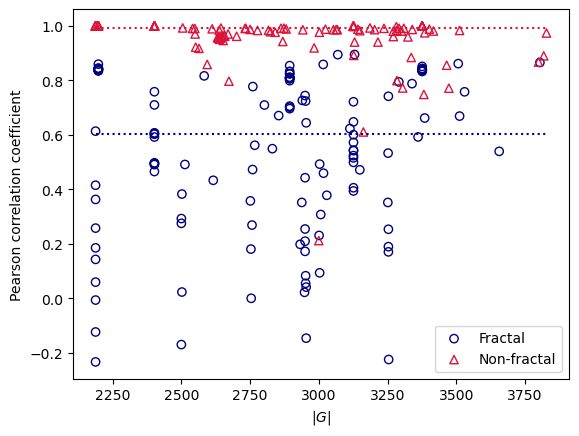

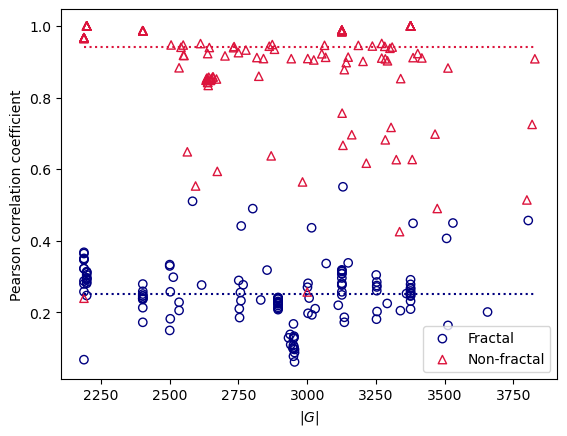

In [197]:
clean_fractal_model_hub_Ns, clean_fractal_model_hub_correlation = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_hub_correlation)
clean_fractal_model_non_hub_Ns, clean_fractal_model_non_hub_correlation = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_non_hub_correlation)
clean_non_fractal_model_hub_Ns, clean_non_fractal_model_hub_correlation = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_hub_correlation)
clean_non_fractal_model_non_hub_Ns, clean_non_fractal_model_non_hub_correlation = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_non_hub_correlation)

fn.plot_scatter_graph(clean_fractal_model_hub_correlation, clean_non_fractal_model_hub_correlation, clean_fractal_model_hub_Ns, clean_non_fractal_model_hub_Ns, "Pearson correlation coefficient", save_path='../../Figures/Model Degree Betweenness Correlation Hubs')
fn.plot_scatter_graph(clean_fractal_model_non_hub_correlation, clean_non_fractal_model_non_hub_correlation, clean_fractal_model_non_hub_Ns, clean_non_fractal_model_non_hub_Ns, "Pearson correlation coefficient", save_path='../../Figures/Model Degree Betweenness Correlation Non-Hubs')

**Standard Deviation and Maximum Betweenness Centrality of Non-Hubs**

In [218]:
# All networks

# Initialise lists for the fractal hub properties
fractal_max_hub_bc = []
fractal_min_hub_bc = []
fractal_mean_hub_bc = []
fractal_stdv_hub_bc = []
fractal_hub_no_of_high_bc_nodes = []
fractal_mean_max_hub_bc = []

# Initialise lists for the fractal non-hub properties
fractal_max_non_hub_bc = []
fractal_min_non_hub_bc = []
fractal_mean_non_hub_bc = []
fractal_stdv_non_hub_bc = []
fractal_non_hub_no_of_high_bc_nodes = []
fractal_mean_max_non_hub_bc = []

# Initialise lists for the non-fractal hub properties
non_fractal_max_hub_bc = []
non_fractal_min_hub_bc = []
non_fractal_mean_hub_bc = []
non_fractal_stdv_hub_bc = []
non_fractal_hub_no_of_high_bc_nodes = []
non_fractal_mean_max_hub_bc = []

# Initialise lists for the non-fractal non-hub properties
non_fractal_max_non_hub_bc = []
non_fractal_min_non_hub_bc = []
non_fractal_mean_non_hub_bc = []
non_fractal_stdv_non_hub_bc = []
non_fractal_non_hub_no_of_high_bc_nodes = []
non_fractal_mean_max_non_hub_bc = []

# Model networks

# Initialise lists for the fractal hub properties
fractal_model_max_hub_bc = []
fractal_model_min_hub_bc = []
fractal_model_mean_hub_bc = []
fractal_model_stdv_hub_bc = []
fractal_model_hub_no_of_high_bc_nodes = []
fractal_model_mean_max_hub_bc = []

# Initialise lists for the fractal non-hub properties
fractal_model_max_non_hub_bc = []
fractal_model_min_non_hub_bc = []
fractal_model_mean_non_hub_bc = []
fractal_model_stdv_non_hub_bc = []
fractal_model_non_hub_no_of_high_bc_nodes = []
fractal_model_mean_max_non_hub_bc = []

# Initialise lists for the non-fractal hub properties
non_fractal_model_max_hub_bc = []
non_fractal_model_min_hub_bc = []
non_fractal_model_mean_hub_bc = []
non_fractal_model_stdv_hub_bc = []
non_fractal_model_hub_no_of_high_bc_nodes = []
non_fractal_model_mean_max_hub_bc = []

# Initialise lists for the non-fractal non-hub properties
non_fractal_model_max_non_hub_bc = []
non_fractal_model_min_non_hub_bc = []
non_fractal_model_mean_non_hub_bc = []
non_fractal_model_stdv_non_hub_bc = []
non_fractal_model_non_hub_no_of_high_bc_nodes = []
non_fractal_model_mean_max_non_hub_bc = []

# Real networks

# Initialise lists for the fractal hub properties
fractal_real_max_hub_bc = []
fractal_real_min_hub_bc = []
fractal_real_mean_hub_bc = []
fractal_real_stdv_hub_bc = []
fractal_real_hub_no_of_high_bc_nodes = []
fractal_real_mean_max_hub_bc = []

# Initialise lists for the fractal non-hub properties
fractal_real_max_non_hub_bc = []
fractal_real_min_non_hub_bc = []
fractal_real_mean_non_hub_bc = []
fractal_real_stdv_non_hub_bc = []
fractal_real_non_hub_no_of_high_bc_nodes = []
fractal_real_mean_max_non_hub_bc = []

# Initialise lists for the non-fractal hub properties
non_fractal_real_max_hub_bc = []
non_fractal_real_min_hub_bc = []
non_fractal_real_mean_hub_bc = []
non_fractal_real_stdv_hub_bc = []
non_fractal_real_hub_no_of_high_bc_nodes = []
non_fractal_real_mean_max_hub_bc = []

# Initialise lists for the non-fractal non-hub properties
non_fractal_real_max_non_hub_bc = []
non_fractal_real_min_non_hub_bc = []
non_fractal_real_mean_non_hub_bc = []
non_fractal_real_stdv_non_hub_bc = []
non_fractal_real_non_hub_no_of_high_bc_nodes = []
non_fractal_real_mean_max_non_hub_bc = []

# Iterate through each of the fractal graphs
for graph in fractal_model_graphs:
    # Find the betweenness centralities of the hubs and non-hubs in the network
    hub_bcs, non_hub_bcs = fn.find_hub_betweenness(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_hub_bc, min_hub_bc, mean_hub_bc, stdv_hub_bc, hub_no_of_high_bc_nodes, mean_max_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=hub_bcs)
    # Find key properties of the non-hub betweenness centrality distribution
    max_non_hub_bc, min_non_hub_bc, mean_non_hub_bc, stdv_non_hub_bc, non_hub_no_of_high_bc_nodes, mean_max_non_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=non_hub_bcs)
    
    # Add the hub properties to their respective lists
    fractal_max_hub_bc.append(max_hub_bc)
    fractal_min_hub_bc.append(min_hub_bc)
    fractal_mean_hub_bc.append(mean_hub_bc)
    fractal_stdv_hub_bc.append(stdv_hub_bc)
    fractal_hub_no_of_high_bc_nodes.append(hub_no_of_high_bc_nodes)
    fractal_mean_max_hub_bc.append(mean_max_hub_bc)

    # Add the non-hub properties to their respective lists
    fractal_max_non_hub_bc.append(max_non_hub_bc)
    fractal_min_non_hub_bc.append(min_non_hub_bc)
    fractal_mean_non_hub_bc.append(mean_non_hub_bc)
    fractal_stdv_non_hub_bc.append(stdv_non_hub_bc)
    fractal_non_hub_no_of_high_bc_nodes.append(non_hub_no_of_high_bc_nodes)
    fractal_mean_max_non_hub_bc.append(mean_max_non_hub_bc)
    
    # Add the hub properties to their respective lists
    fractal_model_max_hub_bc.append(max_hub_bc)
    fractal_model_min_hub_bc.append(min_hub_bc)
    fractal_model_mean_hub_bc.append(mean_hub_bc)
    fractal_model_stdv_hub_bc.append(stdv_hub_bc)
    fractal_model_hub_no_of_high_bc_nodes.append(hub_no_of_high_bc_nodes)
    fractal_model_mean_max_hub_bc.append(mean_max_hub_bc)

    # Add the non-hub properties to their respective lists
    fractal_model_max_non_hub_bc.append(max_non_hub_bc)
    fractal_model_min_non_hub_bc.append(min_non_hub_bc)
    fractal_model_mean_non_hub_bc.append(mean_non_hub_bc)
    fractal_model_stdv_non_hub_bc.append(stdv_non_hub_bc)
    fractal_model_non_hub_no_of_high_bc_nodes.append(non_hub_no_of_high_bc_nodes)
    fractal_model_mean_max_non_hub_bc.append(mean_max_non_hub_bc)
    
# Iterate through each of the non-fractal graphs
for graph in non_fractal_model_graphs:
    # Find the betweenness centralities of the hubs and non-hubs in the network
    hub_bcs, non_hub_bcs = fn.find_hub_betweenness(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_hub_bc, min_hub_bc, mean_hub_bc, stdv_hub_bc, hub_no_of_high_bc_nodes, mean_max_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=hub_bcs)
    # Find key properties of the non-hub betweenness centrality distribution
    max_non_hub_bc, min_non_hub_bc, mean_non_hub_bc, stdv_non_hub_bc, non_hub_no_of_high_bc_nodes, mean_max_non_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=non_hub_bcs)
    
    # Add the hub properties to their respective lists
    non_fractal_max_hub_bc.append(max_hub_bc)
    non_fractal_min_hub_bc.append(min_hub_bc)
    non_fractal_mean_hub_bc.append(mean_hub_bc)
    non_fractal_stdv_hub_bc.append(stdv_hub_bc)
    non_fractal_hub_no_of_high_bc_nodes.append(hub_no_of_high_bc_nodes)
    non_fractal_mean_max_hub_bc.append(mean_max_hub_bc)

    # Add the non-hub properties to their respective lists
    non_fractal_max_non_hub_bc.append(max_non_hub_bc)
    non_fractal_min_non_hub_bc.append(min_non_hub_bc)
    non_fractal_mean_non_hub_bc.append(mean_non_hub_bc)
    non_fractal_stdv_non_hub_bc.append(stdv_non_hub_bc)
    non_fractal_non_hub_no_of_high_bc_nodes.append(non_hub_no_of_high_bc_nodes)
    non_fractal_mean_max_non_hub_bc.append(mean_max_non_hub_bc)
    
    # Add the hub properties to their respective lists
    non_fractal_model_max_hub_bc.append(max_hub_bc)
    non_fractal_model_min_hub_bc.append(min_hub_bc)
    non_fractal_model_mean_hub_bc.append(mean_hub_bc)
    non_fractal_model_stdv_hub_bc.append(stdv_hub_bc)
    non_fractal_model_hub_no_of_high_bc_nodes.append(hub_no_of_high_bc_nodes)
    non_fractal_model_mean_max_hub_bc.append(mean_max_hub_bc)

    # Add the non-hub properties to their respective lists
    non_fractal_model_max_non_hub_bc.append(max_non_hub_bc)
    non_fractal_model_min_non_hub_bc.append(min_non_hub_bc)
    non_fractal_model_mean_non_hub_bc.append(mean_non_hub_bc)
    non_fractal_model_stdv_non_hub_bc.append(stdv_non_hub_bc)
    non_fractal_model_non_hub_no_of_high_bc_nodes.append(non_hub_no_of_high_bc_nodes)
    non_fractal_model_mean_max_non_hub_bc.append(mean_max_non_hub_bc)
    
    

# Iterate through each of the fractal graphs
for graph in fractal_real_graphs:
    # Find the betweenness centralities of the hubs and non-hubs in the network
    hub_bcs, non_hub_bcs = fn.find_hub_betweenness(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_hub_bc, min_hub_bc, mean_hub_bc, stdv_hub_bc, hub_no_of_high_bc_nodes, mean_max_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=hub_bcs)
    # Find key properties of the non-hub betweenness centrality distribution
    max_non_hub_bc, min_non_hub_bc, mean_non_hub_bc, stdv_non_hub_bc, non_hub_no_of_high_bc_nodes, mean_max_non_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=non_hub_bcs)
    
    # Add the hub properties to their respective lists
    fractal_max_hub_bc.append(max_hub_bc)
    fractal_min_hub_bc.append(min_hub_bc)
    fractal_mean_hub_bc.append(mean_hub_bc)
    fractal_stdv_hub_bc.append(stdv_hub_bc)
    fractal_hub_no_of_high_bc_nodes.append(hub_no_of_high_bc_nodes)
    fractal_mean_max_hub_bc.append(mean_max_hub_bc)

    # Add the non-hub properties to their respective lists
    fractal_max_non_hub_bc.append(max_non_hub_bc)
    fractal_min_non_hub_bc.append(min_non_hub_bc)
    fractal_mean_non_hub_bc.append(mean_non_hub_bc)
    fractal_stdv_non_hub_bc.append(stdv_non_hub_bc)
    fractal_non_hub_no_of_high_bc_nodes.append(non_hub_no_of_high_bc_nodes)
    fractal_mean_max_non_hub_bc.append(mean_max_non_hub_bc)
    
    # Add the hub properties to their respective lists
    fractal_real_max_hub_bc.append(max_hub_bc)
    fractal_real_min_hub_bc.append(min_hub_bc)
    fractal_real_mean_hub_bc.append(mean_hub_bc)
    fractal_real_stdv_hub_bc.append(stdv_hub_bc)
    fractal_real_hub_no_of_high_bc_nodes.append(hub_no_of_high_bc_nodes)
    fractal_real_mean_max_hub_bc.append(mean_max_hub_bc)

    # Add the non-hub properties to their respective lists
    fractal_real_max_non_hub_bc.append(max_non_hub_bc)
    fractal_real_min_non_hub_bc.append(min_non_hub_bc)
    fractal_real_mean_non_hub_bc.append(mean_non_hub_bc)
    fractal_real_stdv_non_hub_bc.append(stdv_non_hub_bc)
    fractal_real_non_hub_no_of_high_bc_nodes.append(non_hub_no_of_high_bc_nodes)
    fractal_real_mean_max_non_hub_bc.append(mean_max_non_hub_bc)
    
# Iterate through each of the non-fractal graphs
for graph in non_fractal_real_graphs:
    # Find the betweenness centralities of the hubs and non-hubs in the network
    hub_bcs, non_hub_bcs = fn.find_hub_betweenness(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_hub_bc, min_hub_bc, mean_hub_bc, stdv_hub_bc, hub_no_of_high_bc_nodes, mean_max_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=hub_bcs)
    # Find key properties of the non-hub betweenness centrality distribution
    max_non_hub_bc, min_non_hub_bc, mean_non_hub_bc, stdv_non_hub_bc, non_hub_no_of_high_bc_nodes, mean_max_non_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=non_hub_bcs)
    
    # Add the hub properties to their respective lists
    non_fractal_max_hub_bc.append(max_hub_bc)
    non_fractal_min_hub_bc.append(min_hub_bc)
    non_fractal_mean_hub_bc.append(mean_hub_bc)
    non_fractal_stdv_hub_bc.append(stdv_hub_bc)
    non_fractal_hub_no_of_high_bc_nodes.append(hub_no_of_high_bc_nodes)
    non_fractal_mean_max_hub_bc.append(mean_max_hub_bc)

    # Add the non-hub properties to their respective lists
    non_fractal_max_non_hub_bc.append(max_non_hub_bc)
    non_fractal_min_non_hub_bc.append(min_non_hub_bc)
    non_fractal_mean_non_hub_bc.append(mean_non_hub_bc)
    non_fractal_stdv_non_hub_bc.append(stdv_non_hub_bc)
    non_fractal_non_hub_no_of_high_bc_nodes.append(non_hub_no_of_high_bc_nodes)
    non_fractal_mean_max_non_hub_bc.append(mean_max_non_hub_bc)
    
    # Add the hub properties to their respective lists
    non_fractal_real_max_hub_bc.append(max_hub_bc)
    non_fractal_real_min_hub_bc.append(min_hub_bc)
    non_fractal_real_mean_hub_bc.append(mean_hub_bc)
    non_fractal_real_stdv_hub_bc.append(stdv_hub_bc)
    non_fractal_real_hub_no_of_high_bc_nodes.append(hub_no_of_high_bc_nodes)
    non_fractal_real_mean_max_hub_bc.append(mean_max_hub_bc)

    # Add the non-hub properties to their respective lists
    non_fractal_real_max_non_hub_bc.append(max_non_hub_bc)
    non_fractal_real_min_non_hub_bc.append(min_non_hub_bc)
    non_fractal_real_mean_non_hub_bc.append(mean_non_hub_bc)
    non_fractal_real_stdv_non_hub_bc.append(stdv_non_hub_bc)
    non_fractal_real_non_hub_no_of_high_bc_nodes.append(non_hub_no_of_high_bc_nodes)
    non_fractal_real_mean_max_non_hub_bc.append(mean_max_non_hub_bc)

**Standard Deviation**

Figure 4.14a shows the standard deviation of the betweenness centrality of hubs in the model network data. 

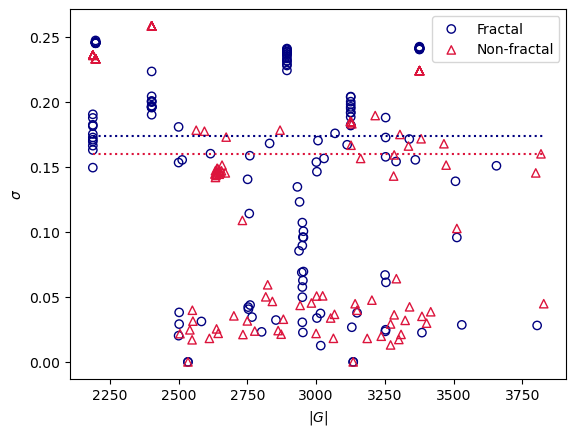

In [221]:
clean_fractal_Ns, clean_fractal_model_hub_stdv = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_stdv_hub_bc)
clean_non_fractal_Ns, clean_non_fractal_model_hub_stdv = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_stdv_hub_bc)
fn.plot_scatter_graph(clean_fractal_model_hub_stdv, clean_non_fractal_model_hub_stdv, clean_fractal_Ns, clean_non_fractal_Ns, "$\sigma$", save_path="../../Figures/Model Standard Deviation BC Hubs")

Figure 4.14b shows the standard deviation of the betweenness centrality of non-hubs in the model network data. 

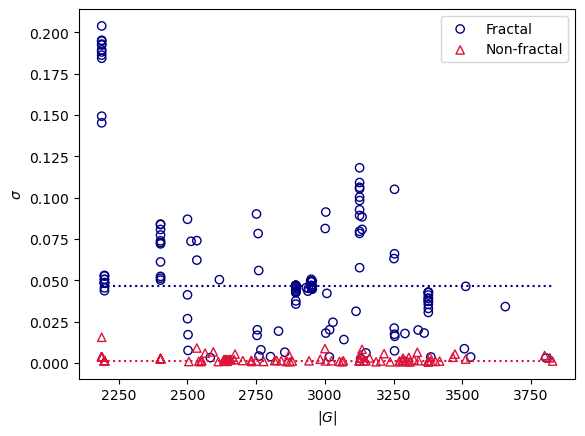

In [222]:
clean_fractal_Ns, clean_fractal_model_non_hub_stdv = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_stdv_non_hub_bc)
clean_non_fractal_Ns, clean_non_fractal_model_non_hub_stdv = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_stdv_non_hub_bc)
fn.plot_scatter_graph(clean_fractal_model_non_hub_stdv, clean_non_fractal_model_non_hub_stdv, clean_fractal_Ns, clean_non_fractal_Ns, "$\sigma$", save_path="../../Figures/Model Standard Deviation BC Non-Hubs")

**Maximum Betweenness Centrality**

Figure 4.15a shows the maximum betweenness centrality of non-hubs in the model network data. 

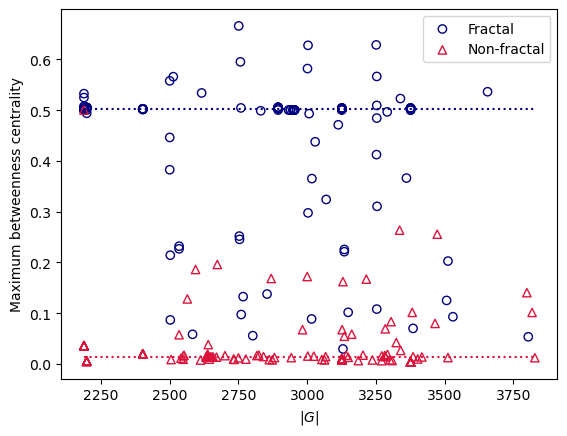

In [237]:
clean_fractal_Ns, clean_fractal_model_non_hub_max = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_max_non_hub_bc)
clean_non_fractal_Ns, clean_non_fractal_model_non_hub_max = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_max_non_hub_bc)
fn.plot_scatter_graph(clean_fractal_model_non_hub_max, clean_non_fractal_model_non_hub_max, clean_fractal_Ns, clean_non_fractal_Ns, "Maximum betweenness centrality", save_path="../../Figures/Model Maximum BC of Non-Hubs")

Figure 4.15b shows the mean betweenness centrality of the maximum 10% non-hubs in the model network data. 

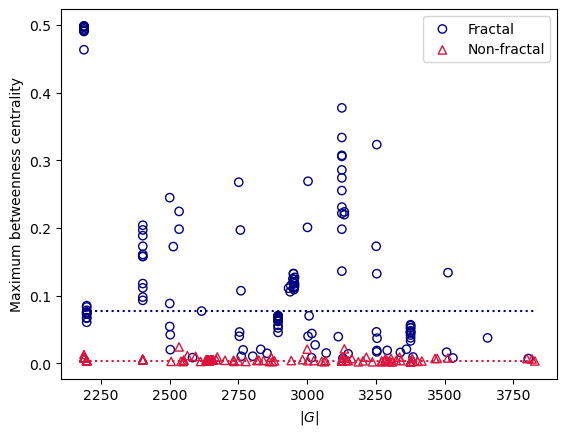

In [242]:
clean_fractal_Ns, clean_fractal_model_non_hub_mean_max = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_mean_max_non_hub_bc)
clean_non_fractal_Ns, clean_non_fractal_model_non_hub_mean_max = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_mean_max_non_hub_bc)
fn.plot_scatter_graph(clean_fractal_model_non_hub_mean_max, clean_non_fractal_model_non_hub_mean_max, clean_fractal_Ns, clean_non_fractal_Ns, "Maximum betweenness centrality", save_path="../../Figures/Model Mean Max Betweenness Centrality of Non-Hubs")

**Correlation between Hub Repulsion and Node Betweenness Centrality**

Figure 4.16 shows the relationship between hub repulsion in the model networks and properties of the node betweenness centrality distribution.

In [94]:
fractal_mean_hub_distances = []
non_fractal_mean_hub_distances = []

fractal_rs = []
non_fractal_rs = []

fractal_mean_max_non_hub_BCs = []
non_fractal_mean_max_non_hub_BCs = []

fractal_stdv_non_hub_BCs = []
non_fractal_stdv_non_hub_BCs = []

for graph in fractal_model_graphs:
    
    mean_distance, _ = fn.mean_hub_distance(graph)
    fractal_mean_hub_distances.append(mean_distance)
    
    _, non_hub_bcs = fn.find_hub_betweenness(graph)
    _, _, _, stdv_non_hub_bc, _, mean_max_non_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=non_hub_bcs)
    
    fractal_mean_max_non_hub_BCs.append(mean_max_non_hub_bc)
    fractal_stdv_non_hub_BCs.append(stdv_non_hub_bc)

    r = fn.calc_betweenness_degree_correlation(graph)
    fractal_rs.append(r)
    
for graph in non_fractal_model_graphs:
    
    mean_distance, _ = fn.mean_hub_distance(graph)
    non_fractal_mean_hub_distances.append(mean_distance)
    
    _, non_hub_bcs = fn.find_hub_betweenness(graph)
    _, _, _, stdv_non_hub_bc, _, mean_max_non_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=non_hub_bcs)

    non_fractal_mean_max_non_hub_BCs.append(mean_max_non_hub_bc)
    non_fractal_stdv_non_hub_BCs.append(stdv_non_hub_bc)

    r = fn.calc_betweenness_degree_correlation(graph)
    non_fractal_rs.append(r)
    

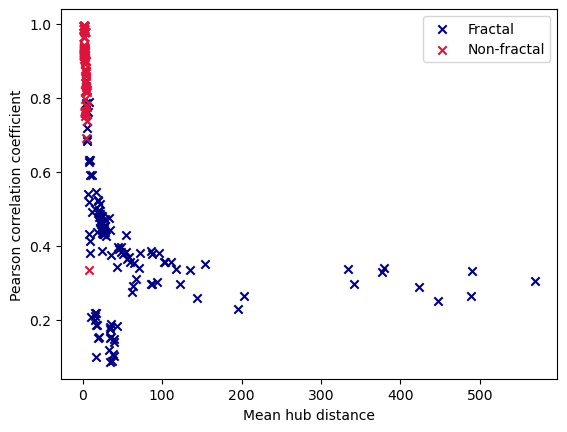

In [95]:
# Degree-Betweenness Centrality Correlation
plt.scatter(fractal_mean_hub_distances, fractal_rs, marker="x", facecolors='navy', label='Fractal')
plt.scatter(non_fractal_mean_hub_distances, non_fractal_rs, marker="x", facecolors='crimson',
            label="Non-fractal")
plt.xlabel('Mean hub distance')
plt.ylabel('Pearson correlation coefficient')
plt.legend()
plt.savefig('../../Figures/Mean Hub Distance against Degree Betweenness Correlation')
plt.show()

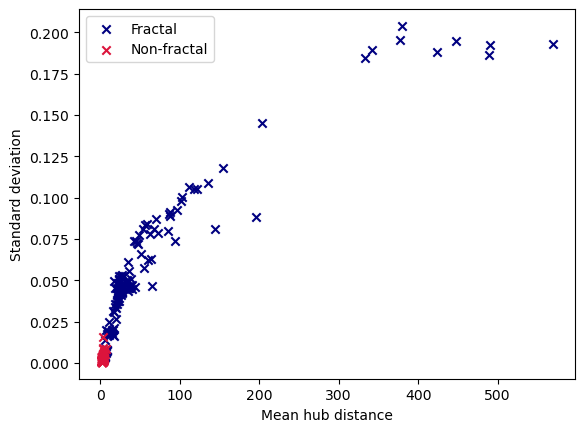

In [96]:
# Standard deviation betweenness centrality of non-hubs
plt.scatter(fractal_mean_hub_distances, fractal_stdv_non_hub_BCs, marker="x", facecolors='navy', label='Fractal')
plt.scatter(non_fractal_mean_hub_distances, non_fractal_stdv_non_hub_BCs, marker="x", facecolors='crimson',
            label="Non-fractal")
plt.xlabel('Mean hub distance')
plt.ylabel('Standard deviation')
plt.legend()
plt.savefig('../../Figures/Mean Hub Distance against Standard Deviation Non-Hub BC')
plt.show()

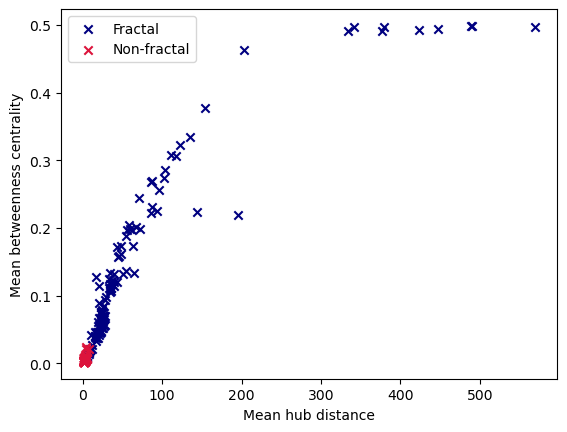

In [97]:
# Mean maximum betweenness centrality of non-hubs
plt.scatter(fractal_mean_hub_distances, fractal_mean_max_non_hub_BCs, marker="x", facecolors='navy', label='Fractal')
plt.scatter(non_fractal_mean_hub_distances, non_fractal_mean_max_non_hub_BCs, marker="x", facecolors='crimson',
            label="Non-fractal")
plt.xlabel('Mean hub distance')
plt.ylabel('Mean betweenness centrality')
plt.legend()
plt.savefig('../../Figures/Mean Hub Distance against Mean Max Non-Hub BC')
plt.show()

<h3> 4.5.3 Hub Repulsion and Edge Betweenness Centrality

Calculating the edges on the paths between hubs is expensive, and so we split the function into multiple subfunctions. 

**Fractal Model Networks**

Fractal SHM networks.

In [16]:
fractal_SHM_hub_path_BC = []
fractal_SHM_other_BC = []

for graph in fractal_SHM_graphs:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    fractal_SHM_hub_path_BC.append(mean_hub_path_BC)
    fractal_SHM_other_BC.append(mean_other_BC)

Fractal HADG networks.

In [ ]:
fractal_HADG_hub_path_BC = []
fractal_HADG_other_BC = []

for graph in fractal_HADG_graphs:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    fractal_HADG_hub_path_BC.append(mean_hub_path_BC)
    fractal_HADG_other_BC.append(mean_other_BC)

Fractal $(u,v)$-flowers.

In [14]:
fractal_flowers_hub_path_BC = []
fractal_flowers_other_BC = []

for graph in fractal_flowers:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    fractal_flowers_hub_path_BC.append(mean_hub_path_BC)
    fractal_flowers_other_BC.append(mean_other_BC)

Fractal Nested Barabási-Albert networks

In [30]:
fractal_nested_BA_hub_path_BC = []
fractal_nested_BA_other_BC = []

for graph in fractal_nested_BA_graphs:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    fractal_nested_BA_hub_path_BC.append(mean_hub_path_BC)
    fractal_nested_BA_other_BC.append(mean_other_BC)

**Non-Fractal Model Networks**

Non-Fractal SHM networks.

In [24]:
non_fractal_SHM_hub_path_BC = []
non_fractal_SHM_other_BC = []

for graph in non_fractal_SHM_graphs:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    non_fractal_SHM_hub_path_BC.append(mean_hub_path_BC)
    non_fractal_SHM_other_BC.append(mean_other_BC)

Non-fractal HADG networks.

In [ ]:
non_fractal_HADG_hub_path_BC = []
non_fractal_HADG_other_BC = []

for graph in non_fractal_HADG_graphs:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    non_fractal_HADG_hub_path_BC.append(mean_hub_path_BC)
    non_fractal_HADG_other_BC.append(mean_other_BC)

In [ ]:
non_fractal_HADG_hub_path_BC = []
non_fractal_HADG_other_BC = []

for graph in non_fractal_HADG_graphs:

    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    non_fractal_HADG_hub_path_BC.append(mean_hub_path_BC)
    non_fractal_HADG_other_BC.append(mean_other_BC)

Non-fractal $(u,v)$-flowers.

In [16]:
non_fractal_flowers_hub_path_BC = []
non_fractal_flowers_other_BC = []

for graph in non_fractal_flowers:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    non_fractal_flowers_hub_path_BC.append(mean_hub_path_BC)
    non_fractal_flowers_other_BC.append(mean_other_BC)

Non-fractal Nested Barabási-Albert networks

In [58]:
non_fractal_nested_BA_hub_path_BC = []
non_fractal_nested_BA_other_BC = []

for graph in non_fractal_nested_BA_graphs:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    non_fractal_nested_BA_hub_path_BC.append(mean_hub_path_BC)
    non_fractal_nested_BA_other_BC.append(mean_other_BC)

Non-fractal Barabási-Albert networks

In [92]:
non_fractal_BA_hub_path_BC = []
non_fractal_BA_other_BC = []

for graph in BA_graphs:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    non_fractal_BA_hub_path_BC.append(mean_hub_path_BC)
    non_fractal_BA_other_BC.append(mean_other_BC)

**Fractal Real Networks**

In [113]:
fractal_real_hub_path_BC = []
fractal_real_other_BC = []

for graph in fractal_real_graphs:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    fractal_real_hub_path_BC.append(mean_hub_path_BC)
    fractal_real_other_BC.append(mean_other_BC)

C:\Users\hamil\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hamil\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


**Non-Fractal Real Networks**

In [128]:
non_fractal_real_hub_path_BC = []
non_fractal_real_other_BC = []

for graph in non_fractal_real_graphs:
        
    ebcs = fn.find_edge_betweenness_centralities(graph)
    
    edges = [e.index for e in graph.es()]
    hub_path_edges = fn.find_hub_hub_path_edges(graph)
    
    hub_path_edges_BC = [ebcs[i] for i in hub_path_edges]
    other_edges_BC = [ebcs[i] for i in edges if i not in hub_path_edges]
    
    mean_hub_path_BC = np.mean(hub_path_edges_BC)
    mean_other_BC = np.mean(other_edges_BC)
    
    non_fractal_real_hub_path_BC.append(mean_hub_path_BC)
    non_fractal_real_other_BC.append(mean_other_BC)

**All Results**

The above calculations can be slow, and so the precalculated values are given here. 

The following cells collate the values for the fractal model graphs.

In [12]:
fractal_SHM_hub_path_BC = [0.33944169473282726, 0.3398451317908829, 0.33701156561907886, 0.24075618878030577, 0.38239366068053826, 0.30876970185717145, 0.3095144161705491, 0.3527684303520412, 0.32926685365298203, 0.3369759889384328, np.nan, 0.24628370113242248, 0.19654979589987295, 0.23196163622962288, 0.16426273171486225, 0.2395952558698804, 0.24663271187689983, 0.20956517784263376, 0.2377540889479469, 0.16813231358180705, 0.23832039662040655, 0.21856122840690978, 0.2627242904093432, 0.178319547937316, 0.244793940850894, 0.28467834566493844, 0.22178738334060413, 0.287795935612199, 0.2653481045410405, 0.28891640259903517, 0.2804858940693519, 0.2537015672999495, 0.2781594957138661, 0.1643439045084184, 0.1933587291376103, 0.1874336581359103, 0.1797268758034597, 0.18753501116330087, 0.14817077290893182, 0.1800040142104741, 0.1758084040147885, 0.17010792246226694, 0.1701273266564835, 0.1707902896234408, 0.14578301208001052, 0.13651313425358902, 0.16069804751606623, 0.14105250016814883, 0.13838028166516847, 0.15028678404347062, 0.1713931620215372, 0.14193925727890977, 0.15233082595175612, 0.1561381304430153, 0.15059563512960036]
fractal_HADG_hub_path_BC =  [0.15717084623566835, 0.15235487328128883, 0.1567147524197774, 0.15063100699696436, 0.1563808071863285, 0.15757145217726135, 0.146918517137133, 0.14416337710701801, 0.15694334547764088, 0.1447036259328029, 0.15543326991890613, 0.15468463312495678, 0.15239880890072155, 0.1468350083885033, 0.13904149572675772, 0.09165133299313895, 0.06677225075134341, 0.14337535819040204, np.nan, 0.026604191248125162, 0.0847584693556591, 0.059147341889428134, 0.11755322885418572, 0.04298365052457384, np.nan, 0.044415552927831795, 0.0472423986576142, np.nan, np.nan, 0.04048274361191258]
fractal_flowers_hub_path_BC = [0.21893129739068773, 0.2239330410605803, 0.10233692710708628, 0.22879970147015544, 0.2231368194421968]
fractal_nested_BA_hub_path_BC = [0.2020365879385424, 0.15638216053544707, 0.1780622042293531, 0.1778242534809199, 0.11795322964845655, 0.15962788357149632, 0.12900592898603233, 0.15173032326373204, 0.14493190835313852, 0.17927444214683286, 0.1446495306622181, 0.17012995896540625, 0.11129446657820276, 0.14933301028530535, 0.13396603567734916, 0.2079177574885151, 0.08675551221229011, 0.06259189397761085, 0.1239324680924189, 0.17729649044336948, 0.10188982827372454, 0.2268273766783164, 0.09318543904940073, 0.00221794035306275, 0.020213599136555724, 0.0059431548119326634, 0.002731815151263429, 0.02243706439019327, 0.0024941803044832784, 0.014215899041533607, 0.0052075905962820955, 0.0040221999650126685, 0.020258350768720297, 0.003192757569457956, 0.014334959422371648, 0.003923329950518273, 0.017082974648577144, 0.0027753863512790158, 0.002033101191285411, 0.014386205957112558, 0.005306415645191914, 0.0024644809930061376, 0.018427132455409126, 0.0023710478965116894]

In [14]:
fractal_model_hub_path_BC = fractal_SHM_hub_path_BC + fractal_HADG_hub_path_BC + fractal_flowers_hub_path_BC + fractal_nested_BA_hub_path_BC

In [16]:
fractal_SHM_other_BC = [0.00667641739873905, 0.012196109559198445, 0.015039429362272047, 0.018856089628452068, 0.01899947991761926, 0.013308073016256286, 0.010791483651800321, 0.008927127724818318, 0.006552945539636882, 0.026758164867830222, 0.333638164913885, 0.003076867058499829, 0.003231440924185646, 0.002744088891770228, 0.003285912390223067, 0.0027473567540161987, 0.0032512615283807815, 0.003059846863443594, 0.0037865620212214584, 0.003100075467750395, 0.003547280889516643, 0.002434731742985102, 0.0031490158467677204, 0.0031437510007146494, 0.003395659385488172, 0.003120266664632911, 0.003399115472746486, 0.003366326971111717, 0.003353963171588426, 0.003535460575594735, 0.0035801594417879247, 0.0034310398699403974, 0.0037470378271184037, 0.001805611170711632, 0.0018212091424836248, 0.0018340076533895696, 0.0017970086371695865, 0.0018220474421243278, 0.0018993441916633892, 0.0019111342856721434, 0.0018647195903514393, 0.001844587250619146, 0.001875742019299387, 0.0019302626668925246, 0.001210936074886335, 0.0012193848808958723, 0.0011917232850644592, 0.001174734324084333, 0.0012137219362074547, 0.0012421508037272872, 0.0012536239945799296, 0.001260326668651492, 0.0012590145306403035, 0.001239456575969895, 0.0012819125075575837]
fractal_HADG_other_BC =  [0.0013452793059145834, 0.0013436410505559466, 0.0013429643081328355, 0.0013265052622635346, 0.0013435017552841852, 0.0013454031568944484, 0.0013410502063912573, 0.0013633109865236607, 0.0013571956535984202, 0.0013485177902191343, 0.0012840109451663412, 0.0013061518938158952, 0.0012903978004621662, 0.001347100059187584, 0.0012878901682470988, 0.0059688003605092325, 0.0046704032926345495, 0.0053291951035427, np.nan, 0.00832368436679784, 0.005148603743137519, 0.0028854909876707057, 0.003929066342746435, 0.0018506249251192186, np.nan, 0.0015212764698704143, 0.0021369595147141263, np.nan, np.nan, 0.0019279204588163522]
fractal_flowers_other_BC = [0.010332006134449167, 0.008842919723596937, 0.002285992251558845, 0.00782185130910553, 0.00884624716956024]
fractal_nested_BA_other_BC = [0.00415041206736591, 0.004105482805106742, 0.002171491910411173, 0.004995691345471145, 0.0018341796558187862, 0.003286462988029714, 0.0015388305249996474, 0.0028082538968968855, 0.0016696957383790774, 0.004420464385146585, 0.0019759956454115622, 0.0031583070335336116, 0.0016858283311071043, 0.0024105000561645256, 0.001407448321922496, 0.004797736113962644, 0.0015251318277075528, 0.0015747076417599853, 0.0032751467573224496, 0.002466974555942294, 0.0014850129012840619, 0.004571513775255783, 0.0014516377303391505, 0.0005924831968519472, 0.0018442046968418808, 0.001042422328658089, 0.0006229615354875701, 0.0018673225549165967, 0.000698733925606945, 0.0012133372826223028, 0.0009431713477005018, 0.0007202895183400024, 0.0015927127946014274, 0.000719946456954801, 0.0011626739135210768, 0.0007704001556320419, 0.0012028912687800418, 0.0006287916565714642, 0.0004329156271541721, 0.0010983634237037956, 0.0007838177393706642, 0.0005602388858179333, 0.0010925925554943912, 0.0005395131743339165]

In [18]:
fractal_model_other_BC = fractal_SHM_other_BC + fractal_HADG_other_BC + fractal_flowers_other_BC + fractal_nested_BA_other_BC

The following cells collate the values for the non-fractal model graphs.

In [21]:
non_fractal_SHM_hub_path_BC = [0.1876143640876076, 0.1876143640876076, 0.1876143640876076, 0.1876143640876076, 0.24445324438553498, 0.1876143640876076, 0.1876143640876076, 0.1876143640876076, 0.1876143640876076, 0.1876143640876076, 0.1876143640876076, 0.08045430582213692, 0.08045430582213692, 0.08045430582213692, 0.08045430582213692, 0.08045430582213692, 0.08045430582213692, 0.08045430582213692, 0.08045430582213692, 0.08045430582213692, 0.08045430582213692, 0.08045430582213692, 0.18547052799607153, 0.18547052799607153, 0.18547052799607153, 0.18547052799607153, 0.18547052799607153, 0.18547052799607153, 0.18547052799607153, 0.18547052799607153, 0.18547052799607153, 0.18547052799607153, 0.18547052799607153, 0.1071429606838343, 0.1071429606838343, 0.1071429606838343, 0.1071429606838343, 0.1071429606838343, 0.1071429606838343, 0.1071429606838343, 0.1071429606838343, 0.1071429606838343, 0.1071429606838343, 0.1071429606838343, 0.09375004388274531, 0.09375004388274531, 0.09375004388274531, 0.09375004388274531, 0.09375004388274531, 0.09375004388274531, 0.09375004388274531, 0.09375004388274531, 0.09375004388274531, 0.09375004388274531, 0.09375004388274531]
non_fractal_HADG_hub_path_BC =  [0.04486444701754999, 0.04421841550179066, 0.044408456831811646, 0.045294911696931714, 0.04504951774834977, 0.04372099383948662, 0.044319063067417154, 0.04081329938744421, 0.04362407178651315, 0.04634876986464661, 0.041247708312846514, 0.04962043201151085, 0.04285728711299904, 0.047374737218847614, 0.04765081391970526]
non_fractal_flowers_hub_path_BC = [0.04195030374606864, 0.04025154402539705, 0.24390760881048165, 0.0732112647620462, 0.24365999022231172]
non_fractal_nested_BA_hub_path_BC = [0.07910962066289451, 0.09091442885833273, 0.07816304066105344, 0.0709490575930859, 0.06954673216028096, 0.08491168324304842, 0.07969636677393224, 0.09263884002000555, 0.07528486817285189, 0.0014836463638163266, 0.001808893218339347, 0.001962174667465437, 0.0015575036848521173, 0.0022357804696245326, 0.0015393327332212745, 0.0015167914781463252, 0.001436220404282836, 0.005833043313794615, 0.0013453600145500201, 0.0014393571435726163]
non_fractal_BA_hub_path_BC = [0.08709142081687031, 0.09584670225747367, 0.08424670364013831, 0.07689389943861183, 0.0774670830391531, 0.07694248743841547, 0.07436462895905785, 0.0018357037386507798, 0.0016160878849050466, 0.0015317198680487854, 0.0014614311601029517, 0.0016810737513579016, 0.001508610923558295, 0.0013767726034144203, 0.0015227660573602247, 0.0012947445799713789, 0.0016268485425572385, 0.0013369273468213118, 0.0012939687893330147, 0.0008590016739122717, 0.000880457646776121, 0.0009146916053035145, 0.0007524663971115044, 0.000712530543818754, 0.0005894725078089989, 0.0007079021568434543, 0.0005781745578340085, 0.0005651661756765847, 0.0005832156784641862, 0.0005211401751173192, 0.0005140450832748042, 0.0005458180889734874, 0.0004711113340019638, 0.0004781182071837162, 0.00041829558496525056, 0.00039648117892624916, 0.00038027864104464646, 0.0003533055494943722, 0.0003816768247654139]

In [23]:
non_fractal_model_hub_path_BC = non_fractal_SHM_hub_path_BC + non_fractal_HADG_hub_path_BC + non_fractal_flowers_hub_path_BC + non_fractal_nested_BA_hub_path_BC + non_fractal_BA_hub_path_BC

In [25]:
non_fractal_SHM_other_BC = [0.0019884357388999583, 0.001981781782292133, 0.001981785236500443, 0.0019868111095914897, 0.001986115637978094, 0.0019792740270590746, 0.0019784358058425153, 0.0019892739601165177, 0.0019784358058425153, 0.0019784358058425153, 0.0019784358058425153, 0.001093439729222133, 0.0010967197077580337, 0.001093439729222133, 0.0010975443254287662, 0.0010926151115514006, 0.0010975443254287662, 0.0010967197077580335, 0.0010926151115514006, 0.0010934397292221329, 0.0010926151115514006, 0.0010926151115514006, 0.0014879080008519134, 0.0014858249514372735, 0.0014858249514372735, 0.0014858249514372735, 0.0014858249514372735, 0.0014858249514372735, 0.0014858249514372735, 0.0014858249514372735, 0.0014858249514372735, 0.0014858249514372735, 0.0014858249514372735, 0.001298640518803012, 0.001298640518803012, 0.001298640518803012, 0.001298640518803012, 0.001298640518803012, 0.001298640518803012, 0.001298640518803012, 0.001298640518803012, 0.001298640518803012, 0.001298640518803012, 0.001298640518803012, 0.0008509851676320869, 0.0008509851676320869, 0.0008509851676320869, 0.0008509851676320869, 0.0008509851676320869, 0.0008509851676320869, 0.0008509851676320869, 0.0008509851676320869, 0.0008509851676320869, 0.0008509851676320869, 0.0008509851676320869]
non_fractal_HADG_other_BC =  [0.0007492737316464402, 0.000749001200456466, 0.0007548575736743672, 0.0007512307022501212, 0.0007527292240545968, 0.000754323593565412, 0.0007511223503032613, 0.0007430398844726402, 0.0007504211602543808, 0.000758399099691509, 0.0007446753002017258, 0.000750406993095628, 0.0007513021538726415, 0.0007603113471561397, 0.0007559163293468892]
non_fractal_flowers_other_BC = [0.0004895228618349279, 0.0009723677217640627, 0.004537475454230339, 0.0016538098943985956, 0.0039636871859019445]
non_fractal_nested_BA_other_BC = [0.001685868970072025, 0.0018286228362918413, 0.001540406659408115, 0.0012000228475165606, 0.0014407710913291233, 0.0013806767722444907, 0.0015395281516581386, 0.0015409275786257546, 0.0013248962918312056, 0.0006363367811101899, 0.0006698807879553119, 0.0005937425088608037, 0.0005869937859278837, 0.0006777497568105257, 0.0005016641227815326, 0.0005472443847725471, 0.0004693784749483249, 0.0012486445660129099, 0.0005041022960201659, 0.0005084803630331124]
non_fractal_BA_other_BC = [0.0019284801774245622, 0.0018166154754519727, 0.0016341616778049347, 0.0014525983003280138, 0.0014098449140487975, 0.0014523399256232948, 0.0013104556813243397, 0.0006679783744847462, 0.0006195549750976471, 0.0006086196807755778, 0.0005703095156826682, 0.000592095064226328, 0.0005565586120303629, 0.0005458791882761036, 0.0005381543335048406, 0.000507647239020679, 0.000538251218696569, 0.0004885337967711277, 0.00048232953705244265, 0.0003648384289318856, 0.0003616594207857573, 0.0003589908803064775, 0.00031831901600614916, 0.00028994006911443177, 0.0002687434233616464, 0.00026965309883773055, 0.00024902921842646686, 0.00024768150467357087, 0.0002407881256863732, 0.00021914751572925682, 0.00020708136623583196, 0.00021215017312660486, 0.0002011376958000566, 0.00020236850746754699, 0.00018193049757452863, 0.0001618656967827652, 0.00016090373066468116, 0.00015215909406610106, 0.00015792057185115018]

In [27]:
non_fractal_model_other_BC = non_fractal_SHM_other_BC + non_fractal_HADG_other_BC + non_fractal_flowers_other_BC + non_fractal_nested_BA_other_BC + non_fractal_BA_other_BC

The following cells collate the values for fractal real graphs.

In [30]:
fractal_real_hub_path_BC = [0.0014254224310442443, 0.006607783488783218, 0.005317802828641872, 0.004052420694793772, 0.002923608316600267, 4.654214607340795e-05, 2.6199874855968517e-05, 2.9513743487717406e-05, 2.3210391102627948e-05, 3.735594547909009e-05, 3.0386619675856628e-05, 3.784604644034954e-05, np.nan, 0.0037391989394812987, 0.0007174975319984905]

In [32]:
fractal_real_other_BC = [0.00046314774104761755, 0.0008186055034330936, 0.0008273029536979429, 0.0011531167915100383, 0.0008621908269041075, 2.784209546149289e-05, 1.4832437175807922e-05, 1.514309083639555e-05, 1.572108551363352e-05, 2.0353338882473105e-05, 1.967867483597322e-05, 1.9809576866330752e-05, 0.010705354313460166, 0.0003758652720090423, 0.00036102172860222407]

The following cells collate the values for non-fractal real graphs.

In [35]:
non_fractal_real_hub_path_BC = [7.074380670125313e-05, 8.011103146489022e-05, 0.002421194027119448, 1.8500331474407444e-05, 2.0554565536866415e-05, 0.0002685699571242792, 0.0001206635056813256, 0.0003359595019440664, 3.069892347691837e-05, 1.636651975385239e-05, 3.9270503893962026e-05, 2.8875663507537044e-05, 3.840854975058368e-05, 0.00048322207907163314, 0.0008865508754659304]

In [37]:
non_fractal_real_other_BC = [4.983402321689369e-05, 8.839865408203378e-05, 0.0012387234522422, 3.5590386937374194e-05, 2.8840290946265488e-05, 0.0003090723413713615, 0.00016759624873020985, 0.0003709779827812226, 1.4716620828629973e-05, 1.1141214591647417e-05, 3.377926451758407e-05, 1.941477241225513e-05, 2.580300213799706e-05, 0.00044131036015139307, 0.0006320126732836158]

The following cells collate the real and model values.

In [40]:
fractal_hub_path_BC = fractal_model_hub_path_BC + fractal_real_hub_path_BC
fractal_other_BC = fractal_model_other_BC + fractal_real_other_BC

In [42]:
non_fractal_hub_path_BC = non_fractal_model_hub_path_BC + non_fractal_real_hub_path_BC
non_fractal_other_BC = non_fractal_model_other_BC + non_fractal_real_other_BC

Figure 4.17 shows a comparison of the edge betweenness centralities of edges on the paths between hubs vs those not on these paths. 

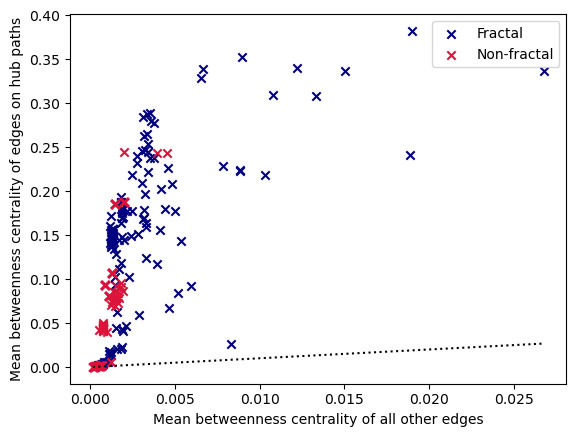

In [53]:
# Plot the fractal networks
clean_fractal_model_other_BC, clean_fractal_model_hub_path_BC = fn.clean_lists_of_NaNs(fractal_model_other_BC, fractal_model_hub_path_BC)
plt.scatter(clean_fractal_model_other_BC, clean_fractal_model_hub_path_BC, marker='x', facecolors='navy', label='Fractal')

# Plot the non-fractal networks
clean_non_fractal_model_other_BC, clean_non_fractal_model_hub_path_BC = fn.clean_lists_of_NaNs(non_fractal_model_other_BC, non_fractal_model_hub_path_BC)
plt.scatter(clean_non_fractal_model_other_BC, clean_non_fractal_model_hub_path_BC, marker='x', facecolors='crimson', label='Non-fractal')

# Plot x = y
x = np.linspace(min(clean_non_fractal_model_other_BC), max(clean_fractal_model_other_BC), 100)

# Label and display the graph
plt.plot(x, x, ':', color='black')
plt.ylabel("Mean betweenness centrality of edges on hub paths")
plt.xlabel("Mean betweenness centrality of all other edges")
plt.legend()
plt.savefig('../../Figures/Model Hub Path Edges BC Comparison')
plt.show()

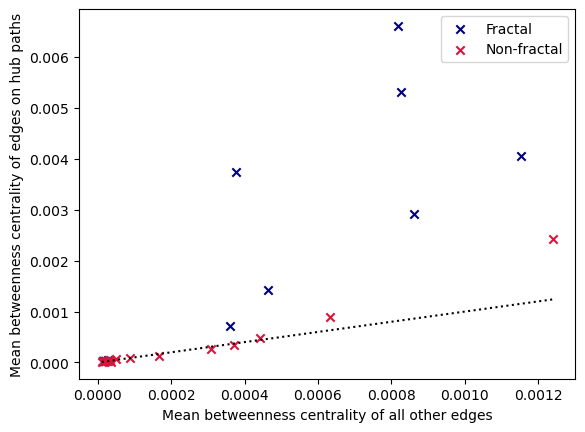

In [51]:
# Plot the fractal networks
clean_fractal_real_other_BC, clean_fractal_real_hub_path_BC = fn.clean_lists_of_NaNs(fractal_real_other_BC, fractal_real_hub_path_BC)
plt.scatter(clean_fractal_real_other_BC, clean_fractal_real_hub_path_BC, marker='x', facecolors='navy', label='Fractal')

# Plot the non-fractal networks
clean_non_fractal_real_other_BC, clean_non_fractal_real_hub_path_BC = fn.clean_lists_of_NaNs(non_fractal_real_other_BC, non_fractal_real_hub_path_BC)
plt.scatter(clean_non_fractal_real_other_BC, clean_non_fractal_real_hub_path_BC, marker='x', facecolors='crimson', label='Non-fractal')

# Plot x = y
x = np.linspace(min(clean_non_fractal_real_other_BC), max(clean_non_fractal_real_other_BC), 100)

# Label and display the graph
plt.plot(x, x, ':', color='black')
plt.ylabel("Mean betweenness centrality of edges on hub paths")
plt.xlabel("Mean betweenness centrality of all other edges")
plt.legend()
plt.savefig('../../Figures/Real Hub Path Edges BC Comparison')
plt.show()

<h3> 4.5.4 Hub Repulsion and Fractal Skeletons </h3>

In this section we analyse the effect of hub repulsion on the network skeletons.

**Hub Attraction Dynamical Growth (HADG) Networks**

In [6]:
# Non-fractal
non_fractal_HADG_1_7_00_0001_ex1 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.0-0.001-0.5-generation7-example1-skeleton.gml")
non_fractal_HADG_1_7_00_0001_ex2 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.0-0.001-0.5-generation7-example2-skeleton.gml")
non_fractal_HADG_1_7_00_0001_ex3 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.0-0.001-0.5-generation7-example3-skeleton.gml")
non_fractal_HADG_1_7_00_0001_ex4 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.0-0.001-0.5-generation7-example4-skeleton.gml")
non_fractal_HADG_1_7_00_0001_ex5 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.0-0.001-0.5-generation7-example5-skeleton.gml")

non_fractal_HADG_1_7_00_0002_ex1 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.0-0.002-0.5-generation7-example1-skeleton.gml")
non_fractal_HADG_1_7_00_0002_ex2 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.0-0.002-0.5-generation7-example2-skeleton.gml")
non_fractal_HADG_1_7_00_0002_ex3 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.0-0.002-0.5-generation7-example3-skeleton.gml")
non_fractal_HADG_1_7_00_0002_ex4 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.0-0.002-0.5-generation7-example4-skeleton.gml")
non_fractal_HADG_1_7_00_0002_ex5 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.0-0.002-0.5-generation7-example5-skeleton.gml")

non_fractal_HADG_1_7_0001_0002_ex1 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.001-0.002-0.5-generation7-example1-skeleton.gml")
non_fractal_HADG_1_7_0001_0002_ex2 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.001-0.002-0.5-generation7-example2-skeleton.gml")
non_fractal_HADG_1_7_0001_0002_ex3 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.001-0.002-0.5-generation7-example3-skeleton.gml")
non_fractal_HADG_1_7_0001_0002_ex4 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.001-0.002-0.5-generation7-example4-skeleton.gml")
non_fractal_HADG_1_7_0001_0002_ex5 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.001-0.002-0.5-generation7-example5-skeleton.gml")

non_fractal_HADG_1_7_skeletons = [non_fractal_HADG_1_7_00_0001_ex1,
                               non_fractal_HADG_1_7_00_0001_ex2,
                               non_fractal_HADG_1_7_00_0001_ex3,
                               non_fractal_HADG_1_7_00_0001_ex4,
                               non_fractal_HADG_1_7_00_0001_ex5,
                               non_fractal_HADG_1_7_00_0002_ex1,
                               non_fractal_HADG_1_7_00_0002_ex2,
                               non_fractal_HADG_1_7_00_0002_ex3,
                               non_fractal_HADG_1_7_00_0002_ex4,
                               non_fractal_HADG_1_7_00_0002_ex5,
                               non_fractal_HADG_1_7_0001_0002_ex1,
                               non_fractal_HADG_1_7_0001_0002_ex2,
                               non_fractal_HADG_1_7_0001_0002_ex3,
                               non_fractal_HADG_1_7_0001_0002_ex4,
                               non_fractal_HADG_1_7_0001_0002_ex5]

# Fractal
fractal_HADG_1_7_09_10_ex1 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.9-1.0-0.5-generation7-example1-skeleton.gml")
fractal_HADG_1_7_09_10_ex2 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.9-1.0-0.5-generation7-example2-skeleton.gml")
fractal_HADG_1_7_09_10_ex3 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.9-1.0-0.5-generation7-example3-skeleton.gml")
fractal_HADG_1_7_09_10_ex4 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.9-1.0-0.5-generation7-example4-skeleton.gml")
fractal_HADG_1_7_09_10_ex5 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.9-1.0-0.5-generation7-example5-skeleton.gml")

fractal_HADG_1_7_08_10_ex1 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.8-1.0-0.5-generation7-example1-skeleton.gml")
fractal_HADG_1_7_08_10_ex2 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.8-1.0-0.5-generation7-example2-skeleton.gml")
fractal_HADG_1_7_08_10_ex3 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.8-1.0-0.5-generation7-example3-skeleton.gml")
fractal_HADG_1_7_08_10_ex4 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.8-1.0-0.5-generation7-example4-skeleton.gml")
fractal_HADG_1_7_08_10_ex5 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.8-1.0-0.5-generation7-example5-skeleton.gml")

fractal_HADG_1_7_08_09_ex1 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.8-0.9-0.5-generation7-example1-skeleton.gml")
fractal_HADG_1_7_08_09_ex2 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.8-0.9-0.5-generation7-example2-skeleton.gml")
fractal_HADG_1_7_08_09_ex3 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.8-0.9-0.5-generation7-example3-skeleton.gml")
fractal_HADG_1_7_08_09_ex4 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.8-0.9-0.5-generation7-example4-skeleton.gml")
fractal_HADG_1_7_08_09_ex5 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-1-0.8-0.9-0.5-generation7-example5-skeleton.gml")

fractal_HADG_1_7_skeletons = [fractal_HADG_1_7_09_10_ex1,
                           fractal_HADG_1_7_09_10_ex2,
                           fractal_HADG_1_7_09_10_ex3,
                           fractal_HADG_1_7_09_10_ex4,
                           fractal_HADG_1_7_09_10_ex5,
                           fractal_HADG_1_7_08_10_ex1,
                           fractal_HADG_1_7_08_10_ex2,
                           fractal_HADG_1_7_08_10_ex3,
                           fractal_HADG_1_7_08_10_ex4,
                           fractal_HADG_1_7_08_10_ex5,
                           fractal_HADG_1_7_08_09_ex1,
                           fractal_HADG_1_7_08_09_ex2,
                           fractal_HADG_1_7_08_09_ex3,
                           fractal_HADG_1_7_08_09_ex4,
                           fractal_HADG_1_7_08_09_ex5]


In [7]:
# Fractal
fractal_HADG_6_4_09_10_ex1 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.9-1.0-0.5-generation4-example1-skeleton.gml")
fractal_HADG_6_4_09_10_ex2 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.9-1.0-0.5-generation4-example2-skeleton.gml")
fractal_HADG_6_4_09_10_ex3 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.9-1.0-0.5-generation4-example3-skeleton.gml")
fractal_HADG_6_4_09_10_ex4 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.9-1.0-0.5-generation4-example4-skeleton.gml")
fractal_HADG_6_4_09_10_ex5 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.9-1.0-0.5-generation4-example5-skeleton.gml")

fractal_HADG_6_4_08_10_ex1 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.8-1.0-0.5-generation4-example1-skeleton.gml")
fractal_HADG_6_4_08_10_ex2 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.8-1.0-0.5-generation4-example2-skeleton.gml")
fractal_HADG_6_4_08_10_ex3 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.8-1.0-0.5-generation4-example3-skeleton.gml")
fractal_HADG_6_4_08_10_ex4 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.8-1.0-0.5-generation4-example4-skeleton.gml")
fractal_HADG_6_4_08_10_ex5 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.8-1.0-0.5-generation4-example5-skeleton.gml")

fractal_HADG_6_4_08_09_ex1 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.8-0.9-0.5-generation4-example1-skeleton.gml")
fractal_HADG_6_4_08_09_ex2 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.8-0.9-0.5-generation4-example2-skeleton.gml")
fractal_HADG_6_4_08_09_ex3 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.8-0.9-0.5-generation4-example3-skeleton.gml")
fractal_HADG_6_4_08_09_ex4 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.8-0.9-0.5-generation4-example4-skeleton.gml")
fractal_HADG_6_4_08_09_ex5 = Graph.Load("network-files/models/HADG-model/skeletons/HADG-model-6-0.8-0.9-0.5-generation4-example5-skeleton.gml")

fractal_HADG_6_4_skeletons = [fractal_HADG_6_4_09_10_ex1,
                           fractal_HADG_6_4_09_10_ex2,
                           fractal_HADG_6_4_09_10_ex3,
                           fractal_HADG_6_4_09_10_ex4,
                           fractal_HADG_6_4_09_10_ex5,
                           fractal_HADG_6_4_08_10_ex1,
                           fractal_HADG_6_4_08_10_ex2,
                           fractal_HADG_6_4_08_10_ex3,
                           fractal_HADG_6_4_08_10_ex4,
                           fractal_HADG_6_4_08_10_ex5,
                           fractal_HADG_6_4_08_09_ex1,
                           fractal_HADG_6_4_08_09_ex2,
                           fractal_HADG_6_4_08_09_ex3,
                           fractal_HADG_6_4_08_09_ex4,
                           fractal_HADG_6_4_08_09_ex5]


In [8]:
fractal_HADG_skeletons = []
fractal_HADG_skeletons.extend(fractal_HADG_6_4_skeletons)
fractal_HADG_skeletons.extend(fractal_HADG_1_7_skeletons)

In [9]:
non_fractal_HADG_skeletons = []
non_fractal_HADG_skeletons.extend(non_fractal_HADG_1_7_skeletons)

**$(u, v)$-Flowers**

In [12]:
# Fractal (u, v) flowers
fractal_7_8_flower = Graph.Load("network-files/models/uv-flowers/skeletons/7_8_flower-generation3-skeleton.gml")
fractal_3_5_flower = Graph.Load("network-files/models/uv-flowers/skeletons/3_5_flower-generation4-skeleton.gml")
fractal_4_10_flower = Graph.Load("network-files/models/uv-flowers/skeletons/4_10_flower-generation3-skeleton.gml")
fractal_6_9_flower = Graph.Load("network-files/models/uv-flowers/skeletons/6_9_flower-generation3-skeleton.gml")
fractal_5_9_flower = Graph.Load("network-files/models/uv-flowers/skeletons/5_9_flower-generation3-skeleton.gml")

fractal_flower_skeletons = [fractal_7_8_flower, fractal_5_9_flower, fractal_3_5_flower, fractal_4_10_flower, fractal_6_9_flower]

In [13]:
# Non-Fractal (u, v) flowers
non_fractal_1_2_flower = Graph.Load("network-files/models/uv-flowers/skeletons/1_2_flower-generation8-skeleton.gml")
non_fractal_1_3_flower = Graph.Load("network-files/models/uv-flowers/skeletons/1_3_flower-generation6-skeleton.gml")
non_fractal_1_13_flower = Graph.Load("network-files/models/uv-flowers/skeletons/1_13_flower-generation3-skeleton.gml")
non_fractal_1_7_flower = Graph.Load("network-files/models/uv-flowers/skeletons/1_7_flower-generation4-skeleton.gml")
non_fractal_1_14_flower = Graph.Load("network-files/models/uv-flowers/skeletons/1_14_flower-generation3-skeleton.gml")

non_fractal_flower_skeletons = [non_fractal_1_2_flower, non_fractal_1_3_flower, non_fractal_1_13_flower, non_fractal_1_7_flower, non_fractal_1_14_flower]

**Nested Barabasi-Albert Model**

In [15]:
# Fractal networks with m = 1
fractal_nested_BA_1_2500_10 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2500-10-example1-skeleton.gml")
fractal_nested_BA_1_2500_25 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2500-25-example1-skeleton.gml")
fractal_nested_BA_1_2500_50 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2500-50-example1-skeleton.gml")
fractal_nested_BA_1_2500_5 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2500-5-example1-skeleton.gml")
fractal_nested_BA_1_2500_75 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2500-75-example1-skeleton.gml")
fractal_nested_BA_1_2750_10 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2750-10-example1-skeleton.gml")
fractal_nested_BA_1_2750_125 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2750-125-example1-skeleton.gml")
fractal_nested_BA_1_2750_25 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2750-25-example1-skeleton.gml")
fractal_nested_BA_1_2750_50 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2750-50-example1-skeleton.gml")
fractal_nested_BA_1_2750_5 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2750-5-example1-skeleton.gml")
fractal_nested_BA_1_2750_75 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2750-75-example1-skeleton.gml")
fractal_nested_BA_1_3000_10 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3000-10-example1-skeleton.gml")
fractal_nested_BA_1_3000_125 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3000-125-example1-skeleton.gml")
fractal_nested_BA_1_3000_25 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3000-25-example1-skeleton.gml")
fractal_nested_BA_1_3000_50 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3000-50-example1-skeleton.gml")
fractal_nested_BA_1_3000_5 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3000-5-example1-skeleton.gml")
fractal_nested_BA_1_3000_75 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3000-75-example1-skeleton.gml")
fractal_nested_BA_1_3250_100 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3250-100-example1-skeleton.gml")
fractal_nested_BA_1_3250_10 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3250-10-example1-skeleton.gml")
fractal_nested_BA_1_3250_25 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3250-25-example1-skeleton.gml")
fractal_nested_BA_1_3250_50 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3250-50-example1-skeleton.gml")
fractal_nested_BA_1_3250_5 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3250-5-example1-skeleton.gml")
fractal_nested_BA_1_3250_75 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3250-75-example1-skeleton.gml")

# Fractal networks with m = 2
fractal_nested_BA_2_2500_100 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2500-100-example1-skeleton.gml")
fractal_nested_BA_2_2500_10 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2500-10-example1-skeleton.gml")
fractal_nested_BA_2_2500_25 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2500-25-example1-skeleton.gml")
fractal_nested_BA_2_2500_50 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2500-50-example1-skeleton.gml")
fractal_nested_BA_2_2500_5 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2500-5-example1-skeleton.gml")
fractal_nested_BA_2_2500_75 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2500-75-example1-skeleton.gml")
fractal_nested_BA_2_2750_10 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2750-10-example1-skeleton.gml")
fractal_nested_BA_2_2750_25 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2750-25-example1-skeleton.gml")
fractal_nested_BA_2_2750_50 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2750-50-example1-skeleton.gml")
fractal_nested_BA_2_2750_5 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2750-5-example1-skeleton.gml")
fractal_nested_BA_2_2750_75 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2750-75-example1-skeleton.gml")
fractal_nested_BA_2_3000_10 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3000-10-example1-skeleton.gml")
fractal_nested_BA_2_3000_50 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3000-50-example1-skeleton.gml")
fractal_nested_BA_2_3000_5 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3000-5-example1-skeleton.gml")
fractal_nested_BA_2_3000_75 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3000-75-example1-skeleton.gml")
fractal_nested_BA_2_3250_100 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3250-100-example1-skeleton.gml")
fractal_nested_BA_2_3250_10 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3250-10-example1-skeleton.gml")
fractal_nested_BA_2_3250_25 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3250-25-example1-skeleton.gml")
fractal_nested_BA_2_3250_50 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3250-50-example1-skeleton.gml")
fractal_nested_BA_2_3250_5 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3250-5-example1-skeleton.gml")
fractal_nested_BA_2_3250_75 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3250-75-example1-skeleton.gml")

fractal_nested_BA_skeletons = [fractal_nested_BA_1_2500_10, fractal_nested_BA_1_2500_25, fractal_nested_BA_1_2500_50, 
fractal_nested_BA_1_2500_5, fractal_nested_BA_1_2500_75, fractal_nested_BA_1_2750_10, 
fractal_nested_BA_1_2750_125, fractal_nested_BA_1_2750_25, fractal_nested_BA_1_2750_50, 
fractal_nested_BA_1_2750_5, fractal_nested_BA_1_2750_75, fractal_nested_BA_1_3000_10, 
fractal_nested_BA_1_3000_125, fractal_nested_BA_1_3000_25, fractal_nested_BA_1_3000_50, 
fractal_nested_BA_1_3000_5, fractal_nested_BA_1_3000_75, fractal_nested_BA_1_3250_100, 
fractal_nested_BA_1_3250_10, fractal_nested_BA_1_3250_25, fractal_nested_BA_1_3250_50, 
fractal_nested_BA_1_3250_5, fractal_nested_BA_1_3250_75, fractal_nested_BA_2_2500_100, 
fractal_nested_BA_2_2500_10, fractal_nested_BA_2_2500_25, fractal_nested_BA_2_2500_50, 
fractal_nested_BA_2_2500_5, fractal_nested_BA_2_2500_75, fractal_nested_BA_2_2750_10, 
fractal_nested_BA_2_2750_25, fractal_nested_BA_2_2750_50, fractal_nested_BA_2_2750_5, 
fractal_nested_BA_2_2750_75, fractal_nested_BA_2_3000_10, fractal_nested_BA_2_3000_50, 
fractal_nested_BA_2_3000_5, fractal_nested_BA_2_3000_75, fractal_nested_BA_2_3250_100, 
fractal_nested_BA_2_3250_10, fractal_nested_BA_2_3250_25, fractal_nested_BA_2_3250_50, 
fractal_nested_BA_2_3250_5, fractal_nested_BA_2_3250_75]

non_fractal_nested_BA_1_2500_100 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2500-100-example1-skeleton.gml")
non_fractal_nested_BA_1_2500_125 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2500-125-example1-skeleton.gml")
non_fractal_nested_BA_1_2500_150 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2500-150-example1-skeleton.gml")
non_fractal_nested_BA_1_2750_100 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2750-100-example1-skeleton.gml")
non_fractal_nested_BA_1_2750_150 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-2750-150-example1-skeleton.gml")
non_fractal_nested_BA_1_3000_100 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3000-100-example1-skeleton.gml")
non_fractal_nested_BA_1_3000_150 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3000-150-example1-skeleton.gml")
non_fractal_nested_BA_1_3250_125 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3250-125-example1-skeleton.gml")
non_fractal_nested_BA_1_3250_150 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-1-3250-150-example1-skeleton.gml")
non_fractal_nested_BA_2_2500_125 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2500-125-example1-skeleton.gml")
non_fractal_nested_BA_2_2500_150 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2500-150-example1-skeleton.gml")
non_fractal_nested_BA_2_2750_100 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2750-100-example1-skeleton.gml")
non_fractal_nested_BA_2_2750_125 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2750-125-example1-skeleton.gml")
non_fractal_nested_BA_2_2750_150 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-2750-150-example1-skeleton.gml")
non_fractal_nested_BA_2_3000_100 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3000-100-example1-skeleton.gml")
non_fractal_nested_BA_2_3000_125 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3000-125-example1-skeleton.gml")
non_fractal_nested_BA_2_3000_150 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3000-150-example1-skeleton.gml")
non_fractal_nested_BA_2_3000_25 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3000-25-example1-skeleton.gml")
non_fractal_nested_BA_2_3250_125 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3250-125-example1-skeleton.gml")
non_fractal_nested_BA_2_3250_150 = Graph.Load("network-files/models/nested-BA-model/skeletons/nested-BA-model-2-3250-150-example1-skeleton.gml")

non_fractal_nested_BA_skeletons = [non_fractal_nested_BA_1_2500_100, non_fractal_nested_BA_1_2500_125, non_fractal_nested_BA_1_2500_150, 
non_fractal_nested_BA_1_2750_100, non_fractal_nested_BA_1_2750_150, non_fractal_nested_BA_1_3000_100, 
non_fractal_nested_BA_1_3000_150, non_fractal_nested_BA_1_3250_125, non_fractal_nested_BA_1_3250_150, 
non_fractal_nested_BA_2_2500_125, non_fractal_nested_BA_2_2500_150, non_fractal_nested_BA_2_2750_100, 
non_fractal_nested_BA_2_2750_125, non_fractal_nested_BA_2_2750_150, non_fractal_nested_BA_2_3000_100, 
non_fractal_nested_BA_2_3000_125, non_fractal_nested_BA_2_3000_150, non_fractal_nested_BA_2_3000_25, 
non_fractal_nested_BA_2_3250_125, non_fractal_nested_BA_2_3250_150]

**Barabasi-Albert Model**

In [17]:
BA_2564_1 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-1-2564-example1-skeleton.gml")
BA_2594_1 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-1-2594-example1-skeleton.gml")
BA_3130_1 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-1-3130-example1-skeleton.gml")
BA_3162_1 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-1-3162-example1-skeleton.gml")
BA_3284_1 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-1-3284-example1-skeleton.gml")
BA_3465_1 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-1-3465-example1-skeleton.gml")
BA_3473_1 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-1-3473-example1-skeleton.gml")
BA_2552_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-2552-example1-skeleton.gml")
BA_2817_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-2817-example1-skeleton.gml")
BA_2841_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-2841-example1-skeleton.gml")
BA_3002_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-3002-example1-skeleton.gml")
BA_3024_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-3024-example1-skeleton.gml")
BA_3067_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-3067-example1-skeleton.gml")
BA_3142_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-3142-example1-skeleton.gml")
BA_3203_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-3203-example1-skeleton.gml")
BA_3271_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-3271-example1-skeleton.gml")
BA_3292_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-3292-example1-skeleton.gml")
BA_3385_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-3385-example1-skeleton.gml")
BA_3417_2 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-2-3417-example1-skeleton.gml")
BA_2638_3 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-3-2638-example1-skeleton.gml")
BA_2750_3 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-3-2750-example1-skeleton.gml")
BA_2881_3 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-3-2881-example1-skeleton.gml")
BA_3053_3 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-3-3053-example1-skeleton.gml")
BA_3402_3 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-3-3402-example1-skeleton.gml")
BA_2541_4 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-4-2541-example1-skeleton.gml")
BA_2644_4 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-4-2644-example1-skeleton.gml")
BA_2734_4 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-4-2734-example1-skeleton.gml")
BA_2777_4 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-4-2777-example1-skeleton.gml")
BA_2862_4 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-4-2862-example1-skeleton.gml")
BA_3063_4 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-4-3063-example1-skeleton.gml")
BA_3301_4 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-4-3301-example1-skeleton.gml")
BA_2505_5 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-5-2505-example1-skeleton.gml")
BA_2549_5 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-5-2549-example1-skeleton.gml")
BA_2612_5 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-5-2612-example1-skeleton.gml")
BA_2873_5 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-5-2873-example1-skeleton.gml")
BA_3186_5 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-5-3186-example1-skeleton.gml")
BA_3237_5 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-5-3237-example1-skeleton.gml")
BA_3271_5 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-5-3271-example1-skeleton.gml")
BA_3309_5 = Graph.Load("network-files/models/barabasi-albert-model/skeletons/BA-model-5-3309-example1-skeleton.gml")
BA_skeletons = [BA_2564_1, BA_2594_1, BA_3130_1, BA_3162_1, BA_3284_1, BA_3465_1, BA_3473_1, BA_2552_2, BA_2817_2,
             BA_2841_2, BA_3002_2, BA_3024_2, BA_3067_2, BA_3142_2, BA_3203_2, BA_3271_2, BA_3292_2, BA_3385_2, 
             BA_3417_2, BA_2638_3, BA_2750_3, BA_2881_3, BA_3053_3, BA_3402_3, BA_2541_4, BA_2644_4, BA_2734_4,
             BA_2777_4, BA_2862_4, BA_3063_4, BA_3301_4, BA_2505_5, BA_2549_5, BA_2612_5, BA_2873_5, BA_3186_5, 
             BA_3237_5, BA_3271_5, BA_3309_5]

In [101]:
non_fractal_model_skeletons = []
non_fractal_model_skeletons.extend(non_fractal_HADG_skeletons)
non_fractal_model_skeletons.extend(non_fractal_flower_skeletons)
non_fractal_model_skeletons.extend(non_fractal_nested_BA_skeletons)
non_fractal_model_skeletons.extend(BA_skeletons)

fractal_model_skeletons = []
fractal_model_skeletons.extend(fractal_HADG_skeletons)
fractal_model_skeletons.extend(fractal_flower_skeletons)
fractal_model_skeletons.extend(fractal_nested_BA_skeletons)

**Real-World Networks**

In [28]:
# Biological Networks 

bio_CE_GN = Graph.Load('network-files/real-world/skeletons/bio-CE-GN_processed-skeleton.gml')
bio_HS_LC = Graph.Load("network-files/real-world/skeletons/bio-HS-LC_processed-skeleton.gml")
bio_DM_HT = Graph.Load('network-files/real-world/skeletons/bio-DM-HT_processed-skeleton.gml')
bio_DR_CX = Graph.Load('network-files/real-world/skeletons/bio-DR-CX_processed-skeleton.gml')
bio_HS_CX = Graph.Load('network-files/real-world/skeletons/bio-HS-CX_processed-skeleton.gml')
bio_HS_HT = Graph.Load('network-files/real-world/skeletons/bio-HS-HT_processed-skeleton.gml')
bio_SC_LC = Graph.Load('network-files/real-world/skeletons/bio-SC-LC_processed-skeleton.gml')

bio_skeletons = [bio_CE_GN,
              bio_HS_LC,
              bio_DM_HT,
              bio_DR_CX,
              bio_HS_CX,
              bio_HS_HT,
              bio_SC_LC]

In [29]:
# Retweet Networks

rt_alwefaq = Graph.Load('network-files/real-world/skeletons/rt_alwefaq_processed-skeleton.gml')
rt_islam = Graph.Load('network-files/real-world/skeletons/rt_islam_processed-skeleton.gml')
rt_lebanon = Graph.Load('network-files/real-world/skeletons/rt_lebanon_processed-skeleton.gml')
rt_occupy = Graph.Load('network-files/real-world/skeletons/rt_occupy_processed-skeleton.gml')
rt_tlot = Graph.Load('network-files/real-world/skeletons/rt_tlot_processed-skeleton.gml')

retweet_skeletons = [rt_alwefaq,
                  rt_islam,
                  rt_lebanon,
                  rt_occupy,
                  rt_tlot]

In [30]:
# Social Networks

tv_show = Graph.Load('network-files/real-world/skeletons/fb-pages-tvshow_processed-skeleton.gml')
bowdoin = Graph.Load('network-files/real-world/skeletons/socfb-Bowdoin47_processed-skeleton.gml')
bucknell = Graph.Load('network-files/real-world/skeletons/socfb-Bucknell39_processed-skeleton.gml')
colgate = Graph.Load('network-files/real-world/skeletons/socfb-Colgate88_processed-skeleton.gml')
howard = Graph.Load('network-files/real-world/skeletons/socfb-Howard90_processed-skeleton.gml')
mich = Graph.Load('network-files/real-world/skeletons/socfb-Mich67_processed-skeleton.gml')
middlebury = Graph.Load('network-files/real-world/skeletons/socfb-Middlebury45_processed-skeleton.gml')
pepperdine = Graph.Load('network-files/real-world/skeletons/socfb-Pepperdine86_processed-skeleton.gml')
santa = Graph.Load('network-files/real-world/skeletons/socfb-Santa74_processed-skeleton.gml')
trinity = Graph.Load('network-files/real-world/skeletons/socfb-Trinity100_processed-skeleton.gml')
vassar = Graph.Load('network-files/real-world/skeletons/socfb-Vassar85_processed-skeleton.gml')
wellesley = Graph.Load('network-files/real-world/skeletons/socfb-Wellesley22_processed-skeleton.gml')
williams = Graph.Load('network-files/real-world/skeletons/socfb-Williams40_processed-skeleton.gml')

social_skeletons = [tv_show,
                 bowdoin,
                 bucknell,
                 colgate,
                 howard,
                 mich,
                 middlebury,
                 pepperdine,
                 santa,
                 trinity,
                 vassar,
                 wellesley,
                 williams]

fractal_social_skeletons = [bowdoin,
                 bucknell,
                 pepperdine,
                 santa,
                 trinity,
                 vassar,
                 williams]

non_fractal_social_skeletons = [tv_show,
                 colgate,
                 howard,
                 mich,
                 middlebury,
                 wellesley]

In [31]:
ca_GrQc = Graph.Load("network-files/real-world/skeletons/ca-GrQc_processed-skeleton.gml")
road_minnesota = Graph.Load('network-files/real-world/skeletons/road-minnesota_processed-skeleton.gml')
routers = Graph.Load('network-files/real-world/skeletons/tech-routers-rf_processed-skeleton.gml')
web_edu = Graph.Load('network-files/real-world/skeletons/web-edu_processed-skeleton.gml')
web_EPA = Graph.Load('network-files/real-world/skeletons/web-EPA_processed-skeleton.gml')

The networks are sorted into lists according to their fractality. 

In [33]:
fractal_real_skeletons = []
fractal_real_skeletons.extend(retweet_skeletons)
fractal_real_skeletons.extend(fractal_social_skeletons)
fractal_real_skeletons.append(road_minnesota)
fractal_real_skeletons.append(web_edu)
fractal_real_skeletons.append(web_EPA)

non_fractal_real_skeletons = []
non_fractal_real_skeletons.extend(bio_skeletons)
non_fractal_real_skeletons.extend(non_fractal_social_skeletons)
non_fractal_real_skeletons.append(ca_GrQc)
non_fractal_real_skeletons.append(routers)

**Analysing Hub Repulsion**

The following cells initialise lists for the orders of each network skeleton. 

In [102]:
# Initialise empty lists for the order of the networks
fractal_real_Ns = []
non_fractal_real_Ns = []

real_Ns = []

# Find the order of each fractal network
for graph in fractal_real_skeletons:
    fractal_real_Ns.append(graph.vcount())
    real_Ns.append(graph.vcount())
    
# Find the order of each non-fractal network
for graph in non_fractal_real_skeletons:
    non_fractal_real_Ns.append(graph.vcount())
    real_Ns.append(graph.vcount())

In [103]:
# Initialise empty lists for the order of the networks
fractal_model_Ns = []
non_fractal_model_Ns = []

model_Ns = []

# Find the order of each fractal network
for graph in fractal_model_skeletons:
    fractal_model_Ns.append(graph.vcount())
    model_Ns.append(graph.vcount())
    
# Find the order of each non-fractal network
for graph in non_fractal_model_skeletons:
    non_fractal_model_Ns.append(graph.vcount())
    model_Ns.append(graph.vcount())

In [104]:
fractal_Ns = fractal_model_Ns + fractal_real_Ns
non_fractal_Ns = non_fractal_model_Ns + non_fractal_real_Ns

**Hub Connectivity Score (HCS)**

The following code computes and plots the Hub Connectivity Score of each fractal and non-fractal network skeleton (Figure 4.18a).

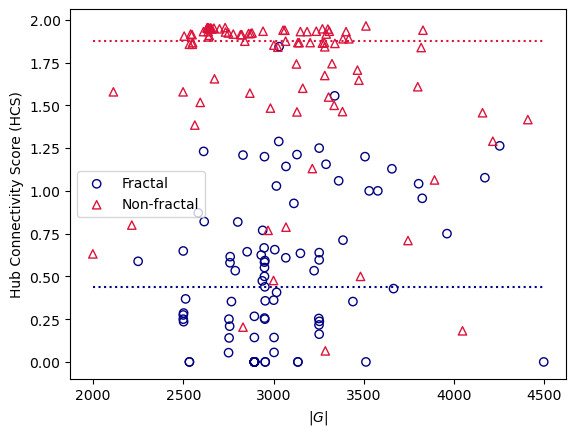

In [105]:
# Initialise an empty list for the fractal networks
fractal_HCSs = []
fractal_real_HCSs = []
fractal_model_HCSs = []

# Initialise an empty list for the non-fractal networks
non_fractal_HCSs = []
non_fractal_real_HCSs = []
non_fractal_model_HCSs = []

# Find the HCS of each model fractal network
for graph in fractal_model_skeletons:
    HCS = fn.calculate_HCS(graph)
    fractal_HCSs.append(HCS)
    fractal_model_HCSs.append(HCS)

# Find the HCS of each real fractal network
for graph in fractal_real_skeletons:
    HCS = fn.calculate_HCS(graph)
    fractal_HCSs.append(HCS)
    fractal_real_HCSs.append(HCS)
    
# Find the HCS of each model non-fractal network
for graph in non_fractal_model_skeletons:
    HCS = fn.calculate_HCS(graph)
    non_fractal_HCSs.append(HCS)
    non_fractal_model_HCSs.append(HCS)

# Find the HCS of each real non-fractal network
for graph in non_fractal_real_skeletons:
    HCS = fn.calculate_HCS(graph)
    non_fractal_HCSs.append(HCS)
    non_fractal_real_HCSs.append(HCS)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_HCSs = fn.clean_lists_of_NaNs(fractal_Ns, fractal_HCSs)
clean_non_fractal_Ns, non_fractal_HCSs = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_HCSs)

clean_fractal_real_Ns, fractal_real_HCSs = fn.clean_lists_of_NaNs(fractal_real_Ns, fractal_real_HCSs)
clean_non_fractal_real_Ns, non_fractal_real_HCSs = fn.clean_lists_of_NaNs(non_fractal_real_Ns, non_fractal_real_HCSs)

clean_fractal_model_Ns, fractal_model_HCSs = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_HCSs)
clean_non_fractal_model_Ns, non_fractal_model_HCSs = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_HCSs)
        
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_HCSs, non_fractal_HCSs, clean_fractal_Ns, clean_non_fractal_Ns, "Hub Connectivity Score (HCS)")

**Mean Hub Distances**

The following code generates a figure showing the mean hub distances in fractal and non-fractal network skeletons (Figure 4.18b). 

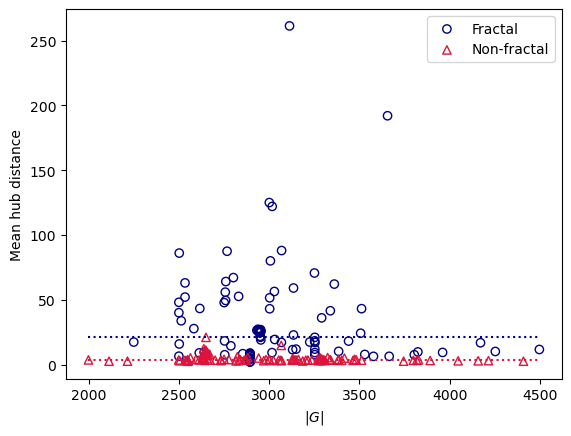

In [143]:
# Initialise an empty list for the fractal networks
fractal_mean_hub_distances = []

# Initialise an empty list for the non-fractal networks
non_fractal_mean_hub_distances = []

# Initialise empty lists for the real networks 
fractal_real_mean_hub_distances = []
non_fractal_real_mean_hub_distances = []

# Initialise empty lists for the real networks 
fractal_model_mean_hub_distances = []
non_fractal_model_mean_hub_distances = []

# Find the mean hub distance of each fractal network
for graph in fractal_real_skeletons:
    mean_distance, _ = fn.mean_hub_distance(graph)
    fractal_mean_hub_distances.append(mean_distance)
    fractal_real_mean_hub_distances.append(mean_distance)
    
for graph in fractal_model_skeletons:
    mean_distance, _ = fn.mean_hub_distance(graph)
    fractal_mean_hub_distances.append(mean_distance)
    fractal_model_mean_hub_distances.append(mean_distance)
    
# Find the mean hub distance of each non-fractal network
for graph in non_fractal_real_skeletons:
    mean_distance, _ = fn.mean_hub_distance(graph)
    non_fractal_mean_hub_distances.append(mean_distance)
    non_fractal_real_mean_hub_distances.append(mean_distance)
    
for graph in non_fractal_model_skeletons:
    mean_distance, _ = fn.mean_hub_distance(graph)
    non_fractal_mean_hub_distances.append(mean_distance)
    non_fractal_model_mean_hub_distances.append(mean_distance)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_Ns, fractal_mean_hub_distances)
clean_non_fractal_Ns, non_fractal_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_mean_hub_distances)
 
clean_fractal_real_Ns, fractal_real_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_real_Ns, fractal_real_mean_hub_distances)
clean_non_fractal_real_Ns, non_fractal_real_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_real_Ns, non_fractal_real_mean_hub_distances)
   
clean_fractal_model_Ns, fractal_model_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_mean_hub_distances)
clean_non_fractal_model_Ns, non_fractal_model_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_mean_hub_distances)
       
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_mean_hub_distances, non_fractal_mean_hub_distances, clean_fractal_Ns, clean_non_fractal_Ns, "Mean hub distance", save_path='../../Figures/Skeleton Mean Hub Distance')

**Normalised Mean Hub Distance**

The following code generates a figure showing the normalised mean hub distances in fractal and non-fractal network skeletons (Figure 4.18c). 

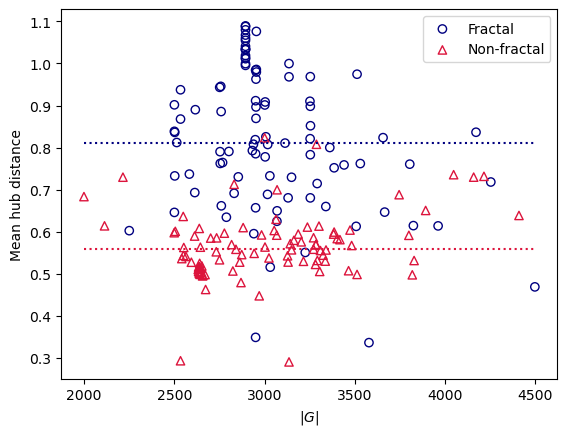

In [149]:
# Initialise an empty list for the fractal networks
fractal_mean_hub_distances = []

# Initialise an empty list for the non-fractal networks
non_fractal_mean_hub_distances = []

# Initialise empty lists for the real networks 
fractal_real_mean_hub_distances = []
non_fractal_real_mean_hub_distances = []

# Initialise empty lists for the real networks 
fractal_model_mean_hub_distances = []
non_fractal_model_mean_hub_distances = []

for graph in fractal_model_skeletons:
    mean_distance, _ = fn.mean_hub_distance(graph, normalised=True)
    fractal_mean_hub_distances.append(mean_distance)
    fractal_model_mean_hub_distances.append(mean_distance)
    
# Find the mean hub distance of each fractal network
for graph in fractal_real_skeletons:
    mean_distance, _ = fn.mean_hub_distance(graph, normalised=True)
    fractal_mean_hub_distances.append(mean_distance)
    fractal_real_mean_hub_distances.append(mean_distance)
    
for graph in non_fractal_model_skeletons:
    mean_distance, _ = fn.mean_hub_distance(graph, normalised=True)
    non_fractal_mean_hub_distances.append(mean_distance)
    non_fractal_model_mean_hub_distances.append(mean_distance)
    
# Find the mean hub distance of each non-fractal network
for graph in non_fractal_real_skeletons:
    mean_distance, _ = fn.mean_hub_distance(graph, normalised=True)
    non_fractal_mean_hub_distances.append(mean_distance)
    non_fractal_real_mean_hub_distances.append(mean_distance)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_Ns, fractal_mean_hub_distances)
clean_non_fractal_Ns, non_fractal_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_mean_hub_distances)
 
clean_fractal_real_Ns, fractal_real_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_real_Ns, fractal_real_mean_hub_distances)
clean_non_fractal_real_Ns, non_fractal_real_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_real_Ns, non_fractal_real_mean_hub_distances)
   
clean_fractal_model_Ns, fractal_model_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_model_Ns, fractal_model_mean_hub_distances)
clean_non_fractal_model_Ns, non_fractal_model_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_model_Ns, non_fractal_model_mean_hub_distances)
       
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_mean_hub_distances, non_fractal_mean_hub_distances, clean_fractal_Ns, clean_non_fractal_Ns, "Mean hub distance", save_path='../../Figures/Skeleton Normalised Mean Hub Distance')

<h1> References

[1] K. Hamilton, "Origins of Fractality in Complex Networks" *MSc Thesis*, 2024.

[2] Song, C., Gallos, L. K., et al. (2007). “How to calculate the fractal dimension of a complex network: the box covering
algorithm”. In: Journal of Statistical Mechanics

[3] Kitsak, M. et al. (2007). “Betweenness centrality of fractal and nonfractal scale-free model networks and tests on
real networks”. In: Physical review. E, Statistical, nonlinear, and soft matter physics 75.